In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from pylab import rcParams
import seaborn as sns

### Problem:

For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

1. Read the data as an appropriate Time Series data and plot the data.
2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.
3. Split the data into training and test. The test data should start in 1991.
4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other additional models such as regression, naïve forecast models, simple average models, moving average models should also be built on the training data and check the performance on the test data using RMSE.
5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.
6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.
7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.
8. Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.
9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.
10. Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.

In [2]:
sparkling = pd.read_csv('Sparkling.csv')
rose = pd.read_csv('Rose.csv')

In [3]:
sparkling

YearMonth  Sparkling
0     1980-01       1686
1     1980-02       1591
2     1980-03       2304
3     1980-04       1712
4     1980-05       1471
..        ...        ...
182   1995-03       1897
183   1995-04       1862
184   1995-05       1670
185   1995-06       1688
186   1995-07       2031

[187 rows x 2 columns]

In [4]:
rose

YearMonth   Rose
0     1980-01  112.0
1     1980-02  118.0
2     1980-03  129.0
3     1980-04   99.0
4     1980-05  116.0
..        ...    ...
182   1995-03   45.0
183   1995-04   52.0
184   1995-05   28.0
185   1995-06   40.0
186   1995-07   62.0

[187 rows x 2 columns]

#### Q-1.Read the data as an appropriate Time Series data and plot the data.

In [5]:
date = pd.date_range(start = '1/1/1980',end='8/1/1995',freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

***Adding Date to the dataframe to create a time stamp for further analysis***

In [6]:
sparkling['Time Stamp'] = date
rose['Time Stamp'] = date

In [7]:
sparkling.head()

YearMonth  Sparkling Time Stamp
0   1980-01       1686 1980-01-31
1   1980-02       1591 1980-02-29
2   1980-03       2304 1980-03-31
3   1980-04       1712 1980-04-30
4   1980-05       1471 1980-05-31

In [8]:
rose.head()

YearMonth   Rose Time Stamp
0   1980-01  112.0 1980-01-31
1   1980-02  118.0 1980-02-29
2   1980-03  129.0 1980-03-31
3   1980-04   99.0 1980-04-30
4   1980-05  116.0 1980-05-31

In [9]:
sparkling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   YearMonth   187 non-null    object        
 1   Sparkling   187 non-null    int64         
 2   Time Stamp  187 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 4.5+ KB


In [10]:
rose.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   YearMonth   187 non-null    object        
 1   Rose        185 non-null    float64       
 2   Time Stamp  187 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 4.5+ KB


***Now making this Time Stramp column as an index for further evaluation and dropping YearMonth column as it of no use in an further analysis***

In [11]:
sparkling.set_index(keys='Time Stamp',inplace=True)

In [12]:
rose.set_index(keys='Time Stamp',inplace=True)

In [13]:
sparkling.drop('YearMonth',axis=1,inplace=True)
rose.drop('YearMonth',axis=1,inplace=True)

In [14]:
sparkling

Sparkling
Time Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471
...               ...
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031

[187 rows x 1 columns]

After reading the Sparkling data 
1. Time Stamp represent the data collected regarding the sales of sparkling Wine from jan 1980 to July 1995
2. Sparkling column represents the sales of wine units in their respective months.

In [15]:
rose

Rose
Time Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0
...           ...
1995-03-31   45.0
1995-04-30   52.0
1995-05-31   28.0
1995-06-30   40.0
1995-07-31   62.0

[187 rows x 1 columns]

After reading the  Rose data 
1. Time Stamp represent the data collected regarding the sales of Rose Wine from jan 1980 to July 1995
2. Rose column represents the sales of wine units in their respective months.

In [16]:
rcParams['figure.figsize'] = (20,8)

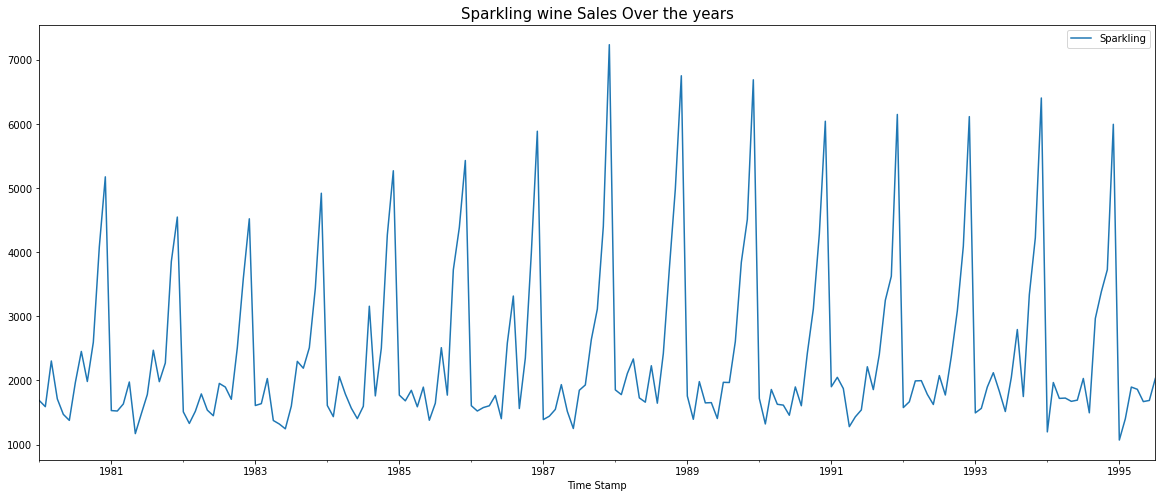

In [17]:
sparkling.plot()
plt.title('Sparkling wine Sales Over the years',fontdict={'fontsize':15})
plt.show();

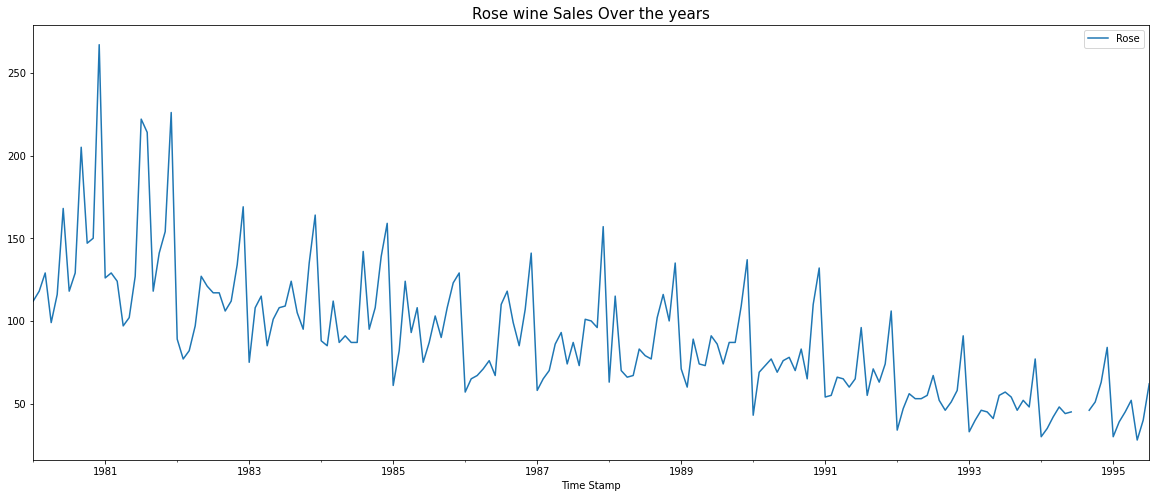

In [18]:
rose.plot()
plt.title('Rose wine Sales Over the years',fontdict={'fontsize':15})
plt.show();

#### Q-2 Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

#### EXPLORATORY DATA ANALYSIS

***DATA INFORMATION***

In [19]:
sparkling.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


1. As we can see there is only one column Sparkling which is int64 datatype
2. There are total 187 rows in the data.
3. There are no null values in the data

In [20]:
rose.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


1. As we can see there is only one column Rose which is int64 datatype
2. There are total 187 rows in the data.
3. There are 02 null values present in the data i.e. on July 1984 and Aug 1984

***MISSING VALUE CHECK***

In [21]:
sparkling.isnull().sum()

Sparkling    0
dtype: int64

In [22]:
rose[rose['Rose'].isnull()==True]

Rose
Time Stamp      
1994-07-31   NaN
1994-08-31   NaN

In [23]:
value = rose.interpolate(method='spline',order=3)['1994']

<ipython-input-23-48d520d1f218>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  value = rose.interpolate(method='spline',order=3)['1994']


In [24]:
rose = rose.fillna(value=value)

In [25]:
rose['1994']

<ipython-input-25-c1921939518b>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  rose['1994']


Rose
Time Stamp           
1994-01-31  30.000000
1994-02-28  35.000000
1994-03-31  42.000000
1994-04-30  48.000000
1994-05-31  44.000000
1994-06-30  45.000000
1994-07-31  43.693064
1994-08-31  44.326877
1994-09-30  46.000000
1994-10-31  51.000000
1994-11-30  63.000000
1994-12-31  84.000000

***DATA SUMMARY***

In [26]:
sparkling.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

###### INSIGHTS
1. Mean sales across 15 years is around 2402 units.
2. Maximum sale achieved by the company in 14 years is around 7242 units

Text(0.5, 1.0, 'Sparkling Wine Sales with Mean & Median')

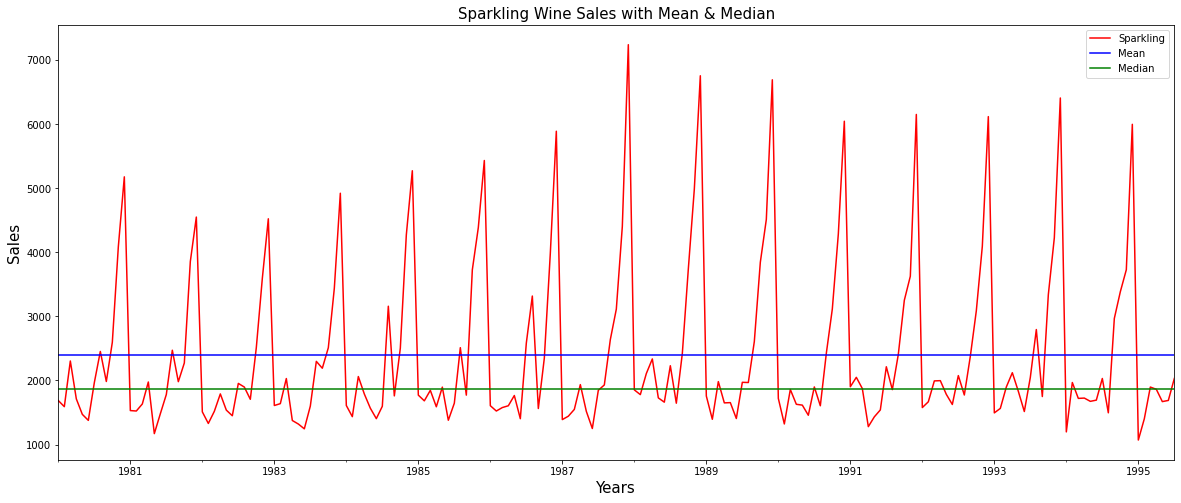

In [27]:
sparkling.plot(color='red')
plt.axhline(sparkling['Sparkling'].mean(),color='Blue')
plt.axhline(sparkling['Sparkling'].median(),color='Green')
plt.legend(['Sparkling','Mean','Median'])
plt.xlabel('Years',fontdict={'fontsize':15})
plt.ylabel('Sales',fontdict={'fontsize':15})
plt.title('Sparkling Wine Sales with Mean & Median',fontdict={'fontsize':15})

In [28]:
rose.describe()

Rose
count  187.000000
mean    89.898502
std     39.256767
min     28.000000
25%     62.500000
50%     85.000000
75%    111.000000
max    267.000000

Text(0.5, 1.0, 'Rose Wine Sales with Mean & Median')

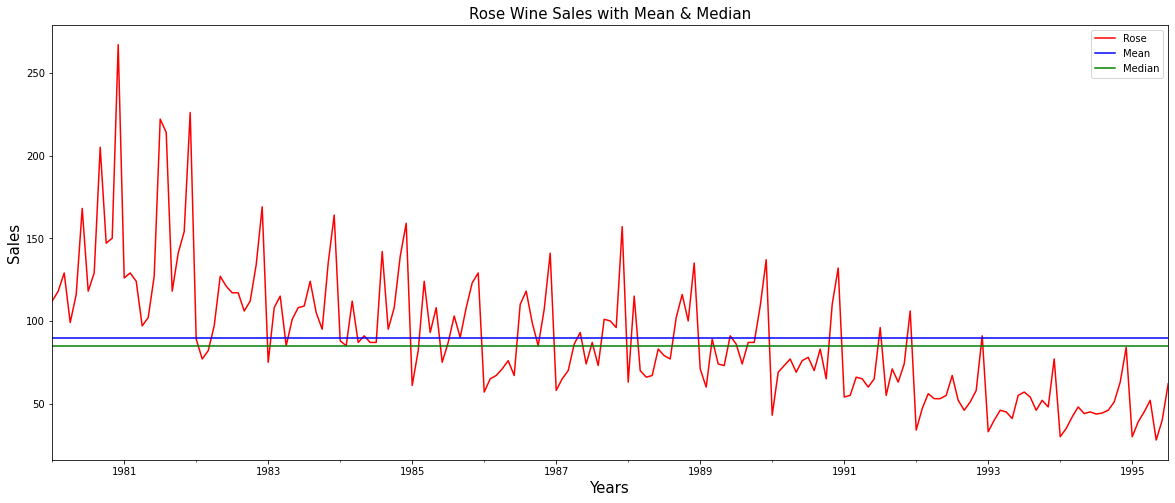

In [29]:
rose.plot(color='red')
plt.axhline(rose['Rose'].mean(),color='Blue')
plt.axhline(rose['Rose'].median(),color='Green')
plt.legend(['Rose','Mean','Median'])
plt.xlabel('Years',fontdict={'fontsize':15})
plt.ylabel('Sales',fontdict={'fontsize':15})
plt.title('Rose Wine Sales with Mean & Median',fontdict={'fontsize':15})

*****INSIGHTS*****
1. Mean sales across 15 years is around 90.
2. Maximum sale done by the company in 14 years is around 267.

##### OUTLIER CHECK

###### YEAR ON YEAR

SPARKLING

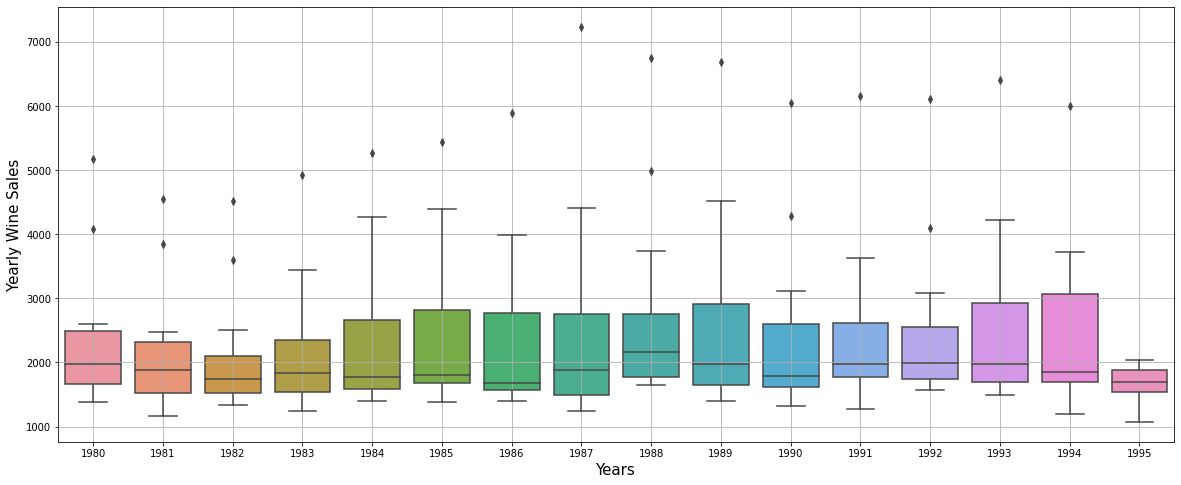

In [30]:
sns.boxplot(x=sparkling.index.year,y=sparkling.Sparkling,whis=1.5)
plt.grid()
plt.xlabel('Years',fontdict={'fontsize':15})
plt.ylabel('Yearly Wine Sales',fontdict={'fontsize':15})
plt.show();

In [31]:
sparkling.groupby(sparkling.index.year)['Sparkling'].sum().sort_values(ascending=False)

Time Stamp
1988    33246
1989    31443
1993    30991
1987    30258
1992    30171
1985    29640
1991    29587
1994    29584
1986    29170
1990    28977
1984    28431
1980    28406
1981    26227
1983    26180
1982    25321
1995    11620
Name: Sparkling, dtype: int64

***INFERENCE***
1. 1988 year has maximum sale around 33000 units.
2. Every year has outlier sale

#### MONTH ON MONTH SALES

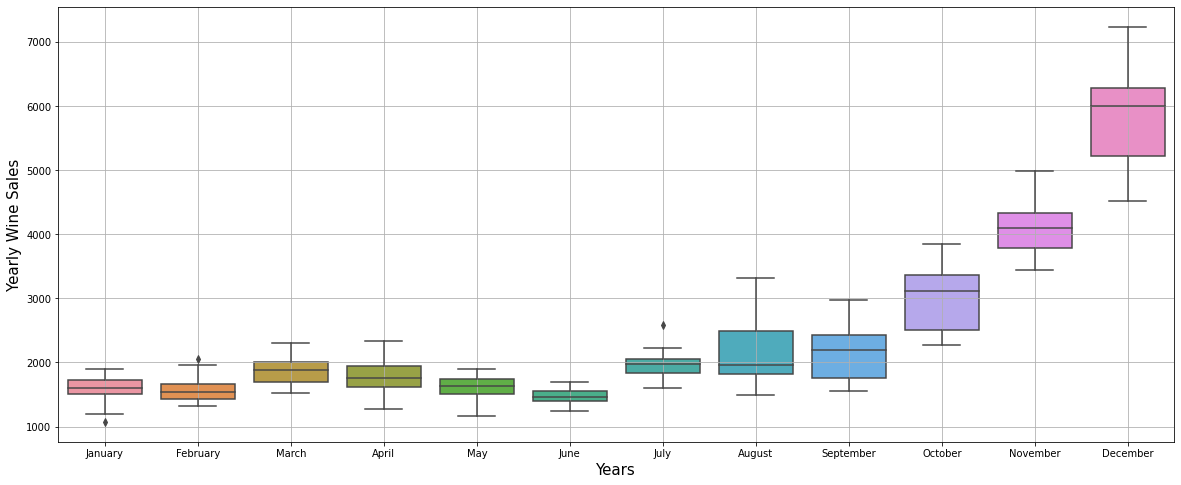

In [32]:
sns.boxplot(x=sparkling.index.month_name(),y=sparkling.Sparkling,whis=1.5)
plt.grid()
plt.xlabel('Years',fontdict={'fontsize':15})
plt.ylabel('Yearly Wine Sales',fontdict={'fontsize':15})
plt.show();

***INFERENCE***

Year end month (last quater) has the maximum sales across the years in december month is the highest selling month for the wines.

In [33]:
from statsmodels.graphics.tsaplots import month_plot

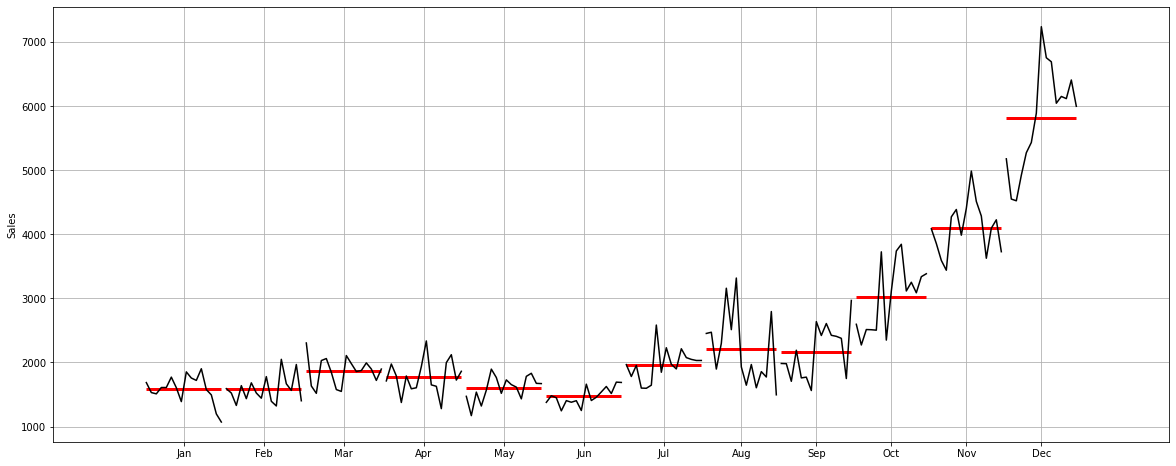

In [34]:
month_plot(sparkling,ylabel='Sales')
plt.grid();

In [35]:
sparkling_monthly_sales = pd.pivot_table(sparkling,values='Sparkling',columns=sparkling.index.month_name(),
                                        index=sparkling.index.year)
sparkling_monthly_sales

Time Stamp   April  August  December  February  January    July    June  \
Time Stamp                                                                
1980        1712.0  2453.0    5179.0    1591.0   1686.0  1966.0  1377.0   
1981        1976.0  2472.0    4551.0    1523.0   1530.0  1781.0  1480.0   
1982        1790.0  1897.0    4524.0    1329.0   1510.0  1954.0  1449.0   
1983        1375.0  2298.0    4923.0    1638.0   1609.0  1600.0  1245.0   
1984        1789.0  3159.0    5274.0    1435.0   1609.0  1597.0  1404.0   
1985        1589.0  2512.0    5434.0    1682.0   1771.0  1645.0  1379.0   
1986        1605.0  3318.0    5891.0    1523.0   1606.0  2584.0  1403.0   
1987        1935.0  1930.0    7242.0    1442.0   1389.0  1847.0  1250.0   
1988        2336.0  1645.0    6757.0    1779.0   1853.0  2230.0  1661.0   
1989        1650.0  1968.0    6694.0    1394.0   1757.0  1971.0  1406.0   
1990        1628.0  1605.0    6047.0    1321.0   1720.0  1899.0  1457.0   
1991        1279.0  1857.0    6153.0    2049.0   1902.0  2214.0  1540.0   
1992        1997.0  1773.0    6119.0    1667.0   1577.0  2076.0  1625.0   
1993        2121.0  2795.0    6410.0    1564.0   1494.0  2048.0  1515.0   
1994        1725.0  1495.0    5999.0    1968.0   1197.0  2031.0  1693.0   
1995        1862.0     NaN       NaN    1402.0   1070.0  2031.0  1688.0   

Time Stamp   March     May  November  October  September  
Time Stamp                                                
1980        2304.0  1471.0    4087.0   2596.0     1984.0  
1981        1633.0  1170.0    3857.0   2273.0     1981.0  
1982        1518.0  1537.0    3593.0   2514.0     1706.0  
1983        2030.0  1320.0    3440.0   2511.0     2191.0  
1984        2061.0  1567.0    4273.0   2504.0     1759.0  
1985        1846.0  1896.0    4388.0   3727.0     1771.0  
1986        1577.0  1765.0    3987.0   2349.0     1562.0  
1987        1548.0  1518.0    4405.0   3114.0     2638.0  
1988        2108.0  1728.0    4988.0   3740.0     2421.0  
1989        1982.0  1654.0    4514.0   3845.0     2608.0  
1990        1859.0  1615.0    4286.0   3116.0     2424.0  
1991        1874.0  1432.0    3627.0   3252.0     2408.0  
1992        1993.0  1783.0    4096.0   3088.0     2377.0  
1993        1898.0  1831.0    4227.0   3339.0     1749.0  
1994        1720.0  1674.0    3729.0   3385.0     2968.0  
1995        1897.0  1670.0       NaN      NaN        NaN

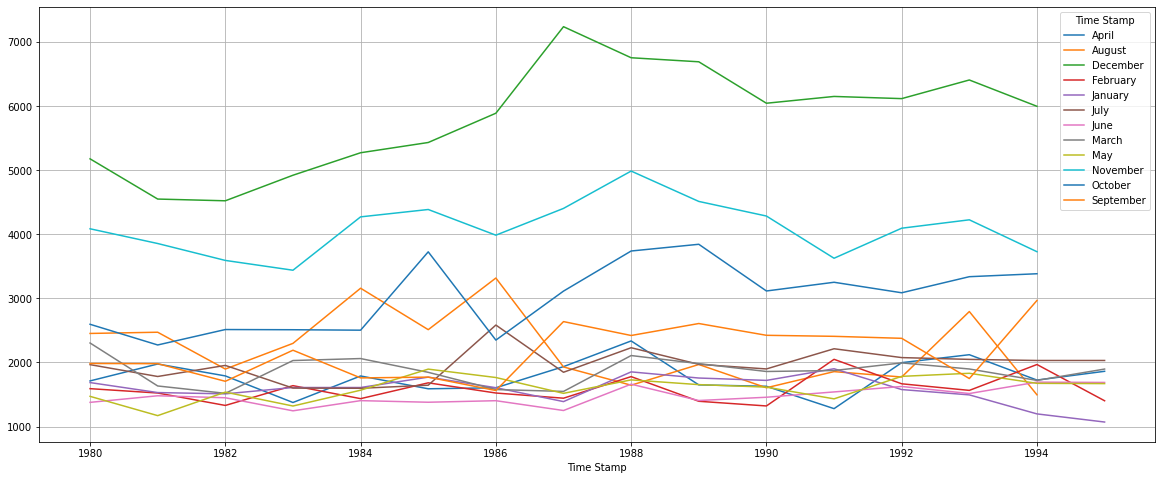

In [36]:
sparkling_monthly_sales.plot()
plt.grid()
plt.show();

#### YEAR ON YEAR SALES

ROSE WINE

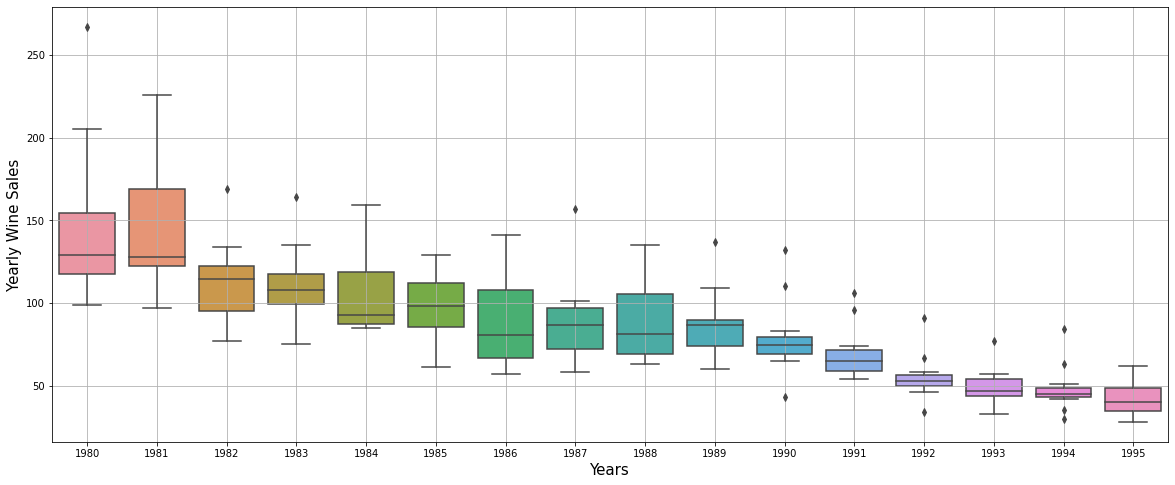

In [37]:
sns.boxplot(x=rose.index.year,y=rose.Rose,whis=1.5)
plt.grid()
plt.xlabel('Years',fontdict={'fontsize':15})
plt.ylabel('Yearly Wine Sales',fontdict={'fontsize':15})
plt.show();

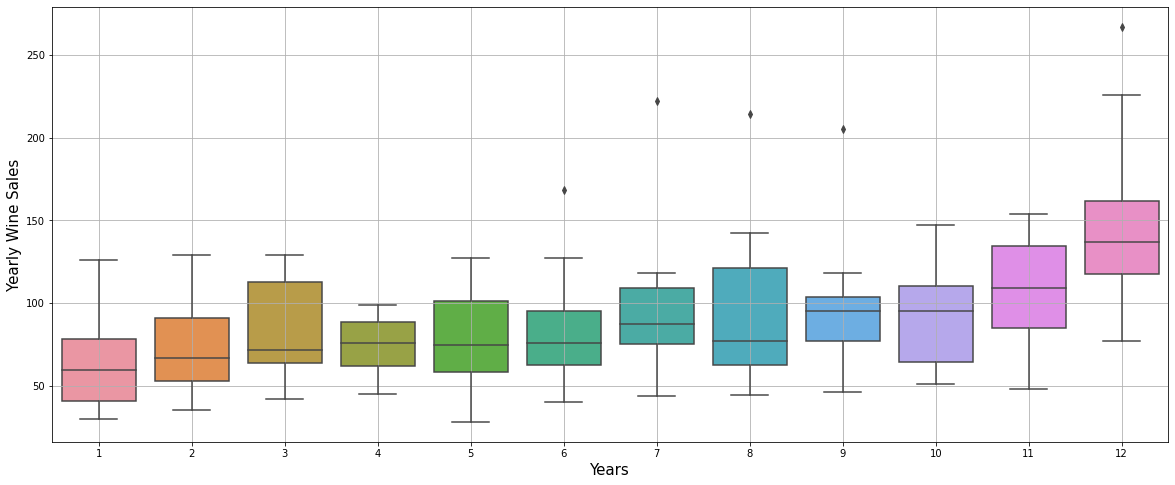

In [38]:
sns.boxplot(x=rose.index.month,y=rose.Rose,whis=1.5)
plt.grid()
plt.xlabel('Years',fontdict={'fontsize':15})
plt.ylabel('Yearly Wine Sales',fontdict={'fontsize':15})
plt.show();

In [39]:
# month_plot(rose,ylabel='Sales')
# plt.grid();

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose

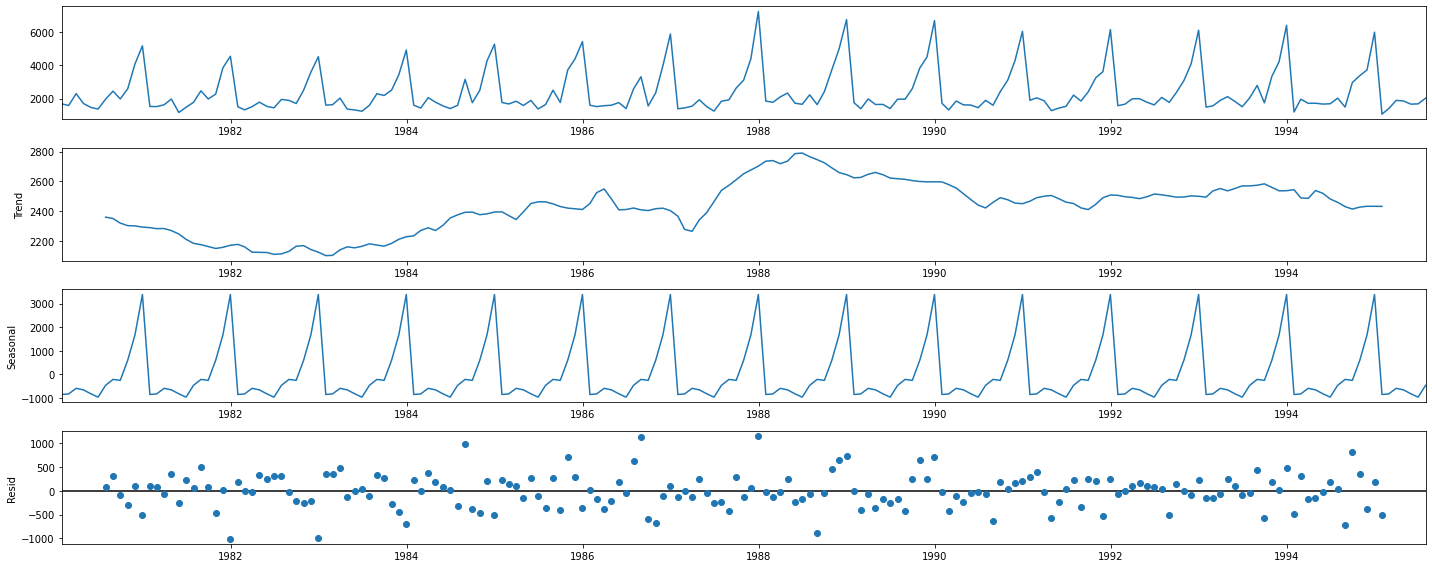

In [41]:
sparkling_decompose = seasonal_decompose(sparkling,model='additive')
sparkling_decompose.plot();

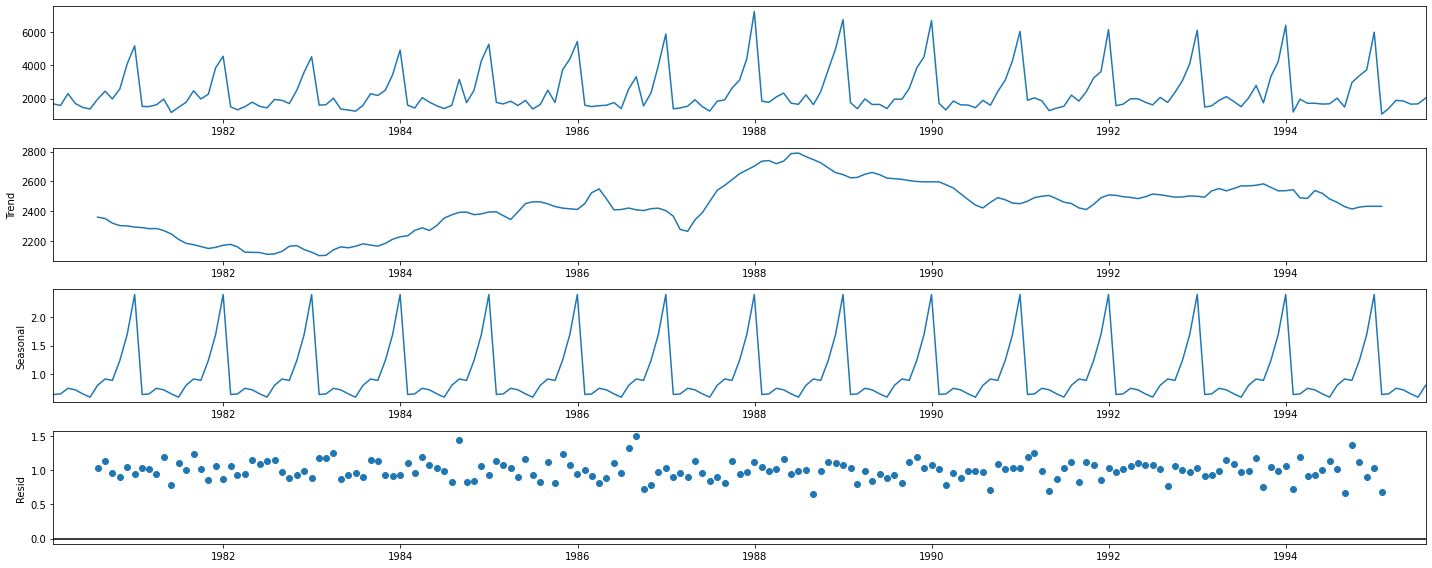

In [42]:
sparkling_decompose1 = seasonal_decompose(sparkling,model='multiplicative')
sparkling_decompose1.plot();

### ROSE WINE

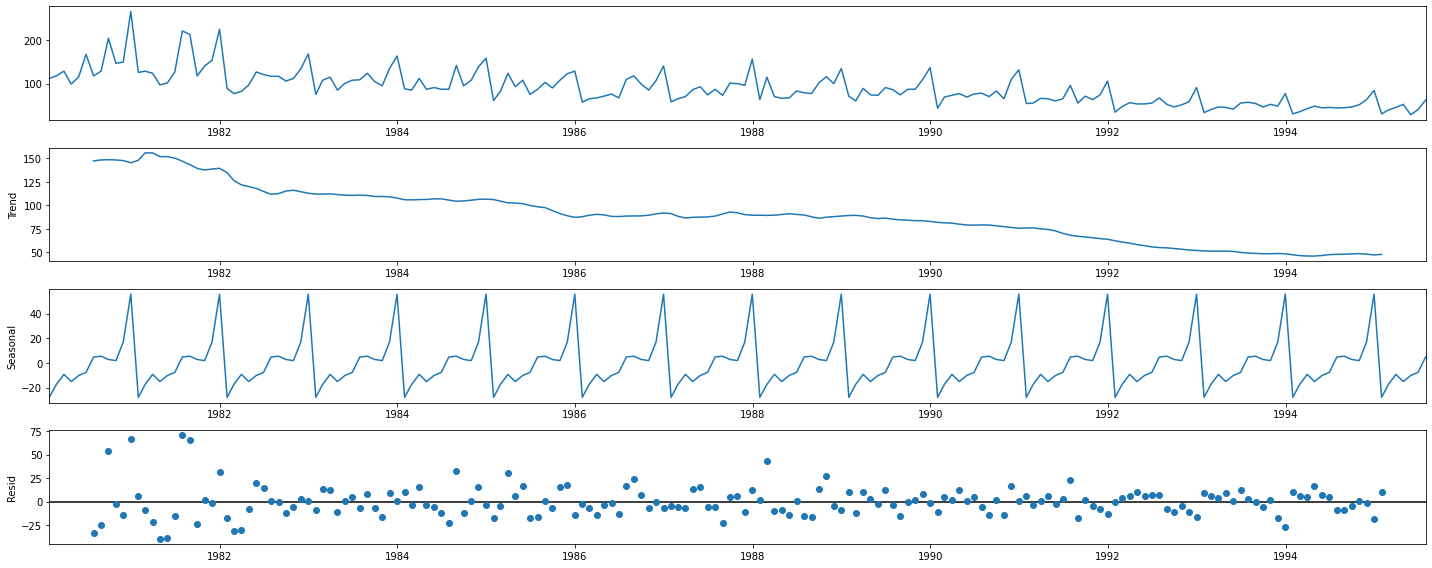

In [43]:
rose_decompose = seasonal_decompose(rose,model='additive')
rose_decompose.plot();

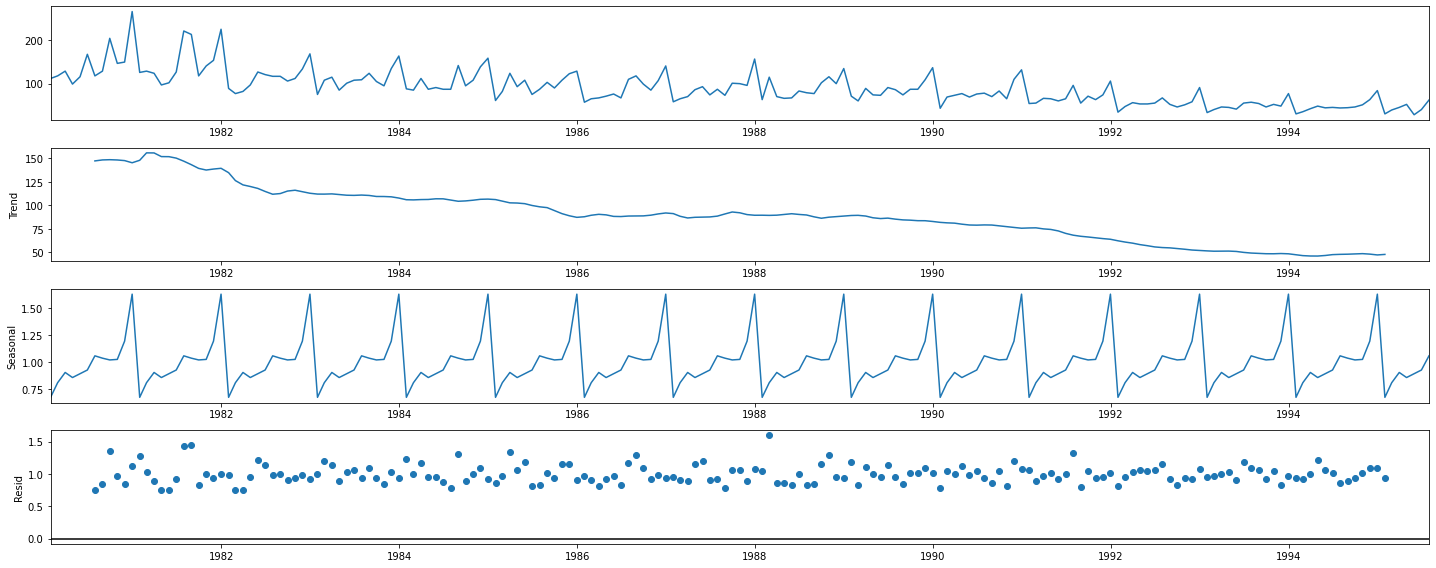

In [44]:
rose_decompose_1 = seasonal_decompose(rose,model='multiplicative')
rose_decompose_1.plot();

<AxesSubplot:xlabel='Time Stamp'>

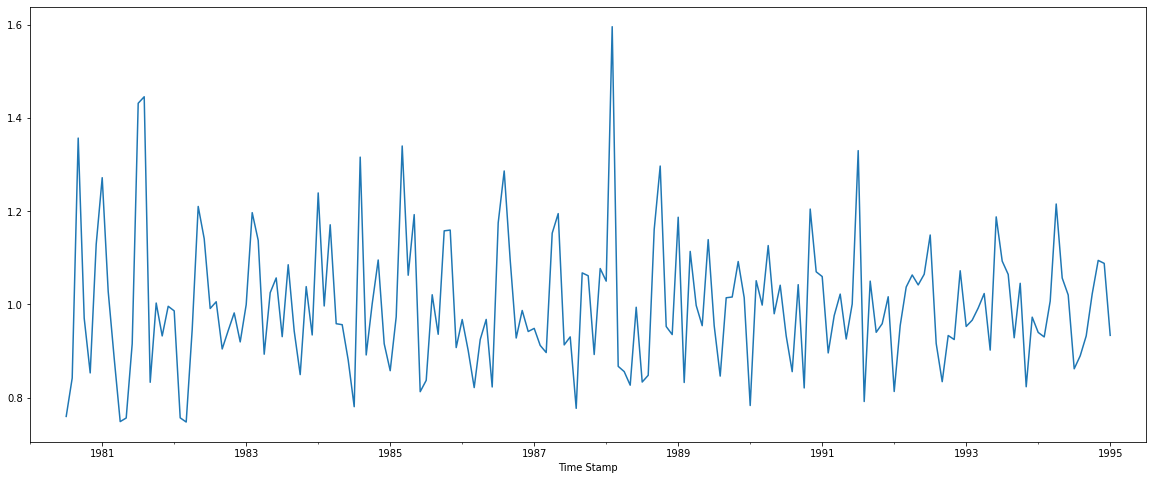

In [45]:
rose_decompose_1.resid.plot()

In [46]:
rose_monthly_sales = pd.pivot_table(rose,values='Rose',columns=rose.index.month_name(),
                                        index=rose.index.year)
rose_monthly_sales

Time Stamp  April      August  December  February  January        July   June  \
Time Stamp                                                                      
1980         99.0  129.000000     267.0     118.0    112.0  118.000000  168.0   
1981         97.0  214.000000     226.0     129.0    126.0  222.000000  127.0   
1982         97.0  117.000000     169.0      77.0     89.0  117.000000  121.0   
1983         85.0  124.000000     164.0     108.0     75.0  109.000000  108.0   
1984         87.0  142.000000     159.0      85.0     88.0   87.000000   87.0   
1985         93.0  103.000000     129.0      82.0     61.0   87.000000   75.0   
1986         71.0  118.000000     141.0      65.0     57.0  110.000000   67.0   
1987         86.0   73.000000     157.0      65.0     58.0   87.000000   74.0   
1988         66.0   77.000000     135.0     115.0     63.0   79.000000   83.0   
1989         74.0   74.000000     137.0      60.0     71.0   86.000000   91.0   
1990         77.0   70.000000     132.0      69.0     43.0   78.000000   76.0   
1991         65.0   55.000000     106.0      55.0     54.0   96.000000   65.0   
1992         53.0   52.000000      91.0      47.0     34.0   67.000000   55.0   
1993         45.0   54.000000      77.0      40.0     33.0   57.000000   55.0   
1994         48.0   44.326877      84.0      35.0     30.0   43.693064   45.0   
1995         52.0         NaN       NaN      39.0     30.0   62.000000   40.0   

Time Stamp  March    May  November  October  September  
Time Stamp                                              
1980        129.0  116.0     150.0    147.0      205.0  
1981        124.0  102.0     154.0    141.0      118.0  
1982         82.0  127.0     134.0    112.0      106.0  
1983        115.0  101.0     135.0     95.0      105.0  
1984        112.0   91.0     139.0    108.0       95.0  
1985        124.0  108.0     123.0    108.0       90.0  
1986         67.0   76.0     107.0     85.0       99.0  
1987         70.0   93.0      96.0    100.0      101.0  
1988         70.0   67.0     100.0    116.0      102.0  
1989         89.0   73.0     109.0     87.0       87.0  
1990         73.0   69.0     110.0     65.0       83.0  
1991         66.0   60.0      74.0     63.0       71.0  
1992         56.0   53.0      58.0     51.0       46.0  
1993         46.0   41.0      48.0     52.0       46.0  
1994         42.0   44.0      63.0     51.0       46.0  
1995         45.0   28.0       NaN      NaN        NaN

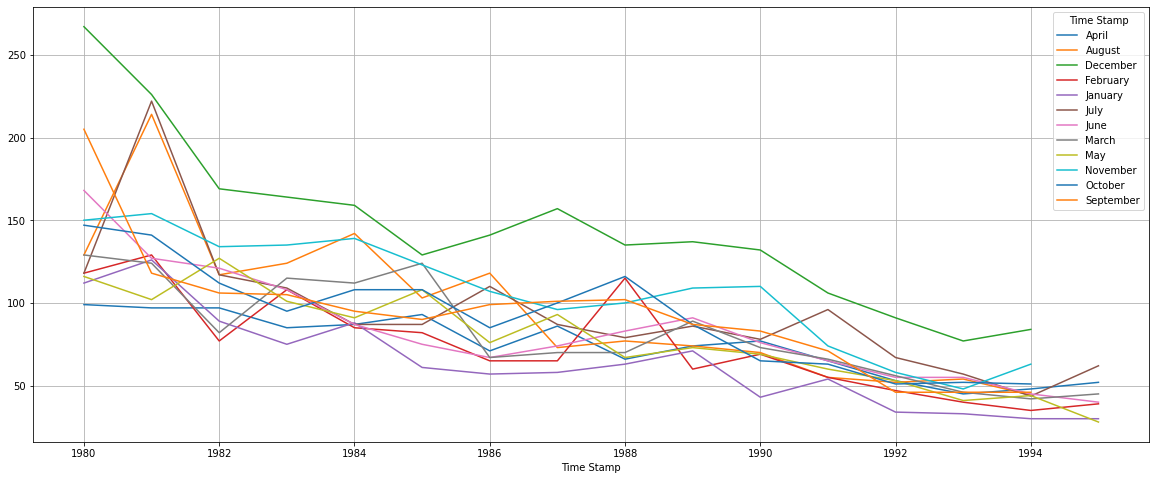

In [47]:
rose_monthly_sales.plot()
plt.grid()
plt.show();

#### Q-3.Split the data into training and test. The test data should start in 1991.

***SPARKLING WINE***

In [48]:
train_sparkling = sparkling.loc['1980':"1990"]
test_sparkling = sparkling.loc['1991':]

In [49]:
display(train_sparkling.head())
display(train_sparkling.tail())
display(test_sparkling.head())
display(test_sparkling.tail())


Sparkling
Time Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

Sparkling
Time Stamp           
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047

Sparkling
Time Stamp           
1991-01-31       1902
1991-02-28       2049
1991-03-31       1874
1991-04-30       1279
1991-05-31       1432

Sparkling
Time Stamp           
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031

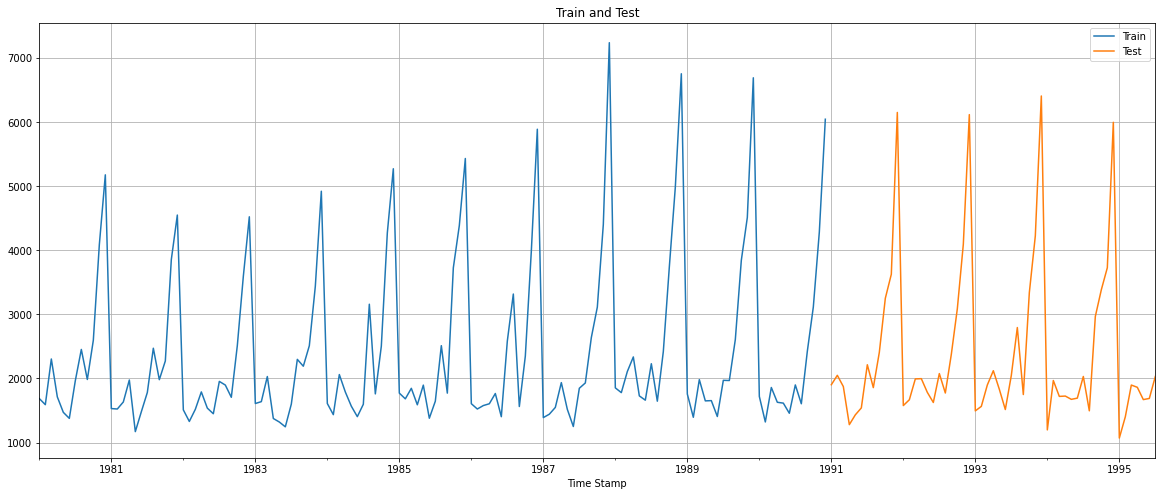

In [50]:
train_sparkling['Sparkling'].plot()
test_sparkling['Sparkling'].plot()
plt.grid()
plt.legend(['Train','Test'])
plt.title('Train and Test')
plt.show();

***ROSE WINE***

In [51]:
train_rose = rose.loc['1980':"1990"]
test_rose = rose.loc['1991':]

In [52]:
display(train_rose.head())
display(train_rose.tail())
display(test_rose.head())
display(test_rose.tail())


Rose
Time Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

Rose
Time Stamp       
1990-08-31   70.0
1990-09-30   83.0
1990-10-31   65.0
1990-11-30  110.0
1990-12-31  132.0

Rose
Time Stamp      
1991-01-31  54.0
1991-02-28  55.0
1991-03-31  66.0
1991-04-30  65.0
1991-05-31  60.0

Rose
Time Stamp      
1995-03-31  45.0
1995-04-30  52.0
1995-05-31  28.0
1995-06-30  40.0
1995-07-31  62.0

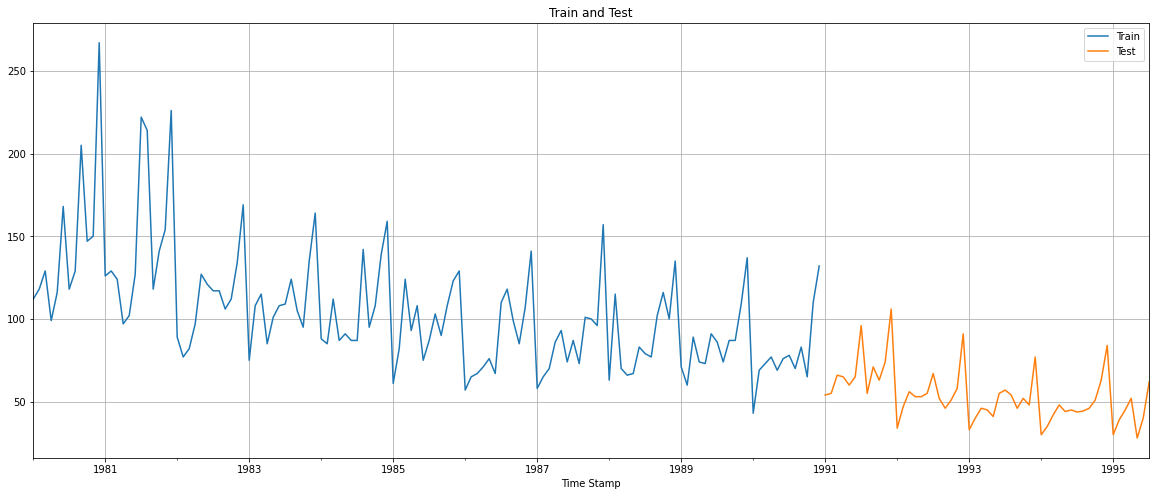

In [53]:
train_rose['Rose'].plot()
test_rose['Rose'].plot()
plt.grid()
plt.title('Train and Test')
plt.legend(['Train','Test'])
plt.show();

#### Q-4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other additional models such as regression, naïve forecast models, simple average models, moving average models should also be built on the training data and check the performance on the test data using RMSE.

#### REGRESSION MODEL

***SPARKLING WINE***

In [54]:
train_time = [i+1 for i in range(len(train_sparkling))]
test_time = [i+133 for i in range(len(test_sparkling))]

In [55]:
print(train_time)
print('')
print(test_time)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]

[133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [56]:
LR_train_sparkling = train_sparkling.copy()
LR_test_sparkling = test_sparkling.copy()

In [57]:
LR_train_sparkling["train_time"] = train_time
LR_test_sparkling['test_time'] = test_time

In [58]:
LR_train_sparkling

Sparkling  train_time
Time Stamp                       
1980-01-31       1686           1
1980-02-29       1591           2
1980-03-31       2304           3
1980-04-30       1712           4
1980-05-31       1471           5
...               ...         ...
1990-08-31       1605         128
1990-09-30       2424         129
1990-10-31       3116         130
1990-11-30       4286         131
1990-12-31       6047         132

[132 rows x 2 columns]

In [59]:
LR_test_sparkling.head()

Sparkling  test_time
Time Stamp                      
1991-01-31       1902        133
1991-02-28       2049        134
1991-03-31       1874        135
1991-04-30       1279        136
1991-05-31       1432        137

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
lr = LinearRegression()

In [62]:
lr.fit(LR_train_sparkling[['train_time']],LR_train_sparkling['Sparkling'].values)

LinearRegression()

C:\Users\home9\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- test_time
Feature names seen at fit time, yet now missing:
- train_time

  warnings.warn(message, FutureWarning)


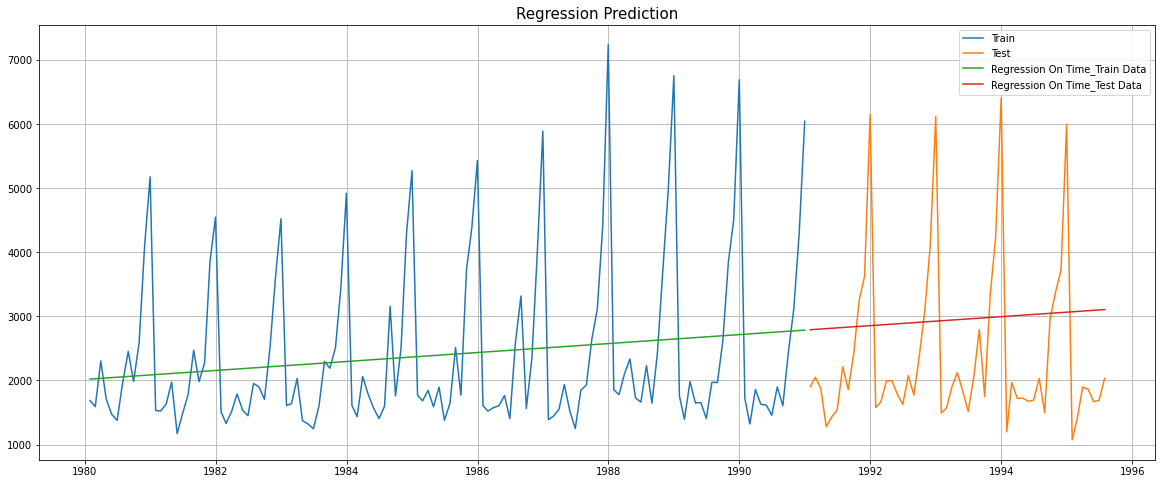

In [63]:
train_predictions_LR        = lr.predict(LR_train_sparkling[['train_time']])
LR_train_sparkling['RegOnTime'] = train_predictions_LR
test_predictions_LR         = lr.predict(LR_test_sparkling[['test_time']])
LR_test_sparkling['RegOnTime'] = test_predictions_LR


plt.plot( train_sparkling['Sparkling'], label='Train')
plt.plot(test_sparkling['Sparkling'], label='Test')
plt.plot(LR_train_sparkling['RegOnTime'], label='Regression On Time_Train Data')
plt.plot(LR_test_sparkling['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.title('Regression Prediction',fontdict={'fontsize':15})
plt.grid();

In [64]:
def MAPE(y, yhat):
    y, yhat = np.array(y),np.array(yhat)
    try:
        mape = round(np.sum(np.abs(yhat-y))/np.sum(y) * 100,2)
    except:
        print("Observed Values are empty")
        mape=np.nan
    return mape

In [65]:
from sklearn import metrics

In [66]:
train_mape_LR = MAPE(train_sparkling['Sparkling'],train_predictions_LR)
train_mape_LR

40.05

In [67]:
train_rmse_LR = metrics.mean_squared_error(train_sparkling['Sparkling'],train_predictions_LR,squared=False)
train_rmse_LR

1279.32234587938

In [68]:
test_mape_LR = MAPE(test_sparkling['Sparkling'],test_predictions_LR)
test_mape_LR

50.15

In [69]:
test_rmse_LR = metrics.mean_squared_error(test_sparkling['Sparkling'],test_predictions_LR,squared=False)
test_rmse_LR

1389.135174897992

In [70]:
sparkling_model_result = pd.DataFrame({'TRAIN RMSE':train_rmse_LR,'TEST RMSE':test_rmse_LR,
                                       'TRAIN MAPE':train_mape_LR,'TEST MAPE':test_mape_LR},index=['Regression On Time'])

In [71]:
sparkling_model_result

TRAIN RMSE    TEST RMSE  TRAIN MAPE  TEST MAPE
Regression On Time  1279.322346  1389.135175       40.05      50.15

***ROSE WINE***

In [72]:
train_time= [i+1 for i in range(len(train_rose))]
test_time = [i+133 for i in range(len(test_rose))]
print(train_time)
print('')
print(test_time)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]

[133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [73]:
LR_train_rose = train_rose.copy()
LR_test_rose = test_rose.copy()

In [74]:
LR_train_rose["train_time"] = train_time
LR_test_rose['test_time'] = test_time

In [75]:
LR_train_rose

Rose  train_time
Time Stamp                   
1980-01-31  112.0           1
1980-02-29  118.0           2
1980-03-31  129.0           3
1980-04-30   99.0           4
1980-05-31  116.0           5
...           ...         ...
1990-08-31   70.0         128
1990-09-30   83.0         129
1990-10-31   65.0         130
1990-11-30  110.0         131
1990-12-31  132.0         132

[132 rows x 2 columns]

In [76]:
LR_test_rose.head()

Rose  test_time
Time Stamp                 
1991-01-31  54.0        133
1991-02-28  55.0        134
1991-03-31  66.0        135
1991-04-30  65.0        136
1991-05-31  60.0        137

In [77]:
lr.fit(LR_train_rose[['train_time']],LR_train_rose['Rose'].values)

LinearRegression()

C:\Users\home9\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- test_time
Feature names seen at fit time, yet now missing:
- train_time

  warnings.warn(message, FutureWarning)


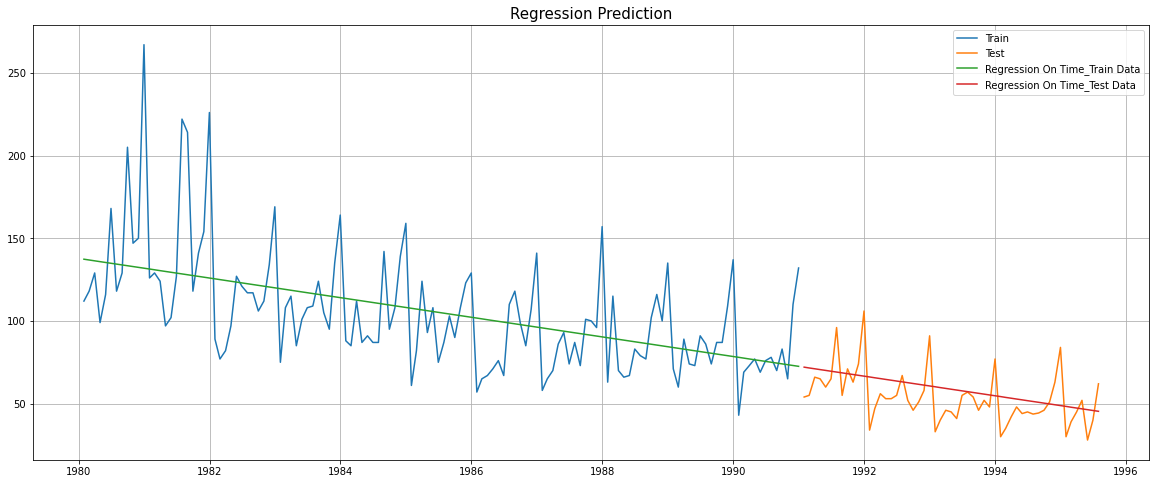

In [78]:
train_predictions_LR        = lr.predict(LR_train_rose[['train_time']])
LR_train_rose['RegOnTime'] = train_predictions_LR
test_predictions_LR         = lr.predict(LR_test_rose[['test_time']])
LR_test_rose['RegOnTime'] = test_predictions_LR


plt.plot( train_rose['Rose'], label='Train')
plt.plot(test_rose['Rose'], label='Test')
plt.plot(LR_train_rose['RegOnTime'], label='Regression On Time_Train Data')
plt.plot(LR_test_rose['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.title('Regression Prediction',fontdict={'fontsize':15})
plt.grid();

In [79]:
train_mape_LR = MAPE(train_rose['Rose'],train_predictions_LR)
train_mape_LR

21.22

In [80]:
train_rmse_LR = metrics.mean_squared_error(train_rose['Rose'],train_predictions_LR,squared=False)
train_rmse_LR

30.718135411331016

In [81]:
test_mape_LR = MAPE(test_rose['Rose'],test_predictions_LR)
test_mape_LR

22.94

In [82]:
test_rmse_LR = metrics.mean_squared_error(test_rose['Rose'],test_predictions_LR,squared=False)
test_rmse_LR

15.291459678953903

In [83]:
rose_model_result = pd.DataFrame({'TRAIN RMSE':train_rmse_LR,'TEST RMSE':test_rmse_LR,
                                       'TRAIN MAPE':train_mape_LR,'TEST MAPE':test_mape_LR},index=['Regression On Time'])

In [84]:
rose_model_result

TRAIN RMSE  TEST RMSE  TRAIN MAPE  TEST MAPE
Regression On Time   30.718135   15.29146       21.22      22.94

#### NAIVE FORECAST MODEL

***SPARKLING WINE***

In [85]:
NB_train_sparkling = train_sparkling.copy()
NB_test_sparkling = test_sparkling.copy()

In [86]:
NB_train_sparkling['naive'] = np.asarray(train_sparkling['Sparkling'])[len(np.asarray(train_sparkling['Sparkling']))-1]
NB_train_sparkling['naive'].head()

Time Stamp
1980-01-31    6047
1980-02-29    6047
1980-03-31    6047
1980-04-30    6047
1980-05-31    6047
Name: naive, dtype: int64

In [87]:
NB_test_sparkling['naive'] = np.asarray(train_sparkling['Sparkling'])[len(np.asarray(train_sparkling['Sparkling']))-1]
NB_test_sparkling['naive'].head()

Time Stamp
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: naive, dtype: int64

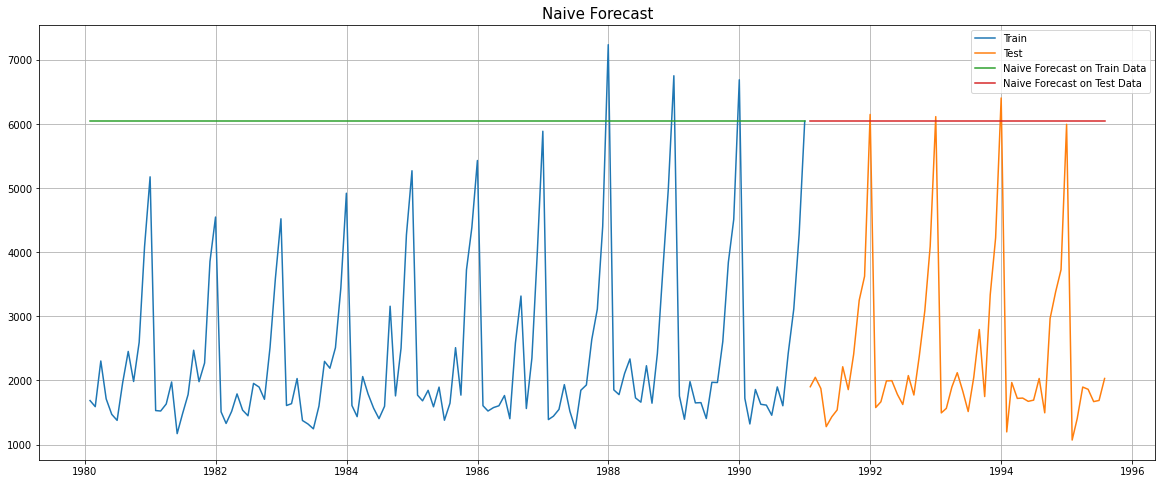

In [88]:
plt.plot(train_sparkling['Sparkling'], label='Train')
plt.plot(test_sparkling['Sparkling'], label='Test')
plt.plot(NB_train_sparkling['naive'], label='Naive Forecast on Train Data')
plt.plot(NB_test_sparkling['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast",fontdict={'fontsize':15})
plt.grid();

In [89]:
train_mape_NB = MAPE(train_sparkling['Sparkling'],NB_train_sparkling['naive'])
train_mape_NB

153.17

In [90]:
train_rmse_NB = metrics.mean_squared_error(train_sparkling['Sparkling'],NB_train_sparkling['naive'],squared=False)
train_rmse_NB

3867.700801823254

In [91]:
test_mape_NB = MAPE(test_sparkling['Sparkling'],NB_test_sparkling['naive'])
test_mape_NB

152.87

In [92]:
test_rmse_NB = metrics.mean_squared_error(test_sparkling['Sparkling'],NB_test_sparkling['naive'],squared=False)
test_rmse_NB

3864.2793518443914

In [93]:
NB_result_sparkling = pd.DataFrame({'TRAIN RMSE':train_rmse_NB,'TEST RMSE':test_rmse_NB,
                                       'TRAIN MAPE':train_mape_NB,'TEST MAPE':test_mape_NB},index=['Naive Forecast'])

In [94]:
NB_result_sparkling

TRAIN RMSE    TEST RMSE  TRAIN MAPE  TEST MAPE
Naive Forecast  3867.700802  3864.279352      153.17     152.87

***ROSE WINE***

In [95]:
NB_train_rose = train_rose.copy()
NB_test_rose = test_rose.copy()

In [96]:
NB_train_rose['naive'] = np.asarray(train_rose['Rose'])[len(np.asarray(train_rose['Rose']))-1]
NB_train_rose['naive'].head()

Time Stamp
1980-01-31    132.0
1980-02-29    132.0
1980-03-31    132.0
1980-04-30    132.0
1980-05-31    132.0
Name: naive, dtype: float64

In [97]:
NB_test_rose['naive'] = np.asarray(train_rose['Rose'])[len(np.asarray(train_rose['Rose']))-1]
NB_test_rose['naive'].head()

Time Stamp
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Name: naive, dtype: float64

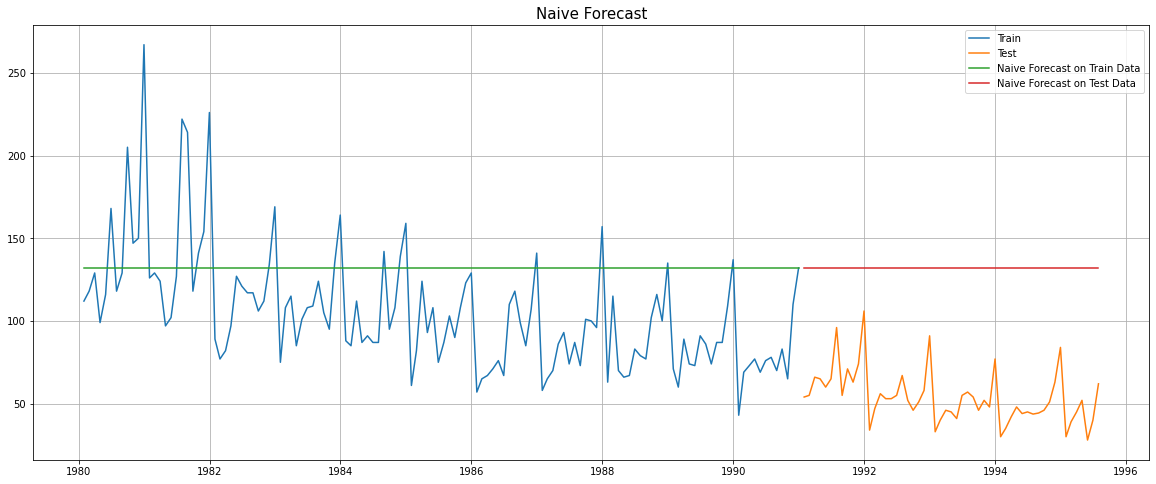

In [98]:
plt.plot(train_rose['Rose'], label='Train')
plt.plot(test_rose['Rose'], label='Test')
plt.plot(NB_train_rose['naive'], label='Naive Forecast on Train Data')
plt.plot(NB_test_rose['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast",fontdict={'fontsize':15})
plt.grid();

In [99]:
train_mape_NB = MAPE(train_rose['Rose'],NB_train_rose['naive'])
train_mape_NB

36.38

In [100]:
train_rmse_NB = metrics.mean_squared_error(train_rose['Rose'],NB_train_rose['naive'],squared=False)
train_rmse_NB

45.06375954403299

In [101]:
test_mape_NB = MAPE(test_rose['Rose'],NB_test_rose['naive'])
test_mape_NB

145.35

In [102]:
test_rmse_NB = metrics.mean_squared_error(test_rose['Rose'],NB_test_rose['naive'],squared=False)
test_rmse_NB

79.77806619469453

In [103]:
NB_result_rose = pd.DataFrame({'TRAIN RMSE':train_rmse_NB,'TEST RMSE':test_rmse_NB,
                                       'TRAIN MAPE':train_mape_NB,'TEST MAPE':test_mape_NB},index=['Naive Forecast'])

In [104]:
NB_result_rose

TRAIN RMSE  TEST RMSE  TRAIN MAPE  TEST MAPE
Naive Forecast    45.06376  79.778066       36.38     145.35

#### SIMPLE AVERAGE

***SPARKLING WINE***

In [105]:
SA_train_sparkling = train_sparkling.copy()
SA_test_sparkling = test_sparkling.copy()

In [106]:
SA_train_sparkling['mean_forecast'] = train_sparkling['Sparkling'].mean()
SA_train_sparkling

Sparkling  mean_forecast
Time Stamp                          
1980-01-31       1686    2403.780303
1980-02-29       1591    2403.780303
1980-03-31       2304    2403.780303
1980-04-30       1712    2403.780303
1980-05-31       1471    2403.780303
...               ...            ...
1990-08-31       1605    2403.780303
1990-09-30       2424    2403.780303
1990-10-31       3116    2403.780303
1990-11-30       4286    2403.780303
1990-12-31       6047    2403.780303

[132 rows x 2 columns]

In [107]:
SA_test_sparkling['mean_forecast'] = train_sparkling['Sparkling'].mean()
SA_test_sparkling.head()

Sparkling  mean_forecast
Time Stamp                          
1991-01-31       1902    2403.780303
1991-02-28       2049    2403.780303
1991-03-31       1874    2403.780303
1991-04-30       1279    2403.780303
1991-05-31       1432    2403.780303

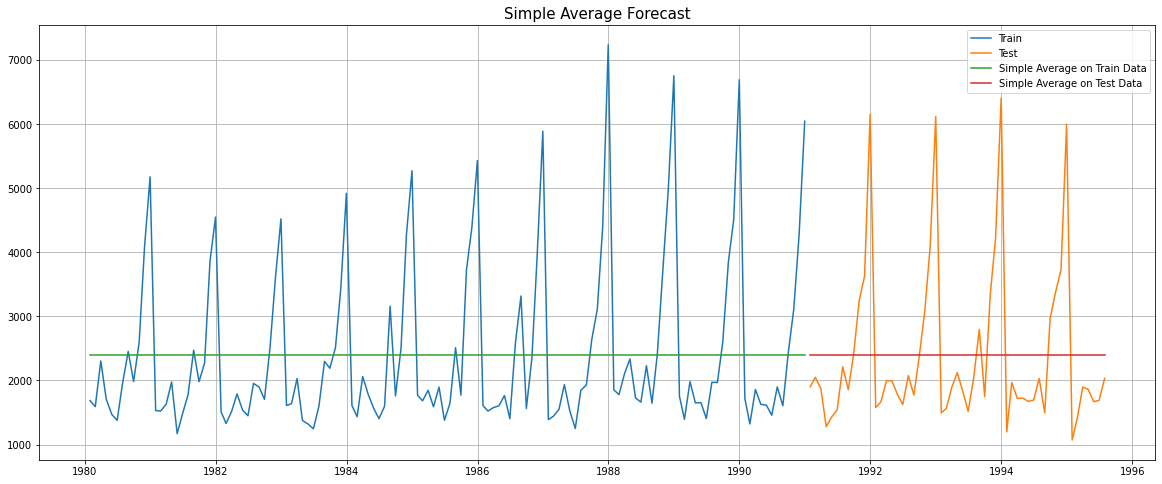

In [108]:
plt.plot(SA_train_sparkling['Sparkling'], label='Train')
plt.plot(SA_test_sparkling['Sparkling'], label='Test')
plt.plot(SA_train_sparkling['mean_forecast'], label='Simple Average on Train Data')
plt.plot(SA_test_sparkling['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast",fontdict={'fontsize':15})
plt.grid();

In [109]:
train_rmse_SA = metrics.mean_squared_error(train_sparkling['Sparkling'],SA_train_sparkling['mean_forecast'],squared=False)
train_mape_SA = MAPE(train_sparkling['Sparkling'],SA_train_sparkling['mean_forecast'])
test_rmse_SA = metrics.mean_squared_error(test_sparkling['Sparkling'],SA_test_sparkling['mean_forecast'],squared=False)
test_mape_SA= MAPE(test_sparkling['Sparkling'],SA_test_sparkling['mean_forecast'])

In [110]:
SA_result_sparkling = pd.DataFrame({'TRAIN RMSE':train_rmse_SA,'TEST RMSE':test_rmse_SA,
                                       'TRAIN MAPE':train_mape_SA,'TEST MAPE':test_mape_SA},index=['Simple Average'])
SA_result_sparkling

TRAIN RMSE    TEST RMSE  TRAIN MAPE  TEST MAPE
Simple Average  1298.483628  1275.081804       40.36       38.9

***ROSE WINE***

In [111]:
SA_train_rose = train_rose.copy()
SA_test_rose = test_rose.copy()

In [112]:
SA_train_rose['mean_forecast'] = train_rose['Rose'].mean()
SA_train_rose

Rose  mean_forecast
Time Stamp                      
1980-01-31  112.0     104.939394
1980-02-29  118.0     104.939394
1980-03-31  129.0     104.939394
1980-04-30   99.0     104.939394
1980-05-31  116.0     104.939394
...           ...            ...
1990-08-31   70.0     104.939394
1990-09-30   83.0     104.939394
1990-10-31   65.0     104.939394
1990-11-30  110.0     104.939394
1990-12-31  132.0     104.939394

[132 rows x 2 columns]

In [113]:
SA_test_rose['mean_forecast'] = train_rose['Rose'].mean()
SA_test_rose.head()

Rose  mean_forecast
Time Stamp                     
1991-01-31  54.0     104.939394
1991-02-28  55.0     104.939394
1991-03-31  66.0     104.939394
1991-04-30  65.0     104.939394
1991-05-31  60.0     104.939394

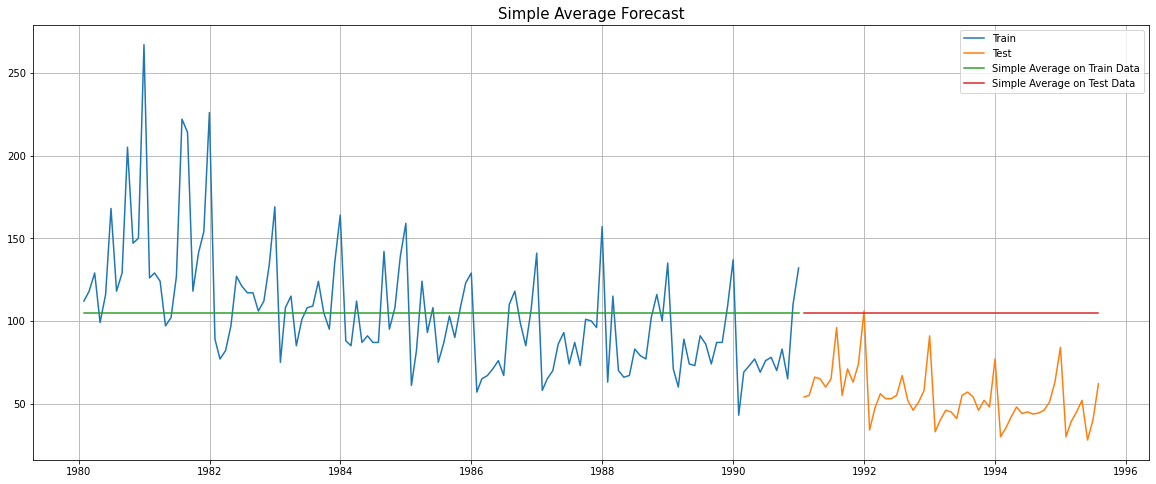

In [114]:
plt.plot(SA_train_rose['Rose'], label='Train')
plt.plot(SA_test_rose['Rose'], label='Test')
plt.plot(SA_train_rose['mean_forecast'], label='Simple Average on Train Data')
plt.plot(SA_test_rose['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast",fontdict={'fontsize':15})
plt.grid();

In [115]:
train_rmse_SA = metrics.mean_squared_error(train_rose['Rose'],SA_train_rose['mean_forecast'],squared=False)
train_mape_SA = MAPE(train_rose['Rose'],SA_train_rose['mean_forecast'])
test_rmse_SA = metrics.mean_squared_error(test_rose['Rose'],SA_test_rose['mean_forecast'],squared=False)
test_mape_SA= MAPE(test_rose['Rose'],SA_test_rose['mean_forecast'])

In [116]:
SA_result_rose = pd.DataFrame({'TRAIN RMSE':train_rmse_SA,'TEST RMSE':test_rmse_SA,
                                       'TRAIN MAPE':train_mape_SA,'TEST MAPE':test_mape_SA},index=['Simple Average'])
SA_result_rose

TRAIN RMSE  TEST RMSE  TRAIN MAPE  TEST MAPE
Simple Average   36.034234  53.521557       25.39      95.13

#### MOVING AVERAGE

***SPARKLING WINE***

In [117]:
MovingAverage = sparkling.copy()

In [118]:
MovingAverage.head()

Sparkling
Time Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

In [119]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head(10)

Sparkling  Trailing_2  Trailing_4   Trailing_6   Trailing_9
Time Stamp                                                             
1980-01-31       1686         NaN         NaN          NaN          NaN
1980-02-29       1591      1638.5         NaN          NaN          NaN
1980-03-31       2304      1947.5         NaN          NaN          NaN
1980-04-30       1712      2008.0     1823.25          NaN          NaN
1980-05-31       1471      1591.5     1769.50          NaN          NaN
1980-06-30       1377      1424.0     1716.00  1690.166667          NaN
1980-07-31       1966      1671.5     1631.50  1736.833333          NaN
1980-08-31       2453      2209.5     1816.75  1880.500000          NaN
1980-09-30       1984      2218.5     1945.00  1827.166667  1838.222222
1980-10-31       2596      2290.0     2249.75  1974.500000  1939.333333

In [120]:
trailing_MovingAverage_train=MovingAverage.loc['1980':"1990"]
trailing_MovingAverage_test=MovingAverage.loc["1991":]

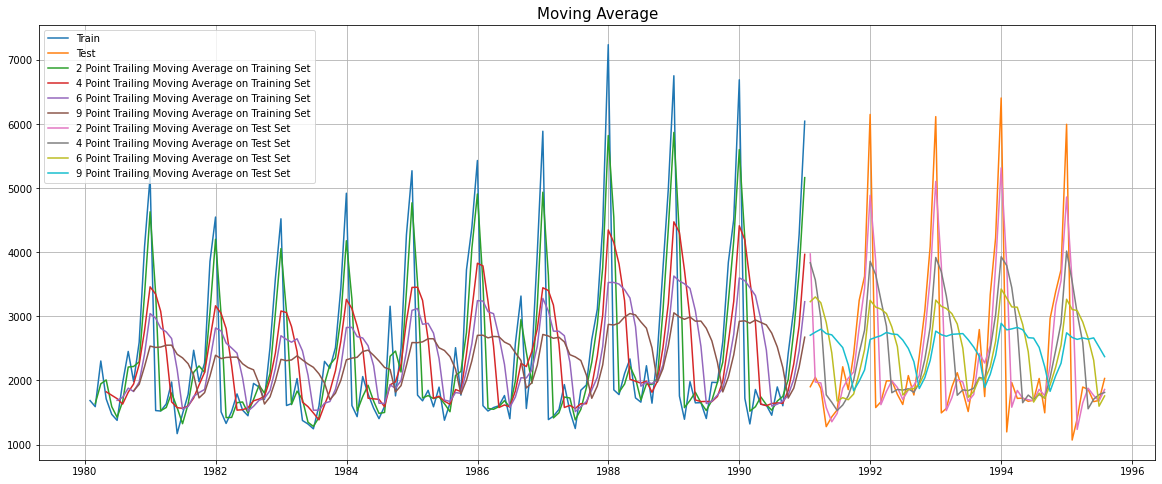

In [121]:
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.title('Moving Average',fontdict={'fontsize':15})
plt.legend(loc = 'best')
plt.grid();

In [122]:
## Test Data - RMSE --> 2 point Trailing MA

test_rmse_MA_2 = metrics.mean_squared_error(test_sparkling['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
test_mape_MA_2 = MAPE(test_sparkling['Sparkling'],trailing_MovingAverage_test['Trailing_2'])

## Test Data - RMSE  --> 4 point Trailing MA

test_rmse_MA_4 = metrics.mean_squared_error(test_sparkling['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
test_mape_MA_4 = MAPE(test_sparkling['Sparkling'],trailing_MovingAverage_test['Trailing_4'])


## Test Data - RMSE --> 6 point Trailing MA

test_rmse_MA_6  = metrics.mean_squared_error(test_sparkling['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
test_mape_MA_6  = MAPE(test_sparkling['Sparkling'],trailing_MovingAverage_test['Trailing_6'])


## Test Data - RMSE  --> 9 point Trailing MA

test_rmse_MA_9  = metrics.mean_squared_error(test_sparkling['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
test_mape_MA_9  = MAPE(test_sparkling['Sparkling'],trailing_MovingAverage_test['Trailing_9'])



In [123]:
result_MA_sparkling= pd.DataFrame({'TEST RMSE': [test_rmse_MA_2,test_rmse_MA_4,test_rmse_MA_4,test_rmse_MA_9]
                          ,'TEST MAPE': [test_mape_MA_2,test_mape_MA_4,test_mape_MA_6,test_mape_MA_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

In [124]:
result_MA_sparkling

TEST RMSE  TEST MAPE
2pointTrailingMovingAverage   813.400684      19.70
4pointTrailingMovingAverage  1156.589694      35.96
6pointTrailingMovingAverage  1156.589694      43.86
9pointTrailingMovingAverage  1346.278315      46.86

***ROSE WINE***

In [125]:
MovingAverage = rose.copy()

In [126]:
MovingAverage.head()

Rose
Time Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

In [127]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head(10)

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Time Stamp                                                       
1980-01-31  112.0         NaN         NaN         NaN         NaN
1980-02-29  118.0       115.0         NaN         NaN         NaN
1980-03-31  129.0       123.5         NaN         NaN         NaN
1980-04-30   99.0       114.0      114.50         NaN         NaN
1980-05-31  116.0       107.5      115.50         NaN         NaN
1980-06-30  168.0       142.0      128.00  123.666667         NaN
1980-07-31  118.0       143.0      125.25  124.666667         NaN
1980-08-31  129.0       123.5      132.75  126.500000         NaN
1980-09-30  205.0       167.0      155.00  139.166667  132.666667
1980-10-31  147.0       176.0      149.75  147.166667  136.555556

In [128]:
trailing_MovingAverage_train=MovingAverage.loc['1980':"1990"]
trailing_MovingAverage_test=MovingAverage.loc["1991":]

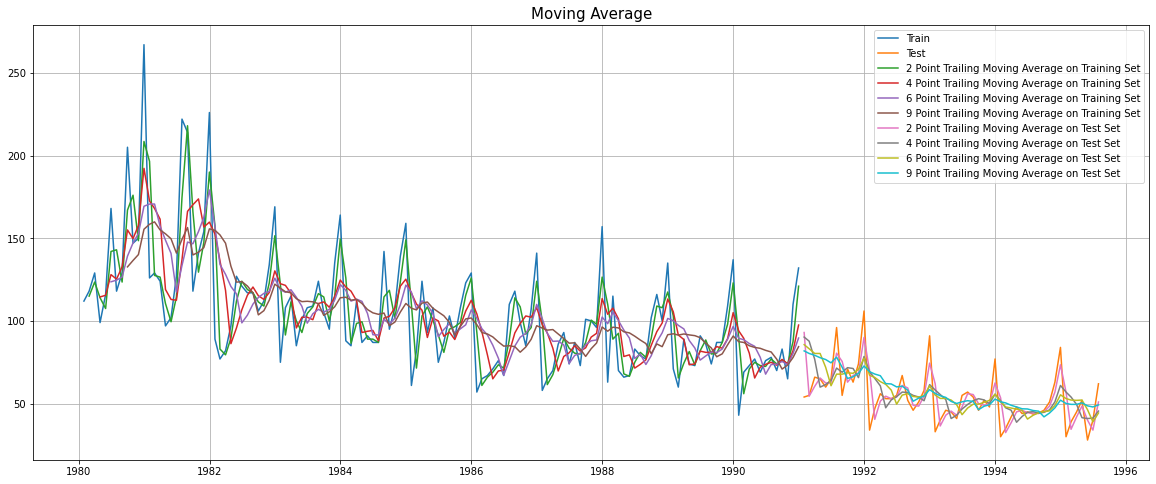

In [129]:
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.title('Moving Average',fontdict={'fontsize':15})
plt.legend(loc = 'best')
plt.grid();

In [130]:
## Test Data - RMSE --> 2 point Trailing MA

test_rmse_MA_2 = metrics.mean_squared_error(test_rose['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
test_mape_MA_2 = MAPE(test_rose['Rose'],trailing_MovingAverage_test['Trailing_2'])

## Test Data - RMSE  --> 4 point Trailing MA

test_rmse_MA_4 = metrics.mean_squared_error(test_rose['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
test_mape_MA_4 = MAPE(test_rose['Rose'],trailing_MovingAverage_test['Trailing_4'])


## Test Data - RMSE --> 6 point Trailing MA

test_rmse_MA_6  = metrics.mean_squared_error(test_rose['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
test_mape_MA_6  = MAPE(test_rose['Rose'],trailing_MovingAverage_test['Trailing_6'])


## Test Data - RMSE  --> 9 point Trailing MA

test_rmse_MA_9  = metrics.mean_squared_error(test_rose['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
test_mape_MA_9  = MAPE(test_rose['Rose'],trailing_MovingAverage_test['Trailing_9'])

In [131]:
result_MA_rose = pd.DataFrame({'TEST RMSE': [test_rmse_MA_2,test_rmse_MA_4,test_rmse_MA_4,test_rmse_MA_9]
                          ,'TEST MAPE': [test_mape_MA_2,test_mape_MA_4,test_mape_MA_6,test_mape_MA_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])
result_MA_rose

TEST RMSE  TEST MAPE
2pointTrailingMovingAverage  11.530180      13.60
4pointTrailingMovingAverage  14.462330      19.59
6pointTrailingMovingAverage  14.462330      20.83
9pointTrailingMovingAverage  14.740112      21.13

***SPARKLING OVER ALL RESULT***

In [132]:
sparkling_model_result = pd.concat([sparkling_model_result,NB_result_sparkling,SA_result_sparkling,result_MA_sparkling])
sparkling_model_result

TRAIN RMSE    TEST RMSE  TRAIN MAPE  TEST MAPE
Regression On Time           1279.322346  1389.135175       40.05      50.15
Naive Forecast               3867.700802  3864.279352      153.17     152.87
Simple Average               1298.483628  1275.081804       40.36      38.90
2pointTrailingMovingAverage          NaN   813.400684         NaN      19.70
4pointTrailingMovingAverage          NaN  1156.589694         NaN      35.96
6pointTrailingMovingAverage          NaN  1156.589694         NaN      43.86
9pointTrailingMovingAverage          NaN  1346.278315         NaN      46.86

***ROSE OVER ALL RESULT***

In [133]:
rose_model_result = pd.concat([rose_model_result,NB_result_rose,SA_result_rose,result_MA_rose])
rose_model_result

TRAIN RMSE  TEST RMSE  TRAIN MAPE  TEST MAPE
Regression On Time            30.718135  15.291460       21.22      22.94
Naive Forecast                45.063760  79.778066       36.38     145.35
Simple Average                36.034234  53.521557       25.39      95.13
2pointTrailingMovingAverage         NaN  11.530180         NaN      13.60
4pointTrailingMovingAverage         NaN  14.462330         NaN      19.59
6pointTrailingMovingAverage         NaN  14.462330         NaN      20.83
9pointTrailingMovingAverage         NaN  14.740112         NaN      21.13

In [134]:
from statsmodels.tsa.api import SimpleExpSmoothing,ExponentialSmoothing,Holt

#### SIMPLE EXPONENTIAL SMOOTHING


***SPARKLING WINE***

In [135]:
SES = SimpleExpSmoothing(train_sparkling,initialization_method='estimated')
model_SES = SES.fit(optimized=True)
model_SES.params

C:\Users\home9\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\home9\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


{'smoothing_level': 0.07028781460389563,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1763.9269926897732,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [136]:
train_sparkling

Sparkling
Time Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471
...               ...
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047

[132 rows x 1 columns]

In [137]:
SES_predict_train = model_SES.fittedvalues

In [138]:
SES_predict_train

Time Stamp
1980-01-31    1763.926993
1980-02-29    1758.449675
1980-03-31    1746.680003
1980-04-30    1785.852808
1980-05-31    1780.661855
                 ...     
1990-08-31    2431.630039
1990-09-30    2373.528020
1990-10-31    2377.075585
1990-11-30    2429.012968
1990-12-31    2559.536528
Length: 132, dtype: float64

In [139]:
SES_predict_test = model_SES.forecast(len(test_sparkling))
SES_predict_test

1991-01-31    2804.662714
1991-02-28    2804.662714
1991-03-31    2804.662714
1991-04-30    2804.662714
1991-05-31    2804.662714
1991-06-30    2804.662714
1991-07-31    2804.662714
1991-08-31    2804.662714
1991-09-30    2804.662714
1991-10-31    2804.662714
1991-11-30    2804.662714
1991-12-31    2804.662714
1992-01-31    2804.662714
1992-02-29    2804.662714
1992-03-31    2804.662714
1992-04-30    2804.662714
1992-05-31    2804.662714
1992-06-30    2804.662714
1992-07-31    2804.662714
1992-08-31    2804.662714
1992-09-30    2804.662714
1992-10-31    2804.662714
1992-11-30    2804.662714
1992-12-31    2804.662714
1993-01-31    2804.662714
1993-02-28    2804.662714
1993-03-31    2804.662714
1993-04-30    2804.662714
1993-05-31    2804.662714
1993-06-30    2804.662714
1993-07-31    2804.662714
1993-08-31    2804.662714
1993-09-30    2804.662714
1993-10-31    2804.662714
1993-11-30    2804.662714
1993-12-31    2804.662714
1994-01-31    2804.662714
1994-02-28    2804.662714
1994-03-31  

In [140]:
plt.plot(train_sparkling['Sparkling'], label='Train')
plt.plot(test_sparkling['Sparkling'], label='Test')
plt.plot(SES_predict_test, label='Simple Exponential Alpha(0.070)')
plt.legend(loc='best')
plt.title("Simple Exponential Forecast for Sparkling Wine",fontdict={'fontsize':15})
plt.grid();

In [141]:
rmse_SES_train = metrics.mean_squared_error(train_sparkling['Sparkling'],SES_predict_train,squared=False)
rmse_SES_train

1322.897875391824

In [142]:
rmse_SES_test = metrics.mean_squared_error(test_sparkling['Sparkling'],SES_predict_test,squared=False)
rmse_SES_test

1338.0046232563645

In [143]:
mape_SES_train = MAPE(train_sparkling['Sparkling'],SES_predict_train)
mape_SES_test = MAPE(test_sparkling['Sparkling'],SES_predict_test)


In [144]:
result_SES = pd.DataFrame({'TRAIN RMSE':[rmse_SES_train],'TEST RMSE':[rmse_SES_test],
                          'TRAIN MAPE':[mape_SES_train],'TEST MAPE':[mape_SES_test]},
                          index=['Simple Exponential Alpha(0.070)'])
result_SES

TRAIN RMSE    TEST RMSE  TRAIN MAPE  \
Simple Exponential Alpha(0.070)  1322.897875  1338.004623       40.95   

                                 TEST MAPE  
Simple Exponential Alpha(0.070)      47.11

##### FOR DIFFERENT SMOOTHING LEVELS

In [145]:
result_SES_1 = pd.DataFrame({'Alpha':[],'TRAIN RMSE':[],'TEST RMSE':[],
                          'TRAIN MAPE':[],'TEST MAPE':[]})


In [146]:
SES_train = train_sparkling.copy()
SES_test = test_sparkling.copy()

In [147]:
for i in np.arange(0.01,1,0.01):
    model_SES_i = SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_i.fittedvalues
    SES_test['predict',i] = model_SES_i.forecast(steps=len(test_sparkling))
    rmse_SES_train_i = metrics.mean_squared_error(train_sparkling['Sparkling'],SES_train['predict',i],squared=False)
    rmse_SES_test_i = metrics.mean_squared_error(test_sparkling['Sparkling'],SES_test['predict',i],squared=False)
    mape_SES_train_i  = MAPE(train_sparkling['Sparkling'],SES_train['predict',i])
    mape_SES_test_i = MAPE(test_sparkling['Sparkling'],SES_test['predict',i])
    result_SES_1=result_SES_1.append({'Alpha':i,'TRAIN RMSE':rmse_SES_train_i,'TEST RMSE':rmse_SES_test_i,
                          'TRAIN MAPE':mape_SES_train_i,'TEST MAPE':mape_SES_test_i},ignore_index=True)

In [148]:
result_SES_1.sort_values('TEST MAPE',ascending=True)

Alpha   TRAIN RMSE    TEST RMSE  TRAIN MAPE  TEST MAPE
0    0.01  1397.988872  1286.648058       35.69      35.78
1    0.02  1346.258628  1278.497798       37.13      40.71
2    0.03  1329.877089  1292.565292       38.24      43.14
3    0.04  1324.937340  1305.283075       39.13      44.51
4    0.05  1324.401979  1316.359347       39.84      45.49
..    ...          ...          ...         ...        ...
94   0.95  1363.677017  3778.432623       36.39     149.55
95   0.96  1365.440907  3796.048620       36.28     150.22
96   0.97  1367.271345  3813.437370       36.18     150.88
97   0.98  1369.169661  3830.602869       36.07     151.54
98   0.99  1371.137277  3847.548965       35.96     152.21

[99 rows x 5 columns]

In [149]:
plt.plot(train_sparkling['Sparkling'], label='Train')
plt.plot(test_sparkling['Sparkling'], label='Test')
plt.plot(SES_test['predict',0.01], label='Simple Exponential Alpha(0.1)')
plt.plot(SES_predict_test, label='Simple Exponential Alpha(0.070)')
plt.legend(loc='best')
plt.title("Simple Exponential Forecast",fontdict={'fontsize':15})
plt.grid();

In [150]:
model_result_ses_sparkling = pd.DataFrame({'TRAIN RMSE':result_SES_1['TRAIN RMSE'][0],
                                'TEST RMSE':result_SES_1['TEST RMSE'][0],
                                'TRAIN MAPE':result_SES_1['TRAIN MAPE'][0],
                                'TEST MAPE':result_SES_1['TEST MAPE'][0]},
                               index=['Single Exponential Smoothing Alpha(0.01)'])
model_result_ses_sparkling

TRAIN RMSE    TEST RMSE  \
Single Exponential Smoothing Alpha(0.01)  1397.988872  1286.648058   

                                          TRAIN MAPE  TEST MAPE  
Single Exponential Smoothing Alpha(0.01)       35.69      35.78

***ROSE WINE***

In [151]:
SES_rose = SimpleExpSmoothing(train_rose,initialization_method='estimated')
model_SES_rose = SES_rose.fit(optimized=True)
model_SES_rose.params

C:\Users\home9\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


{'smoothing_level': 0.09874920899865502,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.3871074301239,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [152]:
SES_predict_train_rose = model_SES_rose.fittedvalues

In [153]:
SES_predict_test_rose = model_SES_rose.forecast(len(test_rose))
SES_predict_test_rose.head()

1991-01-31    87.10498
1991-02-28    87.10498
1991-03-31    87.10498
1991-04-30    87.10498
1991-05-31    87.10498
Freq: M, dtype: float64

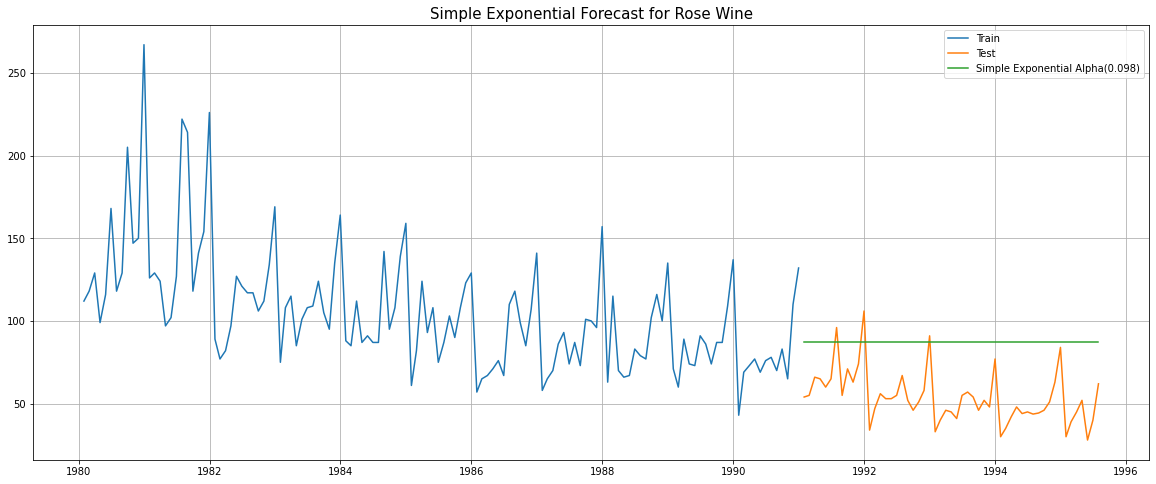

In [154]:
plt.plot(train_rose['Rose'], label='Train')
plt.plot(test_rose['Rose'], label='Test')
plt.plot(SES_predict_test_rose, label='Simple Exponential Alpha(0.098)')
plt.legend(loc='best')
plt.title("Simple Exponential Forecast for Rose Wine",fontdict={'fontsize':15})
plt.grid();

In [155]:
rmse_SES_train_rose = metrics.mean_squared_error(train_rose['Rose'],SES_predict_train_rose,squared=False)
rmse_SES_test_rose = metrics.mean_squared_error(test_rose['Rose'],SES_predict_test_rose,squared=False)


In [156]:
mape_SES_train_rose = MAPE(train_rose['Rose'],SES_predict_train_rose)
mape_SES_test_rose = MAPE(test_rose['Rose'],SES_predict_test_rose)

In [157]:
result_SES_rose = pd.DataFrame({'TRAIN RMSE':[rmse_SES_train_rose],'TEST RMSE':[rmse_SES_test_rose],
                          'TRAIN MAPE':[mape_SES_train_rose],'TEST MAPE':[mape_SES_test_rose]},
                              index=['Simple Exponential Alpha(0.098)'])
result_SES_rose

TRAIN RMSE  TEST RMSE  TRAIN MAPE  TEST MAPE
Simple Exponential Alpha(0.098)   31.500869  36.858569       22.73      64.05

##### FOR DIFFERENT SMOOTHING LEVELS

In [158]:
result_SES_rose_1 = pd.DataFrame({'Alpha':[],'TRAIN RMSE':[],'TEST RMSE':[],
                          'TRAIN MAPE':[],'TEST MAPE':[]})


In [159]:
SES_train_rose = train_rose.copy()
SES_test_rose = test_rose.copy()

In [160]:
for i in np.arange(0.01,1,0.01):
    model_SES_rose_i = SES_rose.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train_rose['predict',i] = model_SES_rose_i.fittedvalues
    SES_test_rose['predict',i] = model_SES_rose_i.forecast(steps=len(test_rose))
    rmse_train_rose_i = metrics.mean_squared_error(train_rose['Rose'],SES_train_rose['predict',i],squared=False)
    rmse_test_rose_i = metrics.mean_squared_error(test_rose['Rose'],SES_test_rose['predict',i],squared=False)
    mape_train_rose_i  = MAPE(train_rose['Rose'],SES_train_rose['predict',i])
    mape_test_rose_i = MAPE(test_rose['Rose'],SES_test_rose['predict',i])
    result_SES_rose_1=result_SES_rose_1.append({'Alpha':i,'TRAIN RMSE':rmse_train_rose_i,'TEST RMSE':rmse_test_rose_i,
                          'TRAIN MAPE':mape_test_rose_i,'TEST MAPE':mape_test_rose_i},ignore_index=True)

In [161]:
result_SES_rose_1.sort_values('TEST MAPE',ascending=True)

Alpha  TRAIN RMSE  TEST RMSE  TRAIN MAPE  TEST MAPE
6    0.07   32.649443  36.497370       63.38      63.38
7    0.08   32.477045  36.525145       63.43      63.43
5    0.06   32.880735  36.639670       63.64      63.64
8    0.09   32.348486  36.666431       63.69      63.69
9    0.10   32.253385  36.890365       64.10      64.10
..    ...         ...        ...         ...        ...
94   0.95   38.128684  78.592049      143.10     143.10
95   0.96   38.259256  78.846224      143.58     143.58
96   0.97   38.391506  79.092013      144.05     144.05
97   0.98   38.525464  79.329319      144.50     144.50
98   0.99   38.661163  79.558038      144.93     144.93

[99 rows x 5 columns]

In [162]:
plt.plot(train_rose['Rose'], label='Train')
plt.plot(test_rose['Rose'], label='Test')
plt.plot(SES_test_rose['predict',0.08],label='Simple Exponential Alpha(0.07)')
plt.plot(SES_predict_test_rose, label='Simple Exponential Alpha(0.098)')
plt.legend(loc='best')
plt.title("Simple Exponential Forecast for Rose Wine",fontdict={'fontsize':15})
plt.grid();

In [163]:
model_result_ses_rose = pd.DataFrame({'TRAIN RMSE':result_SES_rose_1['TRAIN RMSE'][6],
                                'TEST RMSE':result_SES_rose_1['TEST RMSE'][6],
                                'TRAIN MAPE':result_SES_rose_1['TRAIN MAPE'][6],
                                'TEST MAPE':result_SES_rose_1['TEST MAPE'][6]},
                               index=['Single Exponential Smoothing Alpha(0.07)'])
model_result_ses_rose 

TRAIN RMSE  TEST RMSE  TRAIN MAPE  \
Single Exponential Smoothing Alpha(0.07)   32.649443   36.49737       63.38   

                                          TEST MAPE  
Single Exponential Smoothing Alpha(0.07)      63.38

### DOUBLE EXPONENTIAL METHOD OR HOLTS METHOD


***SPARKLING WINE***

In [164]:
DES_train_sparkling = train_sparkling.copy()
DES_test_sparkling = test_sparkling.copy()

In [165]:
DES_sparkling = Holt(DES_train_sparkling,initialization_method='estimated')
model_des_sparkling = DES_sparkling.fit(optimized=True)

C:\Users\home9\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\home9\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [166]:
model_des_sparkling.params

{'smoothing_level': 0.6649999999999999,
 'smoothing_trend': 0.0001,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1502.1999999999998,
 'initial_trend': 74.87272727272733,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [167]:
predict_des_train_sparkling = model_des_sparkling.fittedvalues

In [168]:
predict_des_test_sparkling = model_des_sparkling.forecast(len(test_sparkling))

In [169]:
predict_des_test_sparkling.head()

1991-01-31    5401.733026
1991-02-28    5476.005230
1991-03-31    5550.277433
1991-04-30    5624.549637
1991-05-31    5698.821840
Freq: M, dtype: float64

In [170]:
plt.plot(DES_train_sparkling['Sparkling'], label='Train')
plt.plot(DES_test_sparkling['Sparkling'], label='Test')
plt.plot(predict_des_test_sparkling, label='Double Exponential Alpha(0.66) Beta(0.0001)')
plt.legend(loc='best')
plt.title("Double Exponential Forecast for Sparkling Wine",fontdict={'fontsize':15})
plt.grid();

In [171]:
rmse_SES_train_sparkling = metrics.mean_squared_error(train_sparkling['Sparkling'],predict_des_train_sparkling,squared=False)
rmse_SES_test_sparkling = metrics.mean_squared_error(test_sparkling['Sparkling'],predict_des_test_sparkling,squared=False)
mape_SES_train_sparkling = MAPE(train_sparkling['Sparkling'],predict_des_train_sparkling)
mape_SES_test_sparkling = MAPE(test_sparkling['Sparkling'],predict_des_test_sparkling)

In [172]:
result_DES_sparkling = pd.DataFrame({'TRAIN RMSE':[rmse_SES_train_sparkling],'TEST RMSE':[rmse_SES_test_sparkling],
                          'TRAIN MAPE':[mape_SES_train_sparkling],'TEST MAPE':[mape_SES_test_sparkling]},
                                   index=['Double Exponential Alpha(0.66) Beta(0.0001)'])
result_DES_sparkling

TRAIN RMSE    TEST RMSE  \
Double Exponential Alpha(0.66) Beta(0.0001)  1339.500882  5291.879833   

                                             TRAIN MAPE  TEST MAPE  
Double Exponential Alpha(0.66) Beta(0.0001)       38.82     208.74

##### FOR DIFFERENT VALUES OF ALPHA AND BETA

In [173]:
result_des_sparkling_1 = pd.DataFrame({'ALPHA':[],'BETA':[],'TRAIN RMSE':[],'TEST RMSE':[],'TRAIN MAPE': [],'TEST MAPE':[]})
result_des_sparkling_1

Empty DataFrame
Columns: [ALPHA, BETA, TRAIN RMSE, TEST RMSE, TRAIN MAPE, TEST MAPE]
Index: []

In [174]:
for i in np.arange(0.01,1,0.01):
    for j in np.arange(0.01,1,0.01):
        model_DES_alpha_i_j = DES_sparkling.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train_sparkling['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test_sparkling['predict',i,j] = model_DES_alpha_i_j.forecast(len(test_sparkling))
        
        rmse_des_train_sparkling = metrics.mean_squared_error(DES_train_sparkling['Sparkling'],DES_train_sparkling['predict',i,j],squared=False)
        mape_des_train_sparkling = MAPE(DES_train_sparkling['Sparkling'],DES_train_sparkling['predict',i,j])
        
        rmse_des_test_sparkling = metrics.mean_squared_error(DES_test_sparkling['Sparkling'],DES_test_sparkling['predict',i,j],squared=False)
        mape_des_test_sparkling = MAPE(DES_test_sparkling['Sparkling'],DES_test_sparkling['predict',i,j])
        result_des_sparkling_1 = result_des_sparkling_1.append({'ALPHA':i,'BETA':j,
                                                                'TRAIN RMSE':rmse_des_train_sparkling, 
                                                                'TEST RMSE':rmse_des_test_sparkling,
                                                                'TRAIN MAPE':mape_des_train_sparkling,
                                                                'TEST MAPE':mape_des_test_sparkling}, ignore_index=True)

In [175]:
result_des_sparkling_1.sort_values('TEST MAPE',ascending=True)

ALPHA  BETA   TRAIN RMSE     TEST RMSE  TRAIN MAPE  TEST MAPE
193    0.02  0.95  1437.900330   1370.739491       46.01      32.39
74     0.01  0.75  1437.130583   1346.306638       46.64      32.52
73     0.01  0.74  1437.372697   1384.260953       46.72      32.65
192    0.02  0.94  1438.046684   1416.288324       46.01      32.87
194    0.02  0.96  1437.694405   1333.525478       46.00      33.11
...     ...   ...          ...           ...         ...        ...
2175   0.22  0.97  2255.006703  60335.137630       78.11    2209.33
2077   0.21  0.98  2289.802634  60589.909440       80.46    2216.10
2176   0.22  0.98  2260.949721  60740.944863       78.15    2224.57
2078   0.21  0.99  2298.028654  61161.470620       80.57    2237.35
2177   0.22  0.99  2266.427571  61104.415305       78.15    2238.27

[9801 rows x 6 columns]

In [176]:
plt.plot(train_sparkling['Sparkling'], label='Train')
plt.plot(test_sparkling['Sparkling'], label='Test')
plt.plot(DES_test_sparkling['predict',0.01,0.75], label='Double Exponential Alpha(0.02) Beta(0.95)')
plt.plot(predict_des_test_sparkling, label='Double Exponential Alpha(0.66) Beta(0.0001) ')
plt.legend(loc='best')
plt.title("Double Exponential Forecast",fontdict={'fontsize':15})
plt.grid();

In [177]:
model_result_des_sparkling = pd.DataFrame({'TRAIN RMSE':result_des_sparkling_1['TRAIN RMSE'][403],
                                'TEST RMSE':result_des_sparkling_1['TEST RMSE'][403],
                                'TRAIN MAPE':result_des_sparkling_1['TRAIN MAPE'][403],
                                'TEST MAPE':result_des_sparkling_1['TEST MAPE'][403]},
                               index=['Double Exponential Smoothing Alpha(0.02) Beta(0.95)'])
model_result_des_sparkling

TRAIN RMSE    TEST RMSE  \
Double Exponential Smoothing Alpha(0.02) Beta(0...  1367.007307  1498.738766   

                                                    TRAIN MAPE  TEST MAPE  
Double Exponential Smoothing Alpha(0.02) Beta(0...        45.1      55.31

***ROSE WINE***

In [178]:
DES_train_rose = train_rose.copy()
DES_test_rose = test_rose.copy()

In [179]:
DES_rose = Holt(DES_train_rose,initialization_method='estimated')
model_des_rose = DES_rose.fit(optimized=True)
model_des_rose.params

C:\Users\home9\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


{'smoothing_level': 1.4901161193847656e-08,
 'smoothing_trend': 5.448169774560283e-09,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 137.81762949544608,
 'initial_trend': -0.4943507283995123,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [180]:
predict_des_train_rose = model_des_rose.fittedvalues

In [181]:
predict_des_test_rose = model_des_rose.forecast(len(test_rose))
predict_des_test_rose.head()

1991-01-31    72.068983
1991-02-28    71.574632
1991-03-31    71.080281
1991-04-30    70.585930
1991-05-31    70.091580
Freq: M, dtype: float64

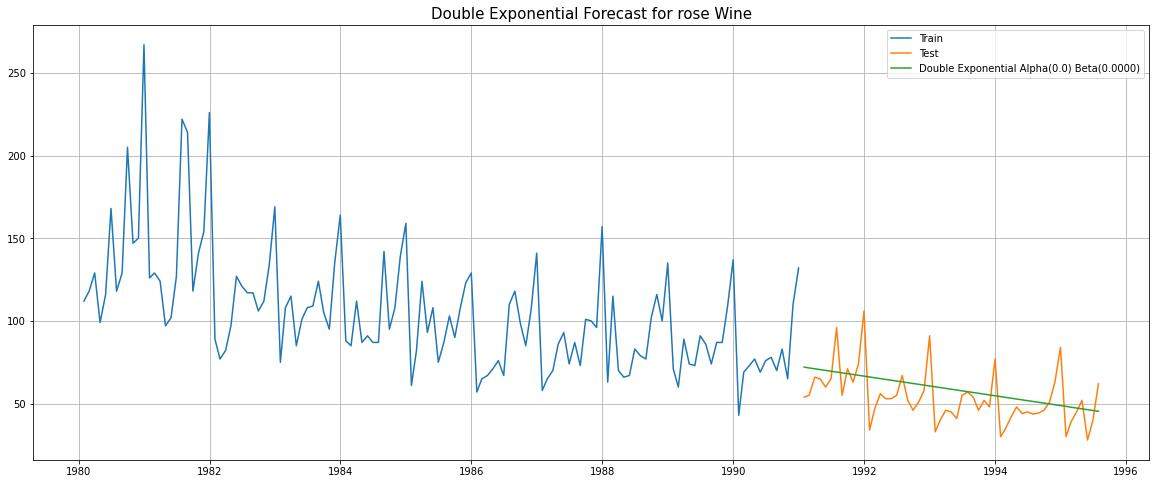

In [182]:
plt.plot(DES_train_rose['Rose'], label='Train')
plt.plot(DES_test_rose['Rose'], label='Test')
plt.plot(predict_des_test_rose, label='Double Exponential Alpha(0.0) Beta(0.0000)')
plt.legend(loc='best')
plt.title("Double Exponential Forecast for rose Wine",fontdict={'fontsize':15})
plt.grid();

In [183]:
rmse_SES_train_rose = metrics.mean_squared_error(train_rose['Rose'],predict_des_train_rose,squared=False)
rmse_SES_test_rose = metrics.mean_squared_error(test_rose['Rose'],predict_des_test_rose,squared=False)
mape_SES_train_rose = MAPE(train_rose['Rose'],predict_des_train_rose)
mape_SES_test_rose = MAPE(test_rose['Rose'],predict_des_test_rose)

In [184]:
result_DES_rose = pd.DataFrame({'TRAIN RMSE':[rmse_SES_train_rose],'TEST RMSE':[rmse_SES_test_rose],
                          'TRAIN MAPE':[mape_SES_train_rose],'TEST MAPE':[mape_SES_test_rose]},index=['Double Exponential Alpha(0.0) Beta(0.0000)'])
result_DES_rose

TRAIN RMSE  TEST RMSE  TRAIN MAPE  \
Double Exponential Alpha(0.0) Beta(0.0000)   30.718136  15.293494       21.22   

                                            TEST MAPE  
Double Exponential Alpha(0.0) Beta(0.0000)      22.95

##### FOR DIFFERENT VALUES OF ALPHA AND BETA

In [185]:
result_des_rose_1 = pd.DataFrame({'ALPHA':[],'BETA':[],'TRAIN RMSE':[],'TEST RMSE':[],'TRAIN MAPE': [],'TEST MAPE':[]})
result_des_rose_1

Empty DataFrame
Columns: [ALPHA, BETA, TRAIN RMSE, TEST RMSE, TRAIN MAPE, TEST MAPE]
Index: []

In [186]:
for i in np.arange(0.01,1,0.01):
    for j in np.arange(0.01,1,0.01):
        model_DES_alpha_i_j = DES_rose.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train_rose['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test_rose['predict',i,j] = model_DES_alpha_i_j.forecast(len(test_rose))
        
        rmse_des_train_rose = metrics.mean_squared_error(DES_train_rose['Rose'],DES_train_rose['predict',i,j],squared=False)
        mape_des_train_rose = MAPE(DES_train_rose['Rose'],DES_train_rose['predict',i,j])
        
        rmse_des_test_rose = metrics.mean_squared_error(DES_test_rose['Rose'],DES_test_rose['predict',i,j],squared=False)
        mape_des_test_rose = MAPE(DES_test_rose['Rose'],DES_test_rose['predict',i,j])
        result_des_rose_1 = result_des_rose_1.append({'ALPHA':i,'BETA':j,
                                                                'TRAIN RMSE':rmse_des_train_rose, 
                                                                'TEST RMSE':rmse_des_test_rose,
                                                                'TRAIN MAPE':mape_des_train_rose,
                                                                'TEST MAPE':mape_des_test_rose}, ignore_index=True)

In [187]:
result_des_rose_1.sort_values('TEST MAPE',ascending=True)

ALPHA  BETA  TRAIN RMSE    TEST RMSE  TRAIN MAPE  TEST MAPE
262    0.03  0.65   41.690382    15.331019       32.12      18.61
343    0.04  0.47   39.202418    14.459763       29.54      18.70
222    0.03  0.25   46.040023    15.022002       33.57      19.50
300    0.04  0.04   63.875724    15.657977       47.36      19.74
137    0.02  0.39   50.749736    16.356856       38.31      20.47
...     ...   ...         ...          ...         ...        ...
6731   0.68  0.99   49.462896  1118.401524       32.88    1835.88
7127   0.72  0.99   50.768198  1118.536981       33.66    1836.73
6830   0.69  0.99   49.781990  1119.168601       33.02    1837.29
7028   0.71  0.99   50.434511  1119.252134       33.42    1837.74
6929   0.70  0.99   50.105819  1119.456723       33.20    1837.92

[9801 rows x 6 columns]

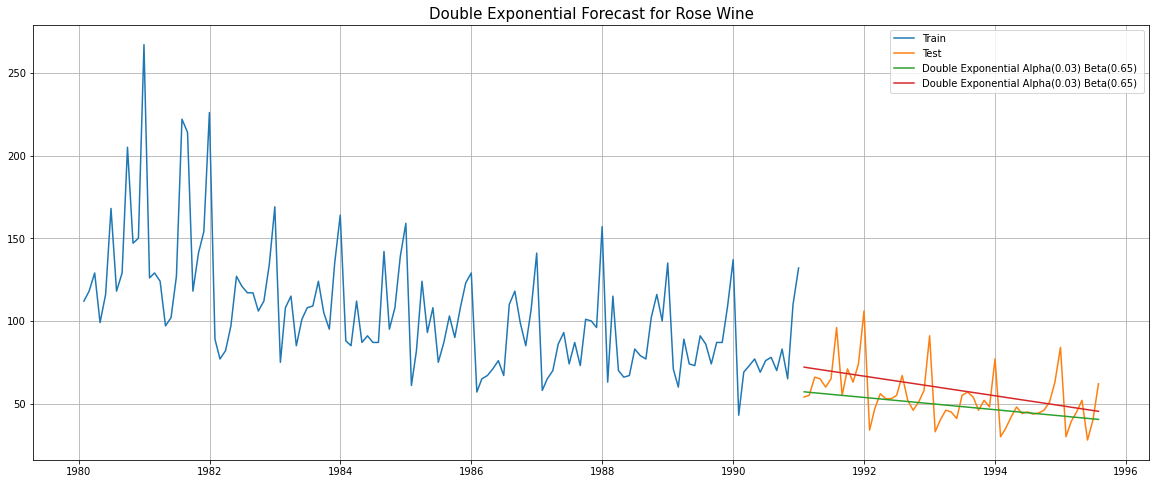

In [188]:
plt.plot(train_rose['Rose'], label='Train')
plt.plot(test_rose['Rose'], label='Test')
plt.plot(DES_test_rose['predict',0.03,0.65], label='Double Exponential Alpha(0.03) Beta(0.65)')
plt.plot(predict_des_test_rose, label='Double Exponential Alpha(0.03) Beta(0.65) ')
plt.legend(loc='best')
plt.title("Double Exponential Forecast for Rose Wine",fontdict={'fontsize':15})
plt.grid();

In [189]:
model_result_des_rose = pd.DataFrame({'TRAIN RMSE':result_des_rose_1['TRAIN RMSE'][262],
                                'TEST RMSE':result_des_rose_1['TEST RMSE'][262],
                                'TRAIN MAPE':result_des_rose_1['TRAIN MAPE'][262],
                                'TEST MAPE':result_des_rose_1['TEST MAPE'][262]},
                               index=['Double Exponential Smoothing Alpha(0.03) Beta(0.65)'])

In [190]:
model_result_des_rose 

TRAIN RMSE  TEST RMSE  \
Double Exponential Smoothing Alpha(0.03) Beta(0...   41.690382  15.331019   

                                                    TRAIN MAPE  TEST MAPE  
Double Exponential Smoothing Alpha(0.03) Beta(0...       32.12      18.61

#### TRIPLE EXPONENTIAL SMOOTHING

***SPARKLING WINE***

In [191]:
TES_train_sparkling = train_sparkling.copy()
TES_test_sparkling = test_sparkling.copy()

In [192]:
TES_sparkling = ExponentialSmoothing(TES_train_sparkling['Sparkling'],seasonal='mul',
                                     initialization_method='estimated',freq='M',trend = 'add')
model_tes_sparkling = TES_sparkling.fit(optimized=True)
model_tes_sparkling.params

{'smoothing_level': 0.11119949831569428,
 'smoothing_trend': 0.049430920023313805,
 'smoothing_seasonal': 0.3620525701498937,
 'damping_trend': nan,
 'initial_level': 2356.5264391986907,
 'initial_trend': -9.443690175376352,
 'initial_seasons': array([0.71325627, 0.68332509, 0.90537798, 0.80561841, 0.65639659,
        0.65451508, 0.88690241, 1.13423953, 0.91927727, 1.21396745,
        1.86941738, 2.3734461 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [193]:
predict_tes_train_sparkling = model_tes_sparkling.fittedvalues

In [194]:
predict_tes_test_sparkling = model_tes_sparkling.forecast(len(test_sparkling))
predict_tes_test_sparkling.head()

1991-01-31    1587.685845
1991-02-28    1356.590237
1991-03-31    1763.121866
1991-04-30    1656.379813
1991-05-31    1542.186697
Freq: M, dtype: float64

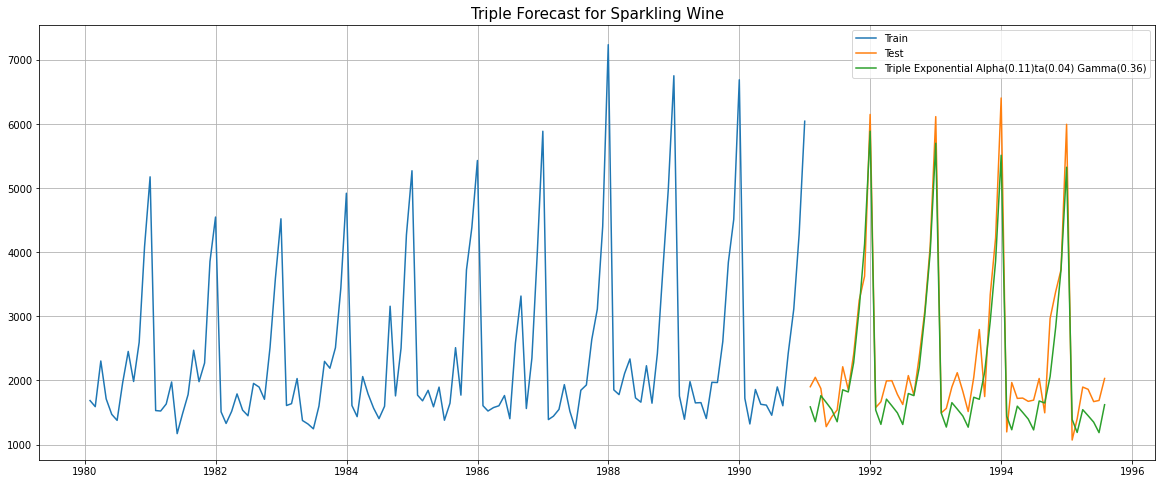

In [195]:
plt.plot(TES_train_sparkling['Sparkling'], label='Train')
plt.plot(TES_test_sparkling['Sparkling'], label='Test')
plt.plot(predict_tes_test_sparkling, label='Triple Exponential Alpha(0.11)ta(0.04) Gamma(0.36)')
plt.legend(loc='best')
plt.title("Triple Forecast for Sparkling Wine",fontdict={'fontsize':15})
plt.grid();

In [196]:
rmse_TES_train_sparkling = metrics.mean_squared_error(train_sparkling['Sparkling'],predict_tes_train_sparkling,squared=False)
rmse_TES_test_sparkling = metrics.mean_squared_error(test_sparkling['Sparkling'],predict_tes_test_sparkling,squared=False)
mape_TES_train_sparkling = MAPE(train_sparkling['Sparkling'],predict_tes_train_sparkling)
mape_TES_test_sparkling = MAPE(test_sparkling['Sparkling'],predict_tes_test_sparkling)

In [197]:
result_TES_sparkling = pd.DataFrame({'TRAIN RMSE':[rmse_TES_train_sparkling],'TEST RMSE':[rmse_TES_test_sparkling],
                          'TRAIN MAPE':[mape_TES_train_sparkling],'TEST MAPE':[mape_TES_test_sparkling]},
                                   index=['Triple Exponential Alpha(0.07)ta(0.000) Gamma(0.39)'])
result_TES_sparkling

TRAIN RMSE   TEST RMSE  \
Triple Exponential Alpha(0.07)ta(0.000) Gamma(0...  355.772448  403.706228   

                                                    TRAIN MAPE  TEST MAPE  
Triple Exponential Alpha(0.07)ta(0.000) Gamma(0...        10.2      13.91

##### FOR DIFFERENT VALUES OF ALPHA AND BETA

In [198]:
result_tes_sparkling_1 = pd.DataFrame({'ALPHA':[],'BETA':[],'GAMMA':[],'TRAIN RMSE':[],'TEST RMSE':[],'TRAIN MAPE': [],'TEST MAPE':[]})
result_tes_sparkling_1

Empty DataFrame
Columns: [ALPHA, BETA, GAMMA, TRAIN RMSE, TEST RMSE, TRAIN MAPE, TEST MAPE]
Index: []

In [199]:
for i in np.arange(0.1,1,0.1):
    for j in np.arange(0.1,1,0.1):
        for k in np.arange(0.1,1,0.1):
            model_TES_alpha_i_j_k = TES_sparkling.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,
                                                  optimized=False,use_brute=True)
            TES_train_sparkling['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test_sparkling['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test_sparkling))
        
            rmse_tes_train_sparkling = metrics.mean_squared_error(TES_train_sparkling['Sparkling'],
                                                                  TES_train_sparkling['predict',i,j,k],squared=False)
            mape_tes_train_sparkling = MAPE(TES_train_sparkling['Sparkling'],TES_train_sparkling['predict',i,j,k])
            rmse_tes_test_sparkling = metrics.mean_squared_error(TES_test_sparkling['Sparkling'],
                                                                 TES_test_sparkling['predict',i,j,k],squared=False)
            mape_tes_test_sparkling = MAPE(TES_test_sparkling['Sparkling'],TES_test_sparkling['predict',i,j,k])
            
            result_tes_sparkling_1 = result_tes_sparkling_1.append({'ALPHA':i,'BETA':j,'GAMMA':k,
                                                  'TRAIN RMSE':rmse_tes_train_sparkling,
                                                  'TEST RMSE':rmse_tes_test_sparkling,
                                                  'TRAIN MAPE':mape_tes_train_sparkling,
                                                  'TEST MAPE':mape_tes_test_sparkling}
                                                 , ignore_index=True)

In [200]:
result_tes_sparkling_1.sort_values('TEST MAPE',ascending=True)

ALPHA  BETA  GAMMA    TRAIN RMSE     TEST RMSE  TRAIN MAPE  TEST MAPE
244    0.4   0.1    0.2  3.844677e+02  3.174343e+02       11.01       9.64
172    0.3   0.2    0.2  3.885441e+02  3.290375e+02       11.11      10.33
162    0.3   0.1    0.1  3.882201e+02  3.370810e+02       11.17      10.36
326    0.5   0.1    0.3  3.965981e+02  3.459134e+02       11.41      10.74
90     0.2   0.2    0.1  3.984825e+02  3.401865e+02       11.31      10.77
..     ...   ...    ...           ...           ...         ...        ...
726    0.9   0.9    0.7  2.024468e+05  3.771337e+06     1638.16   77147.40
727    0.9   0.9    0.8  2.915611e+04  6.947686e+06      455.34   80654.57
305    0.4   0.7    0.9  1.569689e+06  7.183003e+06     5736.22   82595.88
646    0.8   0.9    0.8  1.894002e+06  9.023204e+06     8398.25  129256.11
692    0.9   0.5    0.9  6.346125e+03  7.893556e+06      104.20  180882.84

[729 rows x 7 columns]

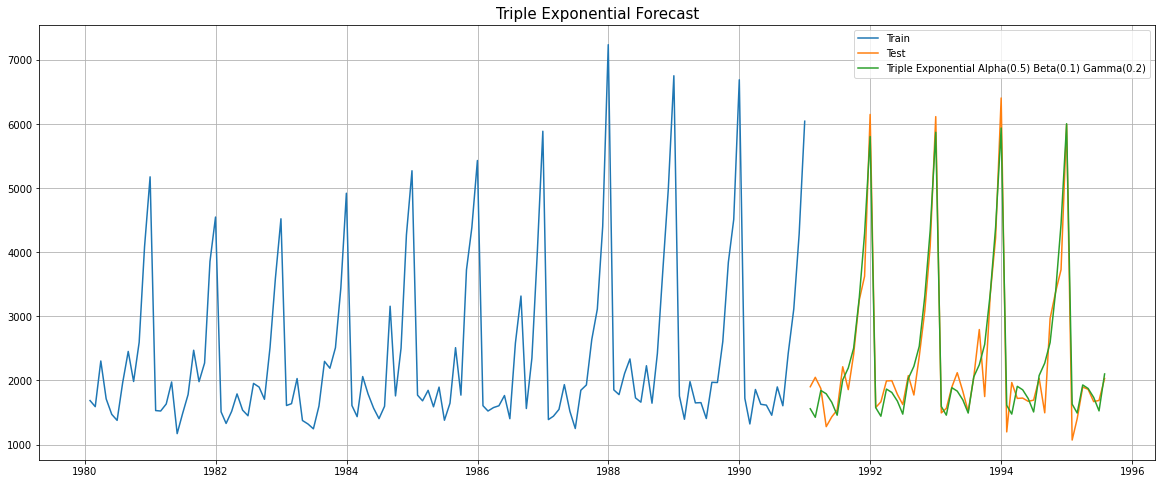

In [203]:
plt.plot(train_sparkling['Sparkling'], label='Train')
plt.plot(test_sparkling['Sparkling'], label='Test')
plt.plot(TES_test_sparkling['predict',0.4,0.1,0.2], label='Triple Exponential Alpha(0.5) Beta(0.1) Gamma(0.2)')
plt.legend(loc='best')
plt.title("Triple Exponential Forecast",fontdict={'fontsize':15})
plt.grid();

In [204]:
model_result_tes_sparkling = pd.DataFrame({'TRAIN RMSE':result_tes_sparkling_1['TRAIN RMSE'][244],
                                'TEST RMSE':result_tes_sparkling_1['TEST RMSE'][244],
                                'TRAIN MAPE':result_tes_sparkling_1['TRAIN MAPE'][244],
                                'TEST MAPE':result_tes_sparkling_1['TEST MAPE'][244]},
                               index=['Triple Exponential Alpha(0.5) Beta(0.1) Gamma(0.2)'])

In [205]:
model_result_tes_sparkling

TRAIN RMSE   TEST RMSE  \
Triple Exponential Alpha(0.5) Beta(0.1) Gamma(0.2)  384.467709  317.434302   

                                                    TRAIN MAPE  TEST MAPE  
Triple Exponential Alpha(0.5) Beta(0.1) Gamma(0.2)       11.01       9.64

***ROSE WINE***

In [206]:
TES_train_rose = train_rose.copy()
TES_test_rose = test_rose.copy()

In [213]:
TES_rose = ExponentialSmoothing(TES_train_rose['Rose'],
                                seasonal='add',trend='additive',freq='M',initialization_method='estimated')
model_tes_rose = TES_rose.fit(optimized=True)
model_tes_rose.params

{'smoothing_level': 0.08491574907842013,
 'smoothing_trend': 5.5205494088745035e-06,
 'smoothing_seasonal': 0.0005477182208247348,
 'damping_trend': nan,
 'initial_level': 147.05898703809248,
 'initial_trend': -0.5496981430927392,
 'initial_seasons': array([-31.16021285, -18.81317648, -10.81406896, -21.41413199,
        -12.6036696 ,  -7.23553106,   2.76744902,   8.85548059,
          4.83969803,   2.95125217,  21.07934859,  63.31472515]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [214]:
predict_tes_train_rose = model_tes_rose.fittedvalues

In [215]:
predict_tes_test_rose = model_tes_rose.forecast(len(test_rose))
predict_tes_test_rose.head()

1991-01-31    42.574560
1991-02-28    54.372099
1991-03-31    61.821511
1991-04-30    50.671639
1991-05-31    58.932400
Freq: M, dtype: float64

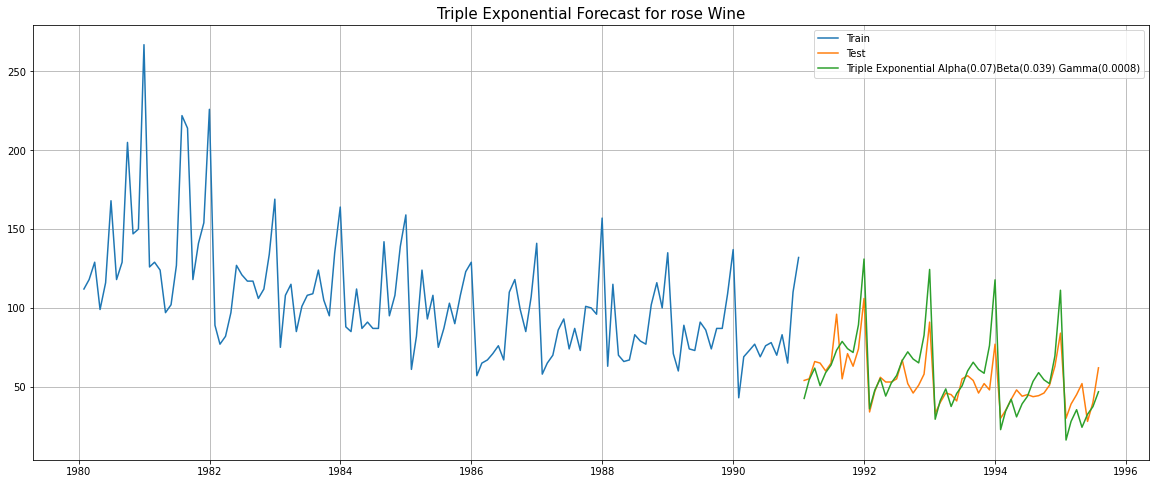

In [216]:
plt.plot(TES_train_rose['Rose'], label='Train')
plt.plot(TES_test_rose['Rose'], label='Test')
plt.plot(predict_tes_test_rose, label='Triple Exponential Alpha(0.08)Beta(5.52) Gamma(0.0005)')
plt.legend(loc='best')
plt.title("Triple Exponential Forecast for rose Wine",fontdict={'fontsize':15})
plt.grid();

In [217]:
rmse_TES_train_rose = metrics.mean_squared_error(train_rose['Rose'],predict_tes_train_rose,squared=False)
rmse_TES_test_rose = metrics.mean_squared_error(test_rose['Rose'],predict_tes_test_rose,squared=False)
mape_TES_train_rose = MAPE(train_rose['Rose'],predict_tes_train_rose)
mape_TES_test_rose = MAPE(test_rose['Rose'],predict_tes_test_rose)

In [219]:
result_TES_rose = pd.DataFrame({'TRAIN RMSE':[rmse_TES_train_rose],'TEST RMSE':[rmse_TES_test_rose],
                          'TRAIN MAPE':[mape_TES_train_rose],'TEST MAPE':[mape_TES_test_rose]},
                              index=['Triple Exponential Alpha(0.08)Beta(5.52) Gamma(0.0005)'])
result_TES_rose

TRAIN RMSE  TEST RMSE  \
Triple Exponential Alpha(0.08)Beta(5.52) Gamma(...   19.481004  14.285684   

                                                    TRAIN MAPE  TEST MAPE  
Triple Exponential Alpha(0.08)Beta(5.52) Gamma(...       13.29      19.37

***----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------***

***----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------***

##### FOR DIFFERENT VALUES OF ALPHA AND BETA

In [220]:
result_tes_rose_1 = pd.DataFrame({'ALPHA':[],'BETA':[],'GAMMA':[],'TRAIN RMSE':[],'TEST RMSE':[],'TRAIN MAPE': [],'TEST MAPE':[]})
result_tes_rose_1

Empty DataFrame
Columns: [ALPHA, BETA, GAMMA, TRAIN RMSE, TEST RMSE, TRAIN MAPE, TEST MAPE]
Index: []

In [223]:
for i in np.arange(0.1,1,0.1):
    for j in np.arange(0.1,1,0.1):
        for k in np.arange(0.1,1,0.1):
            TES_rose = ExponentialSmoothing(TES_train_rose['Rose'],
                                seasonal='mul',trend='additive',freq='M',initialization_method='estimated')
            model_TES_alpha_i_j_k = TES_rose.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,
                                                  optimized=False,use_brute=True)
            TES_train_rose['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test_rose['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test_rose))
        
            rmse_tes_train_rose = metrics.mean_squared_error(TES_train_rose['Rose'],
                                                                  TES_train_rose['predict',i,j,k],squared=False)
            mape_tes_train_rose = MAPE(TES_train_rose['Rose'],TES_train_rose['predict',i,j,k])
            rmse_tes_test_rose = metrics.mean_squared_error(TES_test_rose['Rose'],
                                                                 TES_test_rose['predict',i,j,k],squared=False)
            mape_tes_test_rose = MAPE(TES_test_rose['Rose'],TES_test_rose['predict',i,j,k])
            
            result_tes_rose_1 = result_tes_rose_1.append({'ALPHA':i,'BETA':j,'GAMMA':k,
                                                  'TRAIN RMSE':rmse_tes_train_rose,
                                                  'TEST RMSE':rmse_tes_test_rose,
                                                  'TRAIN MAPE':mape_tes_train_rose,
                                                  'TEST MAPE':mape_tes_test_rose}
                                                 , ignore_index=True)

In [224]:
result_tes_rose_1.sort_values('TEST MAPE',ascending=True)

ALPHA  BETA  GAMMA    TRAIN RMSE     TEST RMSE  TRAIN MAPE  TEST MAPE
921     0.3   0.4    0.4     25.599445  1.034708e+01       17.89      13.30
856     0.2   0.6    0.2     23.129850  9.555717e+00       17.33      13.32
738     0.1   0.2    0.1     19.770392  9.263811e+00       14.44      13.54
912     0.3   0.3    0.4     24.588120  1.015422e+01       17.28      13.54
739     0.1   0.2    0.2     20.253487  9.527948e+00       14.71      13.82
...     ...   ...    ...           ...           ...         ...        ...
872     0.2   0.7    0.9   4040.923644  1.957747e+05      523.63  107960.37
727     0.9   0.9    0.8   2025.875258  6.826599e+04     1047.12  110928.67
1195    0.6   0.7    0.8    200.708579  2.555513e+05       79.22  206024.57
728     0.9   0.9    0.9   6157.979326  1.965171e+05     2828.43  318700.14
888     0.2   0.9    0.7  31453.789450  1.079274e+06     3948.01  718408.55

[1458 rows x 7 columns]

In [225]:
model_tes_rose = TES_rose.fit(smoothing_level=0.3,smoothing_trend=0.4,smoothing_seasonal=0.4,
                                                  optimized=False,use_brute=True)
TES_test_rose_prediction = model_tes_rose.forecast(steps=len(test_rose))

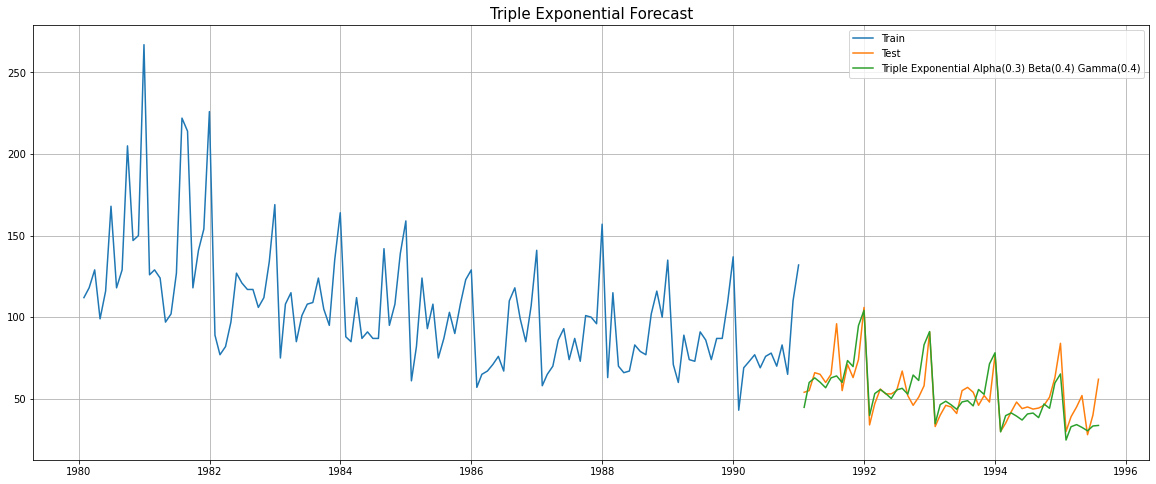

In [226]:
plt.plot(train_rose['Rose'], label='Train')
plt.plot(test_rose['Rose'], label='Test')
plt.plot(TES_test_rose_prediction, label='Triple Exponential Alpha(0.3) Beta(0.4) Gamma(0.4)')
plt.legend(loc='best')
plt.title("Triple Exponential Forecast",fontdict={'fontsize':15})
plt.grid();

In [228]:
model_result_tes_rose = pd.DataFrame({'TRAIN RMSE':result_tes_rose_1['TRAIN RMSE'][921],
                                'TEST RMSE':result_tes_rose_1['TEST RMSE'][921],
                                'TRAIN MAPE':result_tes_rose_1['TRAIN MAPE'][921],
                                'TEST MAPE':result_tes_rose_1['TEST MAPE'][921]},
                               index=['Triple Exponential Smoothing Alpha(0.3) Beta(0.4) Gamma(0.4)'])
model_result_tes_rose

TRAIN RMSE  TEST RMSE  \
Triple Exponential Smoothing Alpha(0.3) Beta(0....   25.599445  10.347078   

                                                    TRAIN MAPE  TEST MAPE  
Triple Exponential Smoothing Alpha(0.3) Beta(0....       17.89       13.3

In [229]:
sparkling_model_result= pd.concat([sparkling_model_result,result_SES,model_result_ses_sparkling,
                                   result_DES_sparkling,model_result_des_sparkling,
                                   result_TES_sparkling,model_result_tes_sparkling])

In [230]:
sparkling_model_result

TRAIN RMSE    TEST RMSE  \
Regression On Time                                  1279.322346  1389.135175   
Naive Forecast                                      3867.700802  3864.279352   
Simple Average                                      1298.483628  1275.081804   
2pointTrailingMovingAverage                                 NaN   813.400684   
4pointTrailingMovingAverage                                 NaN  1156.589694   
6pointTrailingMovingAverage                                 NaN  1156.589694   
9pointTrailingMovingAverage                                 NaN  1346.278315   
Simple Exponential Alpha(0.070)                     1322.897875  1338.004623   
Single Exponential Smoothing Alpha(0.01)            1397.988872  1286.648058   
Double Exponential Alpha(0.66) Beta(0.0001)         1339.500882  5291.879833   
Double Exponential Smoothing Alpha(0.02) Beta(0...  1367.007307  1498.738766   
Triple Exponential Alpha(0.07)ta(0.000) Gamma(0...   355.772448   403.706228   
Triple Exponential Alpha(0.5) Beta(0.1) Gamma(0.2)   384.467709   317.434302   

                                                    TRAIN MAPE  TEST MAPE  
Regression On Time                                       40.05      50.15  
Naive Forecast                                          153.17     152.87  
Simple Average                                           40.36      38.90  
2pointTrailingMovingAverage                                NaN      19.70  
4pointTrailingMovingAverage                                NaN      35.96  
6pointTrailingMovingAverage                                NaN      43.86  
9pointTrailingMovingAverage                                NaN      46.86  
Simple Exponential Alpha(0.070)                          40.95      47.11  
Single Exponential Smoothing Alpha(0.01)                 35.69      35.78  
Double Exponential Alpha(0.66) Beta(0.0001)              38.82     208.74  
Double Exponential Smoothing Alpha(0.02) Beta(0...       45.10      55.31  
Triple Exponential Alpha(0.07)ta(0.000) Gamma(0...       10.20      13.91  
Triple Exponential Alpha(0.5) Beta(0.1) Gamma(0.2)       11.01       9.64

In [231]:
rose_model_result=pd.concat([rose_model_result,result_SES_rose,model_result_ses_rose,
                            result_DES_rose,model_result_des_rose,result_TES_rose,
                            model_result_tes_rose])
rose_model_result

TRAIN RMSE  TEST RMSE  \
Regression On Time                                   30.718135  15.291460   
Naive Forecast                                       45.063760  79.778066   
Simple Average                                       36.034234  53.521557   
2pointTrailingMovingAverage                                NaN  11.530180   
4pointTrailingMovingAverage                                NaN  14.462330   
6pointTrailingMovingAverage                                NaN  14.462330   
9pointTrailingMovingAverage                                NaN  14.740112   
Simple Exponential Alpha(0.098)                      31.500869  36.858569   
Single Exponential Smoothing Alpha(0.07)             32.649443  36.497370   
Double Exponential Alpha(0.0) Beta(0.0000)           30.718136  15.293494   
Double Exponential Smoothing Alpha(0.03) Beta(0...   41.690382  15.331019   
Triple Exponential Alpha(0.08)Beta(5.52) Gamma(...   19.481004  14.285684   
Triple Exponential Smoothing Alpha(0.3) Beta(0....   25.599445  10.347078   

                                                    TRAIN MAPE  TEST MAPE  
Regression On Time                                       21.22      22.94  
Naive Forecast                                           36.38     145.35  
Simple Average                                           25.39      95.13  
2pointTrailingMovingAverage                                NaN      13.60  
4pointTrailingMovingAverage                                NaN      19.59  
6pointTrailingMovingAverage                                NaN      20.83  
9pointTrailingMovingAverage                                NaN      21.13  
Simple Exponential Alpha(0.098)                          22.73      64.05  
Single Exponential Smoothing Alpha(0.07)                 63.38      63.38  
Double Exponential Alpha(0.0) Beta(0.0000)               21.22      22.95  
Double Exponential Smoothing Alpha(0.03) Beta(0...       32.12      18.61  
Triple Exponential Alpha(0.08)Beta(5.52) Gamma(...       13.29      19.37  
Triple Exponential Smoothing Alpha(0.3) Beta(0....       17.89      13.30

#### Q.5-Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

***CHECKING STATIONARITY ON TRAIN DATA***

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

In [232]:
from statsmodels.tsa.stattools import adfuller

In [233]:
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()
    
    org = plt.plot(timeseries,label='Orignal',color='blue')
    mean = plt.plot(rolmean,color='Red',label='Rolling Mean')
    std = plt.plot(rolstd,color='black',label='Rolling Standard Deviation')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard deviation')
    plt.show();
    
    print("Dicky Fuller test Result")
    dftest=adfuller(timeseries,autolag='AIC')
    output= pd.Series(dftest[0:4],index=['T-stat value','p-value','Lags Used','Number of observation used'])
    print(output)

In [234]:
test_stationarity(train_sparkling['Sparkling'])

Dicky Fuller test Result
T-stat value                   -1.208926
p-value                         0.669744
Lags Used                      12.000000
Number of observation used    119.000000
dtype: float64


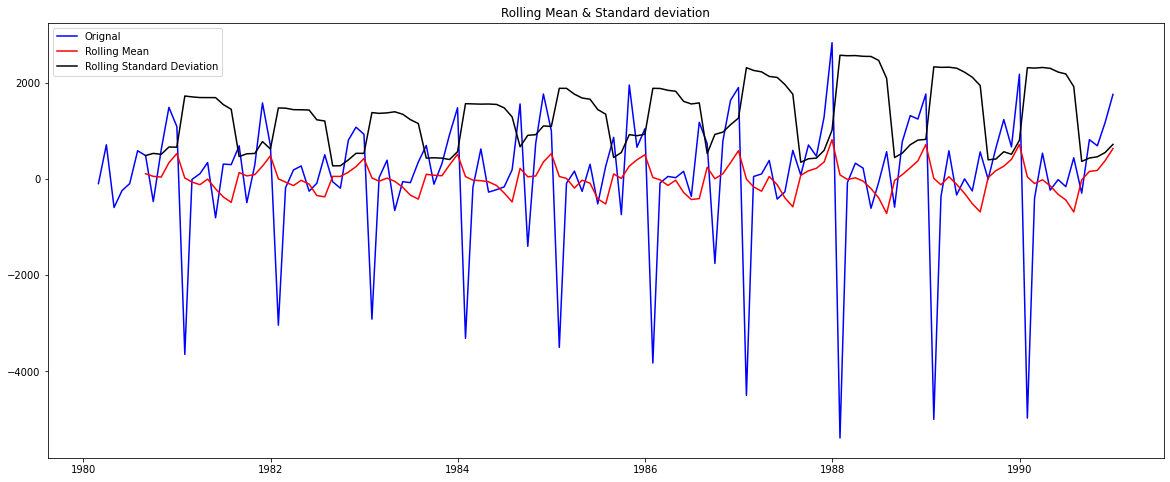

Dicky Fuller test Result
T-stat value                 -8.005007e+00
p-value                       2.280104e-12
Lags Used                     1.100000e+01
Number of observation used    1.190000e+02
dtype: float64


In [235]:
test_stationarity(train_sparkling['Sparkling'].diff().dropna())

***ROSE WINE***

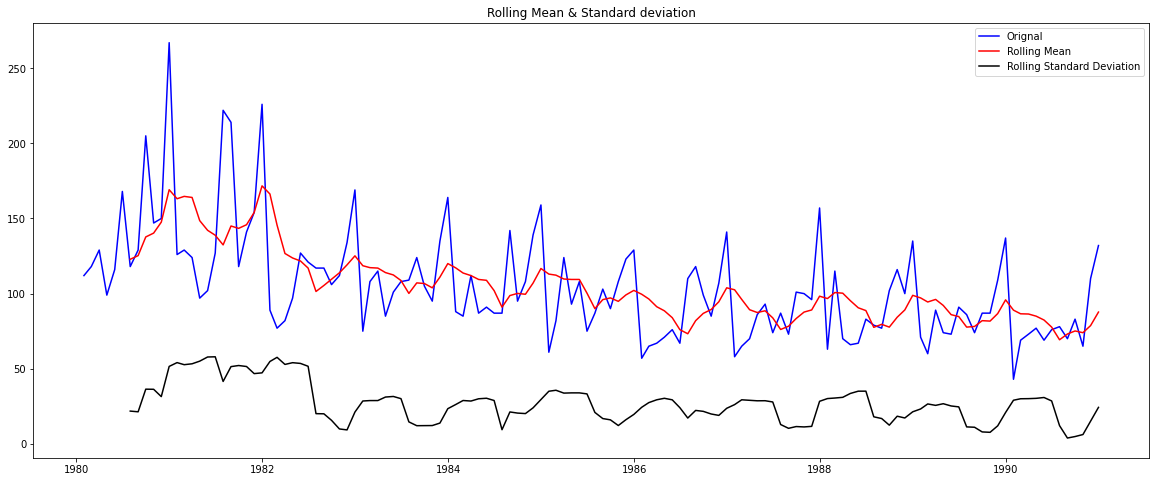

Dicky Fuller test Result
T-stat value                   -2.164250
p-value                         0.219476
Lags Used                      13.000000
Number of observation used    118.000000
dtype: float64


In [236]:
test_stationarity(train_rose['Rose'])

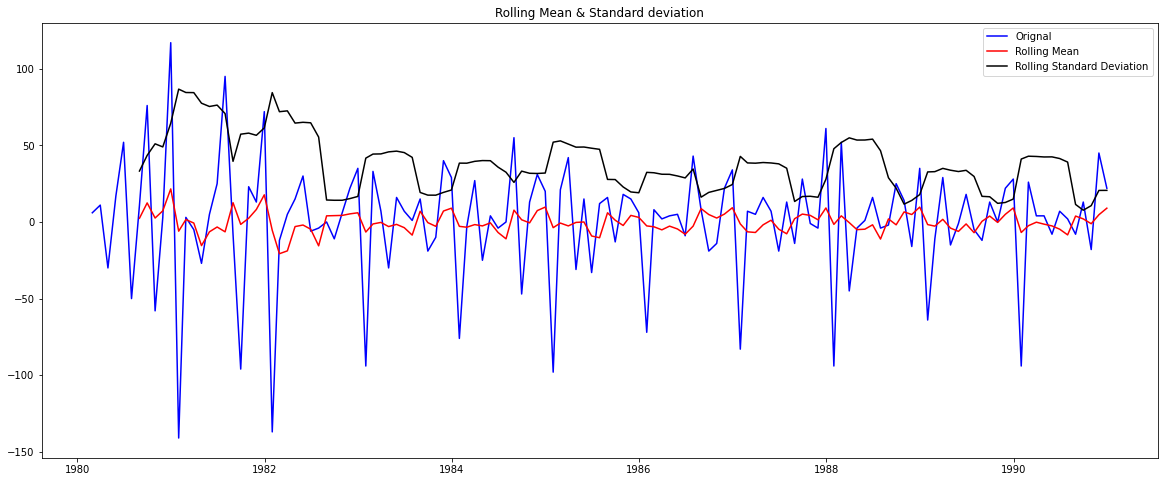

Dicky Fuller test Result
T-stat value                 -6.592372e+00
p-value                       7.061944e-09
Lags Used                     1.200000e+01
Number of observation used    1.180000e+02
dtype: float64


In [237]:
test_stationarity(train_rose['Rose'].diff().dropna())

#### Q-6.Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE

#### ARIMA MODEL

In [238]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import itertools

In [239]:
import statsmodels

***SPARKLING WINE***

In [240]:
p = q = range(0,4)
d= range(1,2)
pdq = list(itertools.product(p,d,q))
for i in range(0,len(pdq)):
    print('Model :',pdq[i])

Model : (0, 1, 0)
Model : (0, 1, 1)
Model : (0, 1, 2)
Model : (0, 1, 3)
Model : (1, 1, 0)
Model : (1, 1, 1)
Model : (1, 1, 2)
Model : (1, 1, 3)
Model : (2, 1, 0)
Model : (2, 1, 1)
Model : (2, 1, 2)
Model : (2, 1, 3)
Model : (3, 1, 0)
Model : (3, 1, 1)
Model : (3, 1, 2)
Model : (3, 1, 3)


In [241]:
Auto_Arima_AIC_sparkling = pd.DataFrame(columns=['ARIMA MODEL','AIC VALUE'])

In [242]:
for param in pdq:
    Auto_Arima_model_sparkling = statsmodels.tsa.arima.model.ARIMA(train_sparkling['Sparkling'].values,order=param).fit()
    print('ARIMA MODEL : {} --------  AIC VALUE : {}'.format(param,Auto_Arima_model_sparkling.aic))
    Auto_Arima_AIC_sparkling = Auto_Arima_AIC_sparkling.append({'ARIMA MODEL': param ,
                                                                'AIC VALUE' : Auto_Arima_model_sparkling.aic}
                                                               ,ignore_index=True)

ARIMA MODEL : (0, 1, 0) --------  AIC VALUE : 2267.6630357855465
ARIMA MODEL : (0, 1, 1) --------  AIC VALUE : 2263.060015591336
ARIMA MODEL : (0, 1, 2) --------  AIC VALUE : 2234.4083231238383
ARIMA MODEL : (0, 1, 3) --------  AIC VALUE : 2233.9948577518107
ARIMA MODEL : (1, 1, 0) --------  AIC VALUE : 2266.6085393190087
ARIMA MODEL : (1, 1, 1) --------  AIC VALUE : 2235.755094678081


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA MODEL : (1, 1, 2) --------  AIC VALUE : 2234.5272004528006
ARIMA MODEL : (1, 1, 3) --------  AIC VALUE : 2235.607815235513
ARIMA MODEL : (2, 1, 0) --------  AIC VALUE : 2260.36574396809
ARIMA MODEL : (2, 1, 1) --------  AIC VALUE : 2233.7776263108312
ARIMA MODEL : (2, 1, 2) --------  AIC VALUE : 2213.5092124003604


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA MODEL : (2, 1, 3) --------  AIC VALUE : 2232.8904614629228
ARIMA MODEL : (3, 1, 0) --------  AIC VALUE : 2257.72337899794
ARIMA MODEL : (3, 1, 1) --------  AIC VALUE : 2235.4986052031873


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA MODEL : (3, 1, 2) --------  AIC VALUE : 2230.759495879124
ARIMA MODEL : (3, 1, 3) --------  AIC VALUE : 2221.459263352943


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [243]:
Auto_Arima_AIC_sparkling.sort_values('AIC VALUE',ascending=True)

ARIMA MODEL    AIC VALUE
10   (2, 1, 2)  2213.509212
15   (3, 1, 3)  2221.459263
14   (3, 1, 2)  2230.759496
11   (2, 1, 3)  2232.890461
9    (2, 1, 1)  2233.777626
3    (0, 1, 3)  2233.994858
2    (0, 1, 2)  2234.408323
6    (1, 1, 2)  2234.527200
13   (3, 1, 1)  2235.498605
7    (1, 1, 3)  2235.607815
5    (1, 1, 1)  2235.755095
12   (3, 1, 0)  2257.723379
8    (2, 1, 0)  2260.365744
1    (0, 1, 1)  2263.060016
4    (1, 1, 0)  2266.608539
0    (0, 1, 0)  2267.663036

after using Auto - Arima we can check that (p,d,q) value with lowest AIC values is (2,1,2), So building the final model with these parameters.

In [244]:
Final_autoarima_sparkling = ARIMA(train_sparkling['Sparkling'].values,order=(2,1,2)).fit()
print(Final_autoarima_sparkling.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Tue, 22 Feb 2022   AIC                           2213.509
Time:                        20:35:50   BIC                           2227.885
Sample:                             0   HQIC                          2219.351
                                - 132                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.782      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.741      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.217      0.0

##### Predicting on test data

In [245]:
autoarima_predict_sparkling = Final_autoarima_sparkling.forecast(steps=len(test_sparkling))
autoarima_predict_sparkling

array([4252.33738615, 2863.08949112, 2043.98482956, 1746.22439695,
       1813.64778153, 2068.64871918, 2365.52782455, 2612.44536548,
       2770.3860084 , 2839.52249679, 2841.90235701, 2806.35767046,
       2758.38823747, 2715.32702104, 2685.65493669, 2670.8057007 ,
       2667.91721358, 2672.43223443, 2679.97192176, 2687.33958792,
       2692.78987967, 2695.82058231, 2696.74889465, 2696.27189866,
       2695.1268339 , 2693.89116624, 2692.91026186, 2692.3143072 ,
       2692.080961  , 2692.10809722, 2692.27421093, 2692.47699273,
       2692.65015833, 2692.76395622, 2692.81642144, 2692.82161539,
       2692.79908717, 2692.76662282, 2692.73662595, 2692.71542384,
       2692.70438136, 2692.70175057, 2692.70447464, 2692.70952029,
       2692.71461716, 2692.71848282, 2692.72070436, 2692.72145722,
       2692.72120257, 2692.72044738, 2692.71959892, 2692.71890801,
       2692.718476  , 2692.71829557, 2692.71830046])

In [246]:
rmse_auto_arima_sparkling = metrics.mean_squared_error(test_sparkling['Sparkling'],autoarima_predict_sparkling,
                                                       squared=False)
rmse_auto_arima_sparkling

1299.9800837187054

In [247]:
mape_autoarima_sparkling = MAPE(test_sparkling['Sparkling'],autoarima_predict_sparkling)
mape_autoarima_sparkling

43.2

In [248]:
Final_autoarima_sparkling.plot_diagnostics();

In [249]:
auto_arima_result = pd.DataFrame({'TEST RMSE':rmse_auto_arima_sparkling,'TEST MAPE': mape_autoarima_sparkling},
                                index = ['Auto Arima (2,1,2)'])
auto_arima_result

TEST RMSE  TEST MAPE
Auto Arima (2,1,2)  1299.980084       43.2

In [250]:
sparkling_model_result = pd.concat([sparkling_model_result,auto_arima_result])
sparkling_model_result

TRAIN RMSE    TEST RMSE  \
Regression On Time                                  1279.322346  1389.135175   
Naive Forecast                                      3867.700802  3864.279352   
Simple Average                                      1298.483628  1275.081804   
2pointTrailingMovingAverage                                 NaN   813.400684   
4pointTrailingMovingAverage                                 NaN  1156.589694   
6pointTrailingMovingAverage                                 NaN  1156.589694   
9pointTrailingMovingAverage                                 NaN  1346.278315   
Simple Exponential Alpha(0.070)                     1322.897875  1338.004623   
Single Exponential Smoothing Alpha(0.01)            1397.988872  1286.648058   
Double Exponential Alpha(0.66) Beta(0.0001)         1339.500882  5291.879833   
Double Exponential Smoothing Alpha(0.02) Beta(0...  1367.007307  1498.738766   
Triple Exponential Alpha(0.07)ta(0.000) Gamma(0...   355.772448   403.706228   
Triple Exponential Alpha(0.5) Beta(0.1) Gamma(0.2)   384.467709   317.434302   
Auto Arima (2,1,2)                                          NaN  1299.980084   

                                                    TRAIN MAPE  TEST MAPE  
Regression On Time                                       40.05      50.15  
Naive Forecast                                          153.17     152.87  
Simple Average                                           40.36      38.90  
2pointTrailingMovingAverage                                NaN      19.70  
4pointTrailingMovingAverage                                NaN      35.96  
6pointTrailingMovingAverage                                NaN      43.86  
9pointTrailingMovingAverage                                NaN      46.86  
Simple Exponential Alpha(0.070)                          40.95      47.11  
Single Exponential Smoothing Alpha(0.01)                 35.69      35.78  
Double Exponential Alpha(0.66) Beta(0.0001)              38.82     208.74  
Double Exponential Smoothing Alpha(0.02) Beta(0...       45.10      55.31  
Triple Exponential Alpha(0.07)ta(0.000) Gamma(0...       10.20      13.91  
Triple Exponential Alpha(0.5) Beta(0.1) Gamma(0.2)       11.01       9.64  
Auto Arima (2,1,2)                                         NaN      43.20

#### SARIMA MODEL


In [251]:
p = q = range(0,4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p,d,q))
PDQ = [(x[0],x[1],x[2],12) for x in list(itertools.product(p,D,q))]
for i in range(1,len(pdq)):
    print('Model : {}{}'.format(pdq[i],PDQ[i]))

Model : (0, 1, 1)(0, 0, 1, 12)
Model : (0, 1, 2)(0, 0, 2, 12)
Model : (0, 1, 3)(0, 0, 3, 12)
Model : (1, 1, 0)(1, 0, 0, 12)
Model : (1, 1, 1)(1, 0, 1, 12)
Model : (1, 1, 2)(1, 0, 2, 12)
Model : (1, 1, 3)(1, 0, 3, 12)
Model : (2, 1, 0)(2, 0, 0, 12)
Model : (2, 1, 1)(2, 0, 1, 12)
Model : (2, 1, 2)(2, 0, 2, 12)
Model : (2, 1, 3)(2, 0, 3, 12)
Model : (3, 1, 0)(3, 0, 0, 12)
Model : (3, 1, 1)(3, 0, 1, 12)
Model : (3, 1, 2)(3, 0, 2, 12)
Model : (3, 1, 3)(3, 0, 3, 12)


In [252]:
Auto_sarima_Aic = pd.DataFrame(columns=['SARIMA PARAM','SARIMA SEASONAL','AIC VALUE'])

In [253]:
for param in pdq:
    for seasonal_param in PDQ:
        sarima_model = sm.tsa.statespace.SARIMAX(train_sparkling['Sparkling'].values,order=param,
                                                seasonal_order=seasonal_param,
                                                enforce_invertibility=False,
                                                enforce_stationarity=False)
        Autosarima_sparkling = sarima_model.fit(maxiter=1000)
        print('SARIMA MODEL :{}X{} ------ AIC VALUE :{}'.format(param,seasonal_param,Autosarima_sparkling.aic))
        Auto_sarima_Aic = Auto_sarima_Aic.append({'SARIMA PARAM':param,'SARIMA SEASONAL':seasonal_param,
                                                 'AIC VALUE':Autosarima_sparkling.aic},ignore_index=True)
        

SARIMA MODEL :(0, 1, 0)X(0, 0, 0, 12) ------ AIC VALUE :2251.3597196862966
SARIMA MODEL :(0, 1, 0)X(0, 0, 1, 12) ------ AIC VALUE :1956.2614616847052
SARIMA MODEL :(0, 1, 0)X(0, 0, 2, 12) ------ AIC VALUE :1723.1533640233692


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(0, 1, 0)X(0, 0, 3, 12) ------ AIC VALUE :3524.4834934841783
SARIMA MODEL :(0, 1, 0)X(1, 0, 0, 12) ------ AIC VALUE :1837.4366022456675
SARIMA MODEL :(0, 1, 0)X(1, 0, 1, 12) ------ AIC VALUE :1806.9905301388558
SARIMA MODEL :(0, 1, 0)X(1, 0, 2, 12) ------ AIC VALUE :1633.21087357916


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(0, 1, 0)X(1, 0, 3, 12) ------ AIC VALUE :3435.7209934841926
SARIMA MODEL :(0, 1, 0)X(2, 0, 0, 12) ------ AIC VALUE :1648.3776153470858
SARIMA MODEL :(0, 1, 0)X(2, 0, 1, 12) ------ AIC VALUE :1647.20541586036
SARIMA MODEL :(0, 1, 0)X(2, 0, 2, 12) ------ AIC VALUE :1630.9898053920842


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(0, 1, 0)X(2, 0, 3, 12) ------ AIC VALUE :3234.1615969923973
SARIMA MODEL :(0, 1, 0)X(3, 0, 0, 12) ------ AIC VALUE :1467.4574095308406
SARIMA MODEL :(0, 1, 0)X(3, 0, 1, 12) ------ AIC VALUE :1469.1871052625627
SARIMA MODEL :(0, 1, 0)X(3, 0, 2, 12) ------ AIC VALUE :1471.0594530065969


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(0, 1, 0)X(3, 0, 3, 12) ------ AIC VALUE :3249.4192590208495
SARIMA MODEL :(0, 1, 1)X(0, 0, 0, 12) ------ AIC VALUE :2230.162907850584
SARIMA MODEL :(0, 1, 1)X(0, 0, 1, 12) ------ AIC VALUE :1923.7688649566444
SARIMA MODEL :(0, 1, 1)X(0, 0, 2, 12) ------ AIC VALUE :1692.7089573077885


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(0, 1, 1)X(0, 0, 3, 12) ------ AIC VALUE :3277.213601583139
SARIMA MODEL :(0, 1, 1)X(1, 0, 0, 12) ------ AIC VALUE :1797.179588183819
SARIMA MODEL :(0, 1, 1)X(1, 0, 1, 12) ------ AIC VALUE :1738.0903193777378
SARIMA MODEL :(0, 1, 1)X(1, 0, 2, 12) ------ AIC VALUE :1570.1319653962369


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(0, 1, 1)X(1, 0, 3, 12) ------ AIC VALUE :3326.2050734126556
SARIMA MODEL :(0, 1, 1)X(2, 0, 0, 12) ------ AIC VALUE :1605.6751954178403
SARIMA MODEL :(0, 1, 1)X(2, 0, 1, 12) ------ AIC VALUE :1599.2245090293736
SARIMA MODEL :(0, 1, 1)X(2, 0, 2, 12) ------ AIC VALUE :1570.3683738949353


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(0, 1, 1)X(2, 0, 3, 12) ------ AIC VALUE :3057.3683629442967
SARIMA MODEL :(0, 1, 1)X(3, 0, 0, 12) ------ AIC VALUE :1428.4607679618566
SARIMA MODEL :(0, 1, 1)X(3, 0, 1, 12) ------ AIC VALUE :1428.8727991341655
SARIMA MODEL :(0, 1, 1)X(3, 0, 2, 12) ------ AIC VALUE :1429.5891875863479


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(0, 1, 1)X(3, 0, 3, 12) ------ AIC VALUE :2932.3468041785977
SARIMA MODEL :(0, 1, 2)X(0, 0, 0, 12) ------ AIC VALUE :2187.4410101687117
SARIMA MODEL :(0, 1, 2)X(0, 0, 1, 12) ------ AIC VALUE :1887.9128007201546
SARIMA MODEL :(0, 1, 2)X(0, 0, 2, 12) ------ AIC VALUE :1659.8789890447224


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(0, 1, 2)X(0, 0, 3, 12) ------ AIC VALUE :3890.0981106684694
SARIMA MODEL :(0, 1, 2)X(1, 0, 0, 12) ------ AIC VALUE :1790.032633226848
SARIMA MODEL :(0, 1, 2)X(1, 0, 1, 12) ------ AIC VALUE :1724.1675070827825
SARIMA MODEL :(0, 1, 2)X(1, 0, 2, 12) ------ AIC VALUE :1557.1605068275535


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(0, 1, 2)X(1, 0, 3, 12) ------ AIC VALUE :3935.677773175379
SARIMA MODEL :(0, 1, 2)X(2, 0, 0, 12) ------ AIC VALUE :1603.9654774514668
SARIMA MODEL :(0, 1, 2)X(2, 0, 1, 12) ------ AIC VALUE :1600.5435153486076
SARIMA MODEL :(0, 1, 2)X(2, 0, 2, 12) ------ AIC VALUE :1557.1215662153404


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(0, 1, 2)X(2, 0, 3, 12) ------ AIC VALUE :3678.424622174664
SARIMA MODEL :(0, 1, 2)X(3, 0, 0, 12) ------ AIC VALUE :1428.5993408458385
SARIMA MODEL :(0, 1, 2)X(3, 0, 1, 12) ------ AIC VALUE :1429.7448391393257
SARIMA MODEL :(0, 1, 2)X(3, 0, 2, 12) ------ AIC VALUE :1430.6883838763729


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(0, 1, 2)X(3, 0, 3, 12) ------ AIC VALUE :3553.027160904359
SARIMA MODEL :(0, 1, 3)X(0, 0, 0, 12) ------ AIC VALUE :2168.092540843623
SARIMA MODEL :(0, 1, 3)X(0, 0, 1, 12) ------ AIC VALUE :1873.9770700365088
SARIMA MODEL :(0, 1, 3)X(0, 0, 2, 12) ------ AIC VALUE :1643.2973661278218


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(0, 1, 3)X(0, 0, 3, 12) ------ AIC VALUE :2687.275603645836
SARIMA MODEL :(0, 1, 3)X(1, 0, 0, 12) ------ AIC VALUE :1792.0304230210513
SARIMA MODEL :(0, 1, 3)X(1, 0, 1, 12) ------ AIC VALUE :1710.64040777191
SARIMA MODEL :(0, 1, 3)X(1, 0, 2, 12) ------ AIC VALUE :1542.7419008772615


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(0, 1, 3)X(1, 0, 3, 12) ------ AIC VALUE :2736.3628524170585
SARIMA MODEL :(0, 1, 3)X(2, 0, 0, 12) ------ AIC VALUE :1604.5715807785775
SARIMA MODEL :(0, 1, 3)X(2, 0, 1, 12) ------ AIC VALUE :1601.06748102708
SARIMA MODEL :(0, 1, 3)X(2, 0, 2, 12) ------ AIC VALUE :1543.0486249014396


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(0, 1, 3)X(2, 0, 3, 12) ------ AIC VALUE :2596.300451389163
SARIMA MODEL :(0, 1, 3)X(3, 0, 0, 12) ------ AIC VALUE :1429.6529446870427
SARIMA MODEL :(0, 1, 3)X(3, 0, 1, 12) ------ AIC VALUE :1441.1435188824128
SARIMA MODEL :(0, 1, 3)X(3, 0, 2, 12) ------ AIC VALUE :1431.0415172964051


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(0, 1, 3)X(3, 0, 3, 12) ------ AIC VALUE :2269.3648250846786
SARIMA MODEL :(1, 1, 0)X(0, 0, 0, 12) ------ AIC VALUE :2250.3181267386713
SARIMA MODEL :(1, 1, 0)X(0, 0, 1, 12) ------ AIC VALUE :1954.393833990362
SARIMA MODEL :(1, 1, 0)X(0, 0, 2, 12) ------ AIC VALUE :1721.2688476355338


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(1, 1, 0)X(0, 0, 3, 12) ------ AIC VALUE :3493.2639538298336
SARIMA MODEL :(1, 1, 0)X(1, 0, 0, 12) ------ AIC VALUE :1811.2440279331913
SARIMA MODEL :(1, 1, 0)X(1, 0, 1, 12) ------ AIC VALUE :1788.5343592678869
SARIMA MODEL :(1, 1, 0)X(1, 0, 2, 12) ------ AIC VALUE :1616.489440257474


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(1, 1, 0)X(1, 0, 3, 12) ------ AIC VALUE :3528.704394872081
SARIMA MODEL :(1, 1, 0)X(2, 0, 0, 12) ------ AIC VALUE :1621.635508012884
SARIMA MODEL :(1, 1, 0)X(2, 0, 1, 12) ------ AIC VALUE :1617.1356132096157
SARIMA MODEL :(1, 1, 0)X(2, 0, 2, 12) ------ AIC VALUE :1616.541206768507


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(1, 1, 0)X(2, 0, 3, 12) ------ AIC VALUE :3274.6579917718755
SARIMA MODEL :(1, 1, 0)X(3, 0, 0, 12) ------ AIC VALUE :1440.5134640363276
SARIMA MODEL :(1, 1, 0)X(3, 0, 1, 12) ------ AIC VALUE :1442.1719780482713
SARIMA MODEL :(1, 1, 0)X(3, 0, 2, 12) ------ AIC VALUE :1443.7660393397568


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(1, 1, 0)X(3, 0, 3, 12) ------ AIC VALUE :3164.942255134327
SARIMA MODEL :(1, 1, 1)X(0, 0, 0, 12) ------ AIC VALUE :2204.934049154559
SARIMA MODEL :(1, 1, 1)X(0, 0, 1, 12) ------ AIC VALUE :1907.3558974129817
SARIMA MODEL :(1, 1, 1)X(0, 0, 2, 12) ------ AIC VALUE :1678.098135265094
SARIMA MODEL :(1, 1, 1)X(0, 0, 3, 12) ------ AIC VALUE :3340.18690999389
SARIMA MODEL :(1, 1, 1)X(1, 0, 0, 12) ------ AIC VALUE :1775.1424466612111
SARIMA MODEL :(1, 1, 1)X(1, 0, 1, 12) ------ AIC VALUE :1739.716746776814
SARIMA MODEL :(1, 1, 1)X(1, 0, 2, 12) ------ AIC VALUE :1571.3248863598633


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(1, 1, 1)X(1, 0, 3, 12) ------ AIC VALUE :3460.716620514555
SARIMA MODEL :(1, 1, 1)X(2, 0, 0, 12) ------ AIC VALUE :1590.6161606875219
SARIMA MODEL :(1, 1, 1)X(2, 0, 1, 12) ------ AIC VALUE :1586.3142233964038
SARIMA MODEL :(1, 1, 1)X(2, 0, 2, 12) ------ AIC VALUE :1571.8069968713144
SARIMA MODEL :(1, 1, 1)X(2, 0, 3, 12) ------ AIC VALUE :3098.379575259704
SARIMA MODEL :(1, 1, 1)X(3, 0, 0, 12) ------ AIC VALUE :1414.9112073773003
SARIMA MODEL :(1, 1, 1)X(3, 0, 1, 12) ------ AIC VALUE :1415.9502479097648
SARIMA MODEL :(1, 1, 1)X(3, 0, 2, 12) ------ AIC VALUE :1417.090358165004


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(1, 1, 1)X(3, 0, 3, 12) ------ AIC VALUE :3017.7929193512828
SARIMA MODEL :(1, 1, 2)X(0, 0, 0, 12) ------ AIC VALUE :2188.463345050504
SARIMA MODEL :(1, 1, 2)X(0, 0, 1, 12) ------ AIC VALUE :1889.770830749771
SARIMA MODEL :(1, 1, 2)X(0, 0, 2, 12) ------ AIC VALUE :1659.6291421438816


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(1, 1, 2)X(0, 0, 3, 12) ------ AIC VALUE :4140.713672937991
SARIMA MODEL :(1, 1, 2)X(1, 0, 0, 12) ------ AIC VALUE :1771.825979929256
SARIMA MODEL :(1, 1, 2)X(1, 0, 1, 12) ------ AIC VALUE :1723.9871822317998
SARIMA MODEL :(1, 1, 2)X(1, 0, 2, 12) ------ AIC VALUE :1555.5842471979213


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(1, 1, 2)X(1, 0, 3, 12) ------ AIC VALUE :4180.374545378521
SARIMA MODEL :(1, 1, 2)X(2, 0, 0, 12) ------ AIC VALUE :1588.4216932394218
SARIMA MODEL :(1, 1, 2)X(2, 0, 1, 12) ------ AIC VALUE :1585.5152896557065
SARIMA MODEL :(1, 1, 2)X(2, 0, 2, 12) ------ AIC VALUE :1556.0767713676537


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(1, 1, 2)X(2, 0, 3, 12) ------ AIC VALUE :3922.2400088061045
SARIMA MODEL :(1, 1, 2)X(3, 0, 0, 12) ------ AIC VALUE :1413.8102399784698
SARIMA MODEL :(1, 1, 2)X(3, 0, 1, 12) ------ AIC VALUE :1414.9146992021688
SARIMA MODEL :(1, 1, 2)X(3, 0, 2, 12) ------ AIC VALUE :1415.9690369525997


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(1, 1, 2)X(3, 0, 3, 12) ------ AIC VALUE :3804.122083726454
SARIMA MODEL :(1, 1, 3)X(0, 0, 0, 12) ------ AIC VALUE :2171.026403977483
SARIMA MODEL :(1, 1, 3)X(0, 0, 1, 12) ------ AIC VALUE :1869.9381480741379
SARIMA MODEL :(1, 1, 3)X(0, 0, 2, 12) ------ AIC VALUE :1646.5217718320293


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(1, 1, 3)X(0, 0, 3, 12) ------ AIC VALUE :3155.2244135010037
SARIMA MODEL :(1, 1, 3)X(1, 0, 0, 12) ------ AIC VALUE :1772.3921597133524
SARIMA MODEL :(1, 1, 3)X(1, 0, 1, 12) ------ AIC VALUE :1711.9555037065893
SARIMA MODEL :(1, 1, 3)X(1, 0, 2, 12) ------ AIC VALUE :1542.574459481305


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(1, 1, 3)X(1, 0, 3, 12) ------ AIC VALUE :3225.9239327054147
SARIMA MODEL :(1, 1, 3)X(2, 0, 0, 12) ------ AIC VALUE :1590.416287626141
SARIMA MODEL :(1, 1, 3)X(2, 0, 1, 12) ------ AIC VALUE :1587.3668988178977
SARIMA MODEL :(1, 1, 3)X(2, 0, 2, 12) ------ AIC VALUE :1543.2449258045303


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(1, 1, 3)X(2, 0, 3, 12) ------ AIC VALUE :2935.8148109971953
SARIMA MODEL :(1, 1, 3)X(3, 0, 0, 12) ------ AIC VALUE :1415.7723332188998
SARIMA MODEL :(1, 1, 3)X(3, 0, 1, 12) ------ AIC VALUE :1416.7539261599459
SARIMA MODEL :(1, 1, 3)X(3, 0, 2, 12) ------ AIC VALUE :1417.7649195063643


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(1, 1, 3)X(3, 0, 3, 12) ------ AIC VALUE :2860.007383610547
SARIMA MODEL :(2, 1, 0)X(0, 0, 0, 12) ------ AIC VALUE :2227.302761872421
SARIMA MODEL :(2, 1, 0)X(0, 0, 1, 12) ------ AIC VALUE :1946.4383435408822
SARIMA MODEL :(2, 1, 0)X(0, 0, 2, 12) ------ AIC VALUE :1711.412303983137


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(2, 1, 0)X(0, 0, 3, 12) ------ AIC VALUE :4268.893147258097
SARIMA MODEL :(2, 1, 0)X(1, 0, 0, 12) ------ AIC VALUE :1780.7646066054435
SARIMA MODEL :(2, 1, 0)X(1, 0, 1, 12) ------ AIC VALUE :1756.9357348539368
SARIMA MODEL :(2, 1, 0)X(1, 0, 2, 12) ------ AIC VALUE :1600.9702203885965


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(2, 1, 0)X(1, 0, 3, 12) ------ AIC VALUE :3366.085056879588
SARIMA MODEL :(2, 1, 0)X(2, 0, 0, 12) ------ AIC VALUE :1592.2403464822412
SARIMA MODEL :(2, 1, 0)X(2, 0, 1, 12) ------ AIC VALUE :1587.6344987900975
SARIMA MODEL :(2, 1, 0)X(2, 0, 2, 12) ------ AIC VALUE :1585.919173287755
SARIMA MODEL :(2, 1, 0)X(2, 0, 3, 12) ------ AIC VALUE :3464.2689917140165
SARIMA MODEL :(2, 1, 0)X(3, 0, 0, 12) ------ AIC VALUE :1411.9449728030788
SARIMA MODEL :(2, 1, 0)X(3, 0, 1, 12) ------ AIC VALUE :1413.101761984937
SARIMA MODEL :(2, 1, 0)X(3, 0, 2, 12) ------ AIC VALUE :1414.1975724401075


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(2, 1, 0)X(3, 0, 3, 12) ------ AIC VALUE :2816.6726100888027
SARIMA MODEL :(2, 1, 1)X(0, 0, 0, 12) ------ AIC VALUE :2199.8586131457305
SARIMA MODEL :(2, 1, 1)X(0, 0, 1, 12) ------ AIC VALUE :1905.0209495937409
SARIMA MODEL :(2, 1, 1)X(0, 0, 2, 12) ------ AIC VALUE :1675.423408033615
SARIMA MODEL :(2, 1, 1)X(0, 0, 3, 12) ------ AIC VALUE :3626.3940650103195
SARIMA MODEL :(2, 1, 1)X(1, 0, 0, 12) ------ AIC VALUE :1792.823429072733
SARIMA MODEL :(2, 1, 1)X(1, 0, 1, 12) ------ AIC VALUE :1740.091126723599
SARIMA MODEL :(2, 1, 1)X(1, 0, 2, 12) ------ AIC VALUE :1571.9888279790864


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(2, 1, 1)X(1, 0, 3, 12) ------ AIC VALUE :2625.2023559201084
SARIMA MODEL :(2, 1, 1)X(2, 0, 0, 12) ------ AIC VALUE :1577.1235061113964
SARIMA MODEL :(2, 1, 1)X(2, 0, 1, 12) ------ AIC VALUE :1573.1595849159596
SARIMA MODEL :(2, 1, 1)X(2, 0, 2, 12) ------ AIC VALUE :1572.3428638590717


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(2, 1, 1)X(2, 0, 3, 12) ------ AIC VALUE :2234.9775990579114
SARIMA MODEL :(2, 1, 1)X(3, 0, 0, 12) ------ AIC VALUE :1402.467332723104
SARIMA MODEL :(2, 1, 1)X(3, 0, 1, 12) ------ AIC VALUE :1403.1307555928227
SARIMA MODEL :(2, 1, 1)X(3, 0, 2, 12) ------ AIC VALUE :1403.8241357673892


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(2, 1, 1)X(3, 0, 3, 12) ------ AIC VALUE :3178.909977961423
SARIMA MODEL :(2, 1, 2)X(0, 0, 0, 12) ------ AIC VALUE :2176.868114633162
SARIMA MODEL :(2, 1, 2)X(0, 0, 1, 12) ------ AIC VALUE :1892.2372627526165
SARIMA MODEL :(2, 1, 2)X(0, 0, 2, 12) ------ AIC VALUE :1661.552343488036


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(2, 1, 2)X(0, 0, 3, 12) ------ AIC VALUE :3386.969726736966
SARIMA MODEL :(2, 1, 2)X(1, 0, 0, 12) ------ AIC VALUE :1757.2140934827994
SARIMA MODEL :(2, 1, 2)X(1, 0, 1, 12) ------ AIC VALUE :1725.6005728989446
SARIMA MODEL :(2, 1, 2)X(1, 0, 2, 12) ------ AIC VALUE :1557.340403330495


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(2, 1, 2)X(1, 0, 3, 12) ------ AIC VALUE :3425.4389365606353
SARIMA MODEL :(2, 1, 2)X(2, 0, 0, 12) ------ AIC VALUE :1576.0455917214956
SARIMA MODEL :(2, 1, 2)X(2, 0, 1, 12) ------ AIC VALUE :1573.5476075053316
SARIMA MODEL :(2, 1, 2)X(2, 0, 2, 12) ------ AIC VALUE :1561.4693951004936


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(2, 1, 2)X(2, 0, 3, 12) ------ AIC VALUE :3208.1023162353385
SARIMA MODEL :(2, 1, 2)X(3, 0, 0, 12) ------ AIC VALUE :1401.4376151565216
SARIMA MODEL :(2, 1, 2)X(3, 0, 1, 12) ------ AIC VALUE :1402.5036172913528
SARIMA MODEL :(2, 1, 2)X(3, 0, 2, 12) ------ AIC VALUE :1403.4359286896115


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(2, 1, 2)X(3, 0, 3, 12) ------ AIC VALUE :3031.8788145072635
SARIMA MODEL :(2, 1, 3)X(0, 0, 0, 12) ------ AIC VALUE :2171.0395871924393
SARIMA MODEL :(2, 1, 3)X(0, 0, 1, 12) ------ AIC VALUE :1865.057323966416
SARIMA MODEL :(2, 1, 3)X(0, 0, 2, 12) ------ AIC VALUE :1646.7072779879563
SARIMA MODEL :(2, 1, 3)X(0, 0, 3, 12) ------ AIC VALUE :3576.2856439750894
SARIMA MODEL :(2, 1, 3)X(1, 0, 0, 12) ------ AIC VALUE :1757.8353346871581
SARIMA MODEL :(2, 1, 3)X(1, 0, 1, 12) ------ AIC VALUE :1710.5682751358738
SARIMA MODEL :(2, 1, 3)X(1, 0, 2, 12) ------ AIC VALUE :1543.9173498027549
SARIMA MODEL :(2, 1, 3)X(1, 0, 3, 12) ------ AIC VALUE :3615.5295402005436
SARIMA MODEL :(2, 1, 3)X(2, 0, 0, 12) ------ AIC VALUE :1577.6922303172892
SARIMA MODEL :(2, 1, 3)X(2, 0, 1, 12) ------ AIC VALUE :1571.4613854838167
SARIMA MODEL :(2, 1, 3)X(2, 0, 2, 12) ------ AIC VALUE :1543.9468153770813
SARIMA MODEL :(2, 1, 3)X(2, 0, 3, 12) ------ AIC VALUE :3360.217853883646
SARIMA MODEL :(2, 1, 3)X(3,

C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(3, 1, 0)X(0, 0, 3, 12) ------ AIC VALUE :3686.1837400987242
SARIMA MODEL :(3, 1, 0)X(1, 0, 0, 12) ------ AIC VALUE :1762.7961104703056
SARIMA MODEL :(3, 1, 0)X(1, 0, 1, 12) ------ AIC VALUE :1740.378383418675
SARIMA MODEL :(3, 1, 0)X(1, 0, 2, 12) ------ AIC VALUE :1600.047196824132


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(3, 1, 0)X(1, 0, 3, 12) ------ AIC VALUE :3337.090041479826
SARIMA MODEL :(3, 1, 0)X(2, 0, 0, 12) ------ AIC VALUE :1578.2748025580538
SARIMA MODEL :(3, 1, 0)X(2, 0, 1, 12) ------ AIC VALUE :1572.9330814196965
SARIMA MODEL :(3, 1, 0)X(2, 0, 2, 12) ------ AIC VALUE :1571.6808191627142


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(3, 1, 0)X(2, 0, 3, 12) ------ AIC VALUE :2621.7652819878335
SARIMA MODEL :(3, 1, 0)X(3, 0, 0, 12) ------ AIC VALUE :1396.8678620552464
SARIMA MODEL :(3, 1, 0)X(3, 0, 1, 12) ------ AIC VALUE :1397.6774719628113
SARIMA MODEL :(3, 1, 0)X(3, 0, 2, 12) ------ AIC VALUE :1398.3074668747965


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(3, 1, 0)X(3, 0, 3, 12) ------ AIC VALUE :2510.538406262466
SARIMA MODEL :(3, 1, 1)X(0, 0, 0, 12) ------ AIC VALUE :2188.2220983380325
SARIMA MODEL :(3, 1, 1)X(0, 0, 1, 12) ------ AIC VALUE :1906.9690700119938
SARIMA MODEL :(3, 1, 1)X(0, 0, 2, 12) ------ AIC VALUE :1677.4234050486616
SARIMA MODEL :(3, 1, 1)X(0, 0, 3, 12) ------ AIC VALUE :3628.6287447759287
SARIMA MODEL :(3, 1, 1)X(1, 0, 0, 12) ------ AIC VALUE :1746.2222519554477
SARIMA MODEL :(3, 1, 1)X(1, 0, 1, 12) ------ AIC VALUE :1727.3085044587547
SARIMA MODEL :(3, 1, 1)X(1, 0, 2, 12) ------ AIC VALUE :1573.684505055319


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(3, 1, 1)X(1, 0, 3, 12) ------ AIC VALUE :2627.204308405355
SARIMA MODEL :(3, 1, 1)X(2, 0, 0, 12) ------ AIC VALUE :1564.937750535637
SARIMA MODEL :(3, 1, 1)X(2, 0, 1, 12) ------ AIC VALUE :1576.2959851010023
SARIMA MODEL :(3, 1, 1)X(2, 0, 2, 12) ------ AIC VALUE :1576.349817800968


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(3, 1, 1)X(2, 0, 3, 12) ------ AIC VALUE :3106.381429648349
SARIMA MODEL :(3, 1, 1)X(3, 0, 0, 12) ------ AIC VALUE :1387.788331594358
SARIMA MODEL :(3, 1, 1)X(3, 0, 1, 12) ------ AIC VALUE :1388.6814834299787
SARIMA MODEL :(3, 1, 1)X(3, 0, 2, 12) ------ AIC VALUE :1389.1958977769073
SARIMA MODEL :(3, 1, 1)X(3, 0, 3, 12) ------ AIC VALUE :3276.7912428539103
SARIMA MODEL :(3, 1, 2)X(0, 0, 0, 12) ------ AIC VALUE :2187.3147272017386
SARIMA MODEL :(3, 1, 2)X(0, 0, 1, 12) ------ AIC VALUE :1887.7804322728073
SARIMA MODEL :(3, 1, 2)X(0, 0, 2, 12) ------ AIC VALUE :1659.6255106935741


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(3, 1, 2)X(0, 0, 3, 12) ------ AIC VALUE :3614.220265102012
SARIMA MODEL :(3, 1, 2)X(1, 0, 0, 12) ------ AIC VALUE :1744.9635890256227
SARIMA MODEL :(3, 1, 2)X(1, 0, 1, 12) ------ AIC VALUE :1727.3650377226666
SARIMA MODEL :(3, 1, 2)X(1, 0, 2, 12) ------ AIC VALUE :1559.3372426400088


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(3, 1, 2)X(1, 0, 3, 12) ------ AIC VALUE :3540.592385732859
SARIMA MODEL :(3, 1, 2)X(2, 0, 0, 12) ------ AIC VALUE :1566.9430151918687
SARIMA MODEL :(3, 1, 2)X(2, 0, 1, 12) ------ AIC VALUE :1560.78990907434
SARIMA MODEL :(3, 1, 2)X(2, 0, 2, 12) ------ AIC VALUE :1559.8091531411483


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(3, 1, 2)X(2, 0, 3, 12) ------ AIC VALUE :3374.3164111258866
SARIMA MODEL :(3, 1, 2)X(3, 0, 0, 12) ------ AIC VALUE :1392.1680361920812
SARIMA MODEL :(3, 1, 2)X(3, 0, 1, 12) ------ AIC VALUE :1388.6026177088136
SARIMA MODEL :(3, 1, 2)X(3, 0, 2, 12) ------ AIC VALUE :1389.7144816367563


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(3, 1, 2)X(3, 0, 3, 12) ------ AIC VALUE :3272.239798998332
SARIMA MODEL :(3, 1, 3)X(0, 0, 0, 12) ------ AIC VALUE :2155.774954204677
SARIMA MODEL :(3, 1, 3)X(0, 0, 1, 12) ------ AIC VALUE :1874.7818258282946
SARIMA MODEL :(3, 1, 3)X(0, 0, 2, 12) ------ AIC VALUE :1643.783007914357
SARIMA MODEL :(3, 1, 3)X(0, 0, 3, 12) ------ AIC VALUE :3567.21546691923
SARIMA MODEL :(3, 1, 3)X(1, 0, 0, 12) ------ AIC VALUE :1754.2703048616052
SARIMA MODEL :(3, 1, 3)X(1, 0, 1, 12) ------ AIC VALUE :1710.0079964544796
SARIMA MODEL :(3, 1, 3)X(1, 0, 2, 12) ------ AIC VALUE :1544.393568874386


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(3, 1, 3)X(1, 0, 3, 12) ------ AIC VALUE :3578.2311233521946
SARIMA MODEL :(3, 1, 3)X(2, 0, 0, 12) ------ AIC VALUE :1567.1763998684887
SARIMA MODEL :(3, 1, 3)X(2, 0, 1, 12) ------ AIC VALUE :1561.9928710060867
SARIMA MODEL :(3, 1, 3)X(2, 0, 2, 12) ------ AIC VALUE :1547.2113253249709


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(3, 1, 3)X(2, 0, 3, 12) ------ AIC VALUE :2739.7274514845244
SARIMA MODEL :(3, 1, 3)X(3, 0, 0, 12) ------ AIC VALUE :1387.8646616926094
SARIMA MODEL :(3, 1, 3)X(3, 0, 1, 12) ------ AIC VALUE :1393.1699389094483
SARIMA MODEL :(3, 1, 3)X(3, 0, 2, 12) ------ AIC VALUE :1391.6971397770733


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(3, 1, 3)X(3, 0, 3, 12) ------ AIC VALUE :2631.1124758708957


In [254]:
Auto_sarima_Aic.sort_values('AIC VALUE',ascending = True)

SARIMA PARAM SARIMA SEASONAL    AIC VALUE
220    (3, 1, 1)   (3, 0, 0, 12)  1387.788332
252    (3, 1, 3)   (3, 0, 0, 12)  1387.864662
237    (3, 1, 2)   (3, 0, 1, 12)  1388.602618
221    (3, 1, 1)   (3, 0, 1, 12)  1388.681483
222    (3, 1, 1)   (3, 0, 2, 12)  1389.195898
..           ...             ...          ...
107    (1, 1, 2)   (2, 0, 3, 12)  3922.240009
39     (0, 1, 2)   (1, 0, 3, 12)  3935.677773
99     (1, 1, 2)   (0, 0, 3, 12)  4140.713673
103    (1, 1, 2)   (1, 0, 3, 12)  4180.374545
131    (2, 1, 0)   (0, 0, 3, 12)  4268.893147

[256 rows x 3 columns]

In [255]:
auto_sarima_model = sm.tsa.statespace.SARIMAX(train_sparkling['Sparkling'],order = (3,1,1),
                                             seasonal_order=(3,0,0,12),
                                             enforce_invertibility= False,
                                             enforce_stationarity=False)
Final_autosarima_sparkling = auto_sarima_model.fit(maxiter=1000)
print(Final_autosarima_sparkling.summary())

C:\Users\home9\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\home9\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                           Sparkling   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 0, [], 12)   Log Likelihood                -685.894
Date:                             Tue, 22 Feb 2022   AIC                           1387.788
Time:                                     20:48:04   BIC                           1407.963
Sample:                                 01-31-1980   HQIC                          1395.931
                                      - 12-31-1990                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1615      0.150      1.075      0.282      -0.133       0.456
ar.L2         -0.0928      

##### Predicting on test data

In [256]:
Auto_sarima_predict_sparkling = Final_autosarima_sparkling.forecast(steps=len(test_sparkling))
Auto_sarima_predict_sparkling

1991-01-31    1389.354441
1991-02-28    1224.616602
1991-03-31    1673.287989
1991-04-30    1533.296156
1991-05-31    1425.935083
1991-06-30    1250.589601
1991-07-31    1772.215158
1991-08-31    1479.112822
1991-09-30    2283.752417
1991-10-31    3282.861108
1991-11-30    4399.484523
1991-12-31    6356.752009
1992-01-31    1314.294512
1992-02-29    1039.173075
1992-03-31    1562.660286
1992-04-30    1351.494753
1992-05-31    1286.706995
1992-06-30    1091.619164
1992-07-31    1627.966576
1992-08-31    1381.971982
1992-09-30    2195.052142
1992-10-31    3215.809623
1992-11-30    4305.973950
1992-12-31    6357.503966
1993-01-31    1178.241350
1993-02-28     891.317767
1993-03-31    1424.695346
1993-04-30    1217.049667
1993-05-31    1149.200014
1993-06-30     957.405510
1993-07-31    1496.445244
1993-08-31    1215.968489
1993-09-30    2068.443139
1993-10-31    3064.138890
1993-11-30    4232.121615
1993-12-31    6299.239256
1994-01-31    1009.559087
1994-02-28     737.492518
1994-03-31  

In [257]:
rmse_autosarima_sparkling = metrics.mean_squared_error(test_sparkling['Sparkling'],Auto_sarima_predict_sparkling,
                                                      squared=False)
rmse_autosarima_sparkling

601.266220070814

In [258]:
mape_autosarima_sparkling = MAPE(test_sparkling['Sparkling'],Auto_sarima_predict_sparkling)
mape_autosarima_sparkling

21.18

In [259]:
Final_autosarima_sparkling.plot_diagnostics();

In [260]:
auto_sarima_sparkling_result = pd.DataFrame({'TEST RMSE': rmse_autosarima_sparkling,'TEST MAPE':mape_autosarima_sparkling},
                                           index=['Auto Sarima Model (3,1,1) (3,0,0,12)'])
auto_sarima_sparkling_result

TEST RMSE  TEST MAPE
Auto Sarima Model (3,1,1) (3,0,0,12)  601.26622      21.18

In [261]:
sparkling_model_result = pd.concat([sparkling_model_result,auto_sarima_sparkling_result])
sparkling_model_result

TRAIN RMSE    TEST RMSE  \
Regression On Time                                  1279.322346  1389.135175   
Naive Forecast                                      3867.700802  3864.279352   
Simple Average                                      1298.483628  1275.081804   
2pointTrailingMovingAverage                                 NaN   813.400684   
4pointTrailingMovingAverage                                 NaN  1156.589694   
6pointTrailingMovingAverage                                 NaN  1156.589694   
9pointTrailingMovingAverage                                 NaN  1346.278315   
Simple Exponential Alpha(0.070)                     1322.897875  1338.004623   
Single Exponential Smoothing Alpha(0.01)            1397.988872  1286.648058   
Double Exponential Alpha(0.66) Beta(0.0001)         1339.500882  5291.879833   
Double Exponential Smoothing Alpha(0.02) Beta(0...  1367.007307  1498.738766   
Triple Exponential Alpha(0.07)ta(0.000) Gamma(0...   355.772448   403.706228   
Triple Exponential Alpha(0.5) Beta(0.1) Gamma(0.2)   384.467709   317.434302   
Auto Arima (2,1,2)                                          NaN  1299.980084   
Auto Sarima Model (3,1,1) (3,0,0,12)                        NaN   601.266220   

                                                    TRAIN MAPE  TEST MAPE  
Regression On Time                                       40.05      50.15  
Naive Forecast                                          153.17     152.87  
Simple Average                                           40.36      38.90  
2pointTrailingMovingAverage                                NaN      19.70  
4pointTrailingMovingAverage                                NaN      35.96  
6pointTrailingMovingAverage                                NaN      43.86  
9pointTrailingMovingAverage                                NaN      46.86  
Simple Exponential Alpha(0.070)                          40.95      47.11  
Single Exponential Smoothing Alpha(0.01)                 35.69      35.78  
Double Exponential Alpha(0.66) Beta(0.0001)              38.82     208.74  
Double Exponential Smoothing Alpha(0.02) Beta(0...       45.10      55.31  
Triple Exponential Alpha(0.07)ta(0.000) Gamma(0...       10.20      13.91  
Triple Exponential Alpha(0.5) Beta(0.1) Gamma(0.2)       11.01       9.64  
Auto Arima (2,1,2)                                         NaN      43.20  
Auto Sarima Model (3,1,1) (3,0,0,12)                       NaN      21.18

***ROSE WINE***

#### AUTO ARIMA MODEL

In [262]:
p = q = range(0,4)
d= range(1,2)
pdq = list(itertools.product(p,d,q))
for i in range(0,len(pdq)):
    print('Model :',pdq[i])

Model : (0, 1, 0)
Model : (0, 1, 1)
Model : (0, 1, 2)
Model : (0, 1, 3)
Model : (1, 1, 0)
Model : (1, 1, 1)
Model : (1, 1, 2)
Model : (1, 1, 3)
Model : (2, 1, 0)
Model : (2, 1, 1)
Model : (2, 1, 2)
Model : (2, 1, 3)
Model : (3, 1, 0)
Model : (3, 1, 1)
Model : (3, 1, 2)
Model : (3, 1, 3)


In [263]:
Auto_Arima_AIC_rose = pd.DataFrame(columns=['ARIMA MODEL','AIC VALUE'])

In [264]:
for param in pdq:
    Auto_Arima_model_rose = ARIMA(train_rose['Rose'].values,order=param).fit()
    print('ARIMA MODEL : {} --------  AIC VALUE : {}'.format(param,Auto_Arima_model_rose.aic))
    Auto_Arima_AIC_rose = Auto_Arima_AIC_rose.append({'ARIMA MODEL': param , 'AIC VALUE' : Auto_Arima_model_rose.aic}
                                                     ,ignore_index=True)

ARIMA MODEL : (0, 1, 0) --------  AIC VALUE : 1333.1546729124348
ARIMA MODEL : (0, 1, 1) --------  AIC VALUE : 1282.3098319748315
ARIMA MODEL : (0, 1, 2) --------  AIC VALUE : 1279.6715288535752
ARIMA MODEL : (0, 1, 3) --------  AIC VALUE : 1280.5453761734648
ARIMA MODEL : (1, 1, 0) --------  AIC VALUE : 1317.3503105381526
ARIMA MODEL : (1, 1, 1) --------  AIC VALUE : 1280.5742295380064
ARIMA MODEL : (1, 1, 2) --------  AIC VALUE : 1279.870723423191
ARIMA MODEL : (1, 1, 3) --------  AIC VALUE : 1281.8707223309975
ARIMA MODEL : (2, 1, 0) --------  AIC VALUE : 1298.6110341604972
ARIMA MODEL : (2, 1, 1) --------  AIC VALUE : 1281.5078621868588
ARIMA MODEL : (2, 1, 2) --------  AIC VALUE : 1281.8707222264707


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA MODEL : (2, 1, 3) --------  AIC VALUE : 1274.694994556771
ARIMA MODEL : (3, 1, 0) --------  AIC VALUE : 1297.481091727174
ARIMA MODEL : (3, 1, 1) --------  AIC VALUE : 1282.4192776271934


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\home9\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA MODEL : (3, 1, 2) --------  AIC VALUE : 1283.720740597716
ARIMA MODEL : (3, 1, 3) --------  AIC VALUE : 1278.656528339799


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [265]:
Auto_Arima_AIC_rose.sort_values('AIC VALUE',ascending=True)

ARIMA MODEL    AIC VALUE
11   (2, 1, 3)  1274.694995
15   (3, 1, 3)  1278.656528
2    (0, 1, 2)  1279.671529
6    (1, 1, 2)  1279.870723
3    (0, 1, 3)  1280.545376
5    (1, 1, 1)  1280.574230
9    (2, 1, 1)  1281.507862
10   (2, 1, 2)  1281.870722
7    (1, 1, 3)  1281.870722
1    (0, 1, 1)  1282.309832
13   (3, 1, 1)  1282.419278
14   (3, 1, 2)  1283.720741
12   (3, 1, 0)  1297.481092
8    (2, 1, 0)  1298.611034
4    (1, 1, 0)  1317.350311
0    (0, 1, 0)  1333.154673

In [266]:
Final_autoarima_rose = statsmodels.tsa.arima.model.ARIMA(train_rose['Rose'].values,order=(2,1,3)).fit()
print(Final_autoarima_rose.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.347
Date:                Tue, 22 Feb 2022   AIC                           1274.695
Time:                        20:48:08   BIC                           1291.946
Sample:                             0   HQIC                          1281.705
                                - 132                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6775      0.084    -20.007      0.000      -1.842      -1.513
ar.L2         -0.7283      0.084     -8.685      0.000      -0.893      -0.564
ma.L1          1.0448      0.662      1.579      0.1

C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [267]:
autoarima_predict_rose = Final_autoarima_rose.forecast(steps=len(test_rose))
autoarima_predict_rose

array([85.6017322 , 90.54047725, 81.95987021, 92.75700351, 80.8940202 ,
       92.93066493, 81.37896817, 91.99068059, 82.60261054, 90.62260537,
       84.00638303, 89.26414189, 85.26284158, 88.14579881, 86.22378548,
       87.34830314, 86.86173004, 86.85896664, 87.21797724, 86.61774574,
       87.36317027, 86.54986595, 87.37129413, 86.58567547, 87.30530661,
       86.67028988, 87.21142425, 86.76615321, 87.11898776, 86.8513984 ,
       87.04331025, 86.91626349, 86.98961489, 86.95909628, 86.95686918,
       86.9828321 , 86.94090104, 86.99233185, 86.93659484, 86.99263681,
       86.9392195 , 86.9880118 , 86.94506644, 86.98157193, 86.95161102,
       86.97528353, 86.95739341, 86.97016341, 86.96177111, 86.96654879,
       86.96464636, 86.96435808, 86.96622722, 86.96330168, 86.966848  ])

In [268]:
rmse_auto_arima_rose = metrics.mean_squared_error(test_rose['Rose'],autoarima_predict_rose,
                                                       squared=False)
rmse_auto_arima_rose

36.876080396483985

In [269]:
mape_autoarima_rose = MAPE(test_rose['Rose'],autoarima_predict_rose)
mape_autoarima_rose

64.06

In [270]:
Final_autoarima_rose.plot_diagnostics();

In [271]:
auto_arima_result_rose = pd.DataFrame({'TEST RMSE':rmse_auto_arima_rose,'TEST MAPE': mape_autoarima_rose},
                                index = ['Auto Arima (2,1,3)'])
auto_arima_result_rose

TEST RMSE  TEST MAPE
Auto Arima (2,1,3)   36.87608      64.06

In [272]:
rose_model_result = pd.concat([rose_model_result,auto_arima_result_rose])
rose_model_result

TRAIN RMSE  TEST RMSE  \
Regression On Time                                   30.718135  15.291460   
Naive Forecast                                       45.063760  79.778066   
Simple Average                                       36.034234  53.521557   
2pointTrailingMovingAverage                                NaN  11.530180   
4pointTrailingMovingAverage                                NaN  14.462330   
6pointTrailingMovingAverage                                NaN  14.462330   
9pointTrailingMovingAverage                                NaN  14.740112   
Simple Exponential Alpha(0.098)                      31.500869  36.858569   
Single Exponential Smoothing Alpha(0.07)             32.649443  36.497370   
Double Exponential Alpha(0.0) Beta(0.0000)           30.718136  15.293494   
Double Exponential Smoothing Alpha(0.03) Beta(0...   41.690382  15.331019   
Triple Exponential Alpha(0.08)Beta(5.52) Gamma(...   19.481004  14.285684   
Triple Exponential Smoothing Alpha(0.3) Beta(0....   25.599445  10.347078   
Auto Arima (2,1,3)                                         NaN  36.876080   

                                                    TRAIN MAPE  TEST MAPE  
Regression On Time                                       21.22      22.94  
Naive Forecast                                           36.38     145.35  
Simple Average                                           25.39      95.13  
2pointTrailingMovingAverage                                NaN      13.60  
4pointTrailingMovingAverage                                NaN      19.59  
6pointTrailingMovingAverage                                NaN      20.83  
9pointTrailingMovingAverage                                NaN      21.13  
Simple Exponential Alpha(0.098)                          22.73      64.05  
Single Exponential Smoothing Alpha(0.07)                 63.38      63.38  
Double Exponential Alpha(0.0) Beta(0.0000)               21.22      22.95  
Double Exponential Smoothing Alpha(0.03) Beta(0...       32.12      18.61  
Triple Exponential Alpha(0.08)Beta(5.52) Gamma(...       13.29      19.37  
Triple Exponential Smoothing Alpha(0.3) Beta(0....       17.89      13.30  
Auto Arima (2,1,3)                                         NaN      64.06

#### AUTO SARIMA MODEL

In [273]:
p = q = range(0,4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p,d,q))
PDQ = [(x[0],x[1],x[2],12) for x in list(itertools.product(p,D,q))]
for i in range(1,len(pdq)):
    print('Model : {}{}'.format(pdq[i],PDQ[i]))

Model : (0, 1, 1)(0, 0, 1, 12)
Model : (0, 1, 2)(0, 0, 2, 12)
Model : (0, 1, 3)(0, 0, 3, 12)
Model : (1, 1, 0)(1, 0, 0, 12)
Model : (1, 1, 1)(1, 0, 1, 12)
Model : (1, 1, 2)(1, 0, 2, 12)
Model : (1, 1, 3)(1, 0, 3, 12)
Model : (2, 1, 0)(2, 0, 0, 12)
Model : (2, 1, 1)(2, 0, 1, 12)
Model : (2, 1, 2)(2, 0, 2, 12)
Model : (2, 1, 3)(2, 0, 3, 12)
Model : (3, 1, 0)(3, 0, 0, 12)
Model : (3, 1, 1)(3, 0, 1, 12)
Model : (3, 1, 2)(3, 0, 2, 12)
Model : (3, 1, 3)(3, 0, 3, 12)


In [274]:
Auto_sarima_Aic_rose = pd.DataFrame(columns=['SARIMA PARAM','SARIMA SEASONAL','AIC VALUE'])

In [275]:
for param in pdq:
    for seasonal_param in PDQ:
        sarima_model = sm.tsa.statespace.SARIMAX(train_rose['Rose'].values,order=param,
                                                seasonal_order=seasonal_param,
                                                enforce_invertibility=False,
                                                enforce_stationarity=False)
        Autosarima_rose = sarima_model.fit(maxiter=1000)
        print('SARIMA MODEL :{}X{} ------ AIC VALUE :{}'.format(param,seasonal_param,Autosarima_rose.aic))
        Auto_sarima_Aic_rose = Auto_sarima_Aic_rose.append({'SARIMA PARAM':param,'SARIMA SEASONAL':seasonal_param,
                                                 'AIC VALUE':Autosarima_rose.aic},ignore_index=True)


SARIMA MODEL :(0, 1, 0)X(0, 0, 0, 12) ------ AIC VALUE :1323.9657875279158
SARIMA MODEL :(0, 1, 0)X(0, 0, 1, 12) ------ AIC VALUE :1145.4230827207375
SARIMA MODEL :(0, 1, 0)X(0, 0, 2, 12) ------ AIC VALUE :976.4375296380907


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(0, 1, 0)X(0, 0, 3, 12) ------ AIC VALUE :3262.3452819944782
SARIMA MODEL :(0, 1, 0)X(1, 0, 0, 12) ------ AIC VALUE :1139.921738995602
SARIMA MODEL :(0, 1, 0)X(1, 0, 1, 12) ------ AIC VALUE :1116.0207869386272
SARIMA MODEL :(0, 1, 0)X(1, 0, 2, 12) ------ AIC VALUE :969.6913635749773


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(0, 1, 0)X(1, 0, 3, 12) ------ AIC VALUE :4554.893384848499
SARIMA MODEL :(0, 1, 0)X(2, 0, 0, 12) ------ AIC VALUE :960.8812220353041
SARIMA MODEL :(0, 1, 0)X(2, 0, 1, 12) ------ AIC VALUE :962.8794540697505
SARIMA MODEL :(0, 1, 0)X(2, 0, 2, 12) ------ AIC VALUE :955.5735408945781


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(0, 1, 0)X(2, 0, 3, 12) ------ AIC VALUE :3118.23472911922
SARIMA MODEL :(0, 1, 0)X(3, 0, 0, 12) ------ AIC VALUE :850.7535403931092
SARIMA MODEL :(0, 1, 0)X(3, 0, 1, 12) ------ AIC VALUE :851.748270273888
SARIMA MODEL :(0, 1, 0)X(3, 0, 2, 12) ------ AIC VALUE :850.530413612714


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(0, 1, 0)X(3, 0, 3, 12) ------ AIC VALUE :3501.516654114456
SARIMA MODEL :(0, 1, 1)X(0, 0, 0, 12) ------ AIC VALUE :1263.5369097383968
SARIMA MODEL :(0, 1, 1)X(0, 0, 1, 12) ------ AIC VALUE :1098.5554825918332
SARIMA MODEL :(0, 1, 1)X(0, 0, 2, 12) ------ AIC VALUE :923.6314049383857


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(0, 1, 1)X(0, 0, 3, 12) ------ AIC VALUE :3920.4361429891346
SARIMA MODEL :(0, 1, 1)X(1, 0, 0, 12) ------ AIC VALUE :1095.793632491807
SARIMA MODEL :(0, 1, 1)X(1, 0, 1, 12) ------ AIC VALUE :1054.7434330946548
SARIMA MODEL :(0, 1, 1)X(1, 0, 2, 12) ------ AIC VALUE :918.857348330048


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(0, 1, 1)X(1, 0, 3, 12) ------ AIC VALUE :3905.0106113109437
SARIMA MODEL :(0, 1, 1)X(2, 0, 0, 12) ------ AIC VALUE :914.5982866535927
SARIMA MODEL :(0, 1, 1)X(2, 0, 1, 12) ------ AIC VALUE :915.3332430461658
SARIMA MODEL :(0, 1, 1)X(2, 0, 2, 12) ------ AIC VALUE :901.1988261083656


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(0, 1, 1)X(2, 0, 3, 12) ------ AIC VALUE :3315.918722604547
SARIMA MODEL :(0, 1, 1)X(3, 0, 0, 12) ------ AIC VALUE :798.5889764789122
SARIMA MODEL :(0, 1, 1)X(3, 0, 1, 12) ------ AIC VALUE :800.4844933260738
SARIMA MODEL :(0, 1, 1)X(3, 0, 2, 12) ------ AIC VALUE :801.0595269371299


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(0, 1, 1)X(3, 0, 3, 12) ------ AIC VALUE :3399.402603860369
SARIMA MODEL :(0, 1, 2)X(0, 0, 0, 12) ------ AIC VALUE :1251.667543054104
SARIMA MODEL :(0, 1, 2)X(0, 0, 1, 12) ------ AIC VALUE :1083.4866975264904
SARIMA MODEL :(0, 1, 2)X(0, 0, 2, 12) ------ AIC VALUE :913.4938486617698


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(0, 1, 2)X(0, 0, 3, 12) ------ AIC VALUE :2412.9465034019286
SARIMA MODEL :(0, 1, 2)X(1, 0, 0, 12) ------ AIC VALUE :1088.8332843413755
SARIMA MODEL :(0, 1, 2)X(1, 0, 1, 12) ------ AIC VALUE :1045.5400933480246
SARIMA MODEL :(0, 1, 2)X(1, 0, 2, 12) ------ AIC VALUE :904.831091352713


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(0, 1, 2)X(1, 0, 3, 12) ------ AIC VALUE :2781.6056665969154
SARIMA MODEL :(0, 1, 2)X(2, 0, 0, 12) ------ AIC VALUE :913.0105912257987
SARIMA MODEL :(0, 1, 2)X(2, 0, 1, 12) ------ AIC VALUE :914.1707545049868
SARIMA MODEL :(0, 1, 2)X(2, 0, 2, 12) ------ AIC VALUE :887.9375085679246


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(0, 1, 2)X(2, 0, 3, 12) ------ AIC VALUE :3338.93137005635
SARIMA MODEL :(0, 1, 2)X(3, 0, 0, 12) ------ AIC VALUE :800.1020189374736
SARIMA MODEL :(0, 1, 2)X(3, 0, 1, 12) ------ AIC VALUE :801.9941080536083
SARIMA MODEL :(0, 1, 2)X(3, 0, 2, 12) ------ AIC VALUE :802.5206528318322
SARIMA MODEL :(0, 1, 2)X(3, 0, 3, 12) ------ AIC VALUE :2933.7859257656078
SARIMA MODEL :(0, 1, 3)X(0, 0, 0, 12) ------ AIC VALUE :1243.9501216739088
SARIMA MODEL :(0, 1, 3)X(0, 0, 1, 12) ------ AIC VALUE :1076.7632646084478
SARIMA MODEL :(0, 1, 3)X(0, 0, 2, 12) ------ AIC VALUE :905.6926533380756


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(0, 1, 3)X(0, 0, 3, 12) ------ AIC VALUE :3666.7418219009487
SARIMA MODEL :(0, 1, 3)X(1, 0, 0, 12) ------ AIC VALUE :1089.2051361212302
SARIMA MODEL :(0, 1, 3)X(1, 0, 1, 12) ------ AIC VALUE :1034.841121293578
SARIMA MODEL :(0, 1, 3)X(1, 0, 2, 12) ------ AIC VALUE :896.8362523340445


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(0, 1, 3)X(1, 0, 3, 12) ------ AIC VALUE :3603.5434820119794
SARIMA MODEL :(0, 1, 3)X(2, 0, 0, 12) ------ AIC VALUE :914.9477108987159
SARIMA MODEL :(0, 1, 3)X(2, 0, 1, 12) ------ AIC VALUE :916.0630996882958
SARIMA MODEL :(0, 1, 3)X(2, 0, 2, 12) ------ AIC VALUE :880.5509788251651


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(0, 1, 3)X(2, 0, 3, 12) ------ AIC VALUE :3044.358769175003
SARIMA MODEL :(0, 1, 3)X(3, 0, 0, 12) ------ AIC VALUE :802.0987124791695
SARIMA MODEL :(0, 1, 3)X(3, 0, 1, 12) ------ AIC VALUE :803.9928772343779
SARIMA MODEL :(0, 1, 3)X(3, 0, 2, 12) ------ AIC VALUE :804.5150753133992


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(0, 1, 3)X(3, 0, 3, 12) ------ AIC VALUE :3165.3340677648853
SARIMA MODEL :(1, 1, 0)X(0, 0, 0, 12) ------ AIC VALUE :1308.161871082466
SARIMA MODEL :(1, 1, 0)X(0, 0, 1, 12) ------ AIC VALUE :1135.2955447585698
SARIMA MODEL :(1, 1, 0)X(0, 0, 2, 12) ------ AIC VALUE :963.9405391257687


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(1, 1, 0)X(0, 0, 3, 12) ------ AIC VALUE :3757.707764510211
SARIMA MODEL :(1, 1, 0)X(1, 0, 0, 12) ------ AIC VALUE :1124.886078680457
SARIMA MODEL :(1, 1, 0)X(1, 0, 1, 12) ------ AIC VALUE :1105.4080055023899
SARIMA MODEL :(1, 1, 0)X(1, 0, 2, 12) ------ AIC VALUE :958.5001972948353


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(1, 1, 0)X(1, 0, 3, 12) ------ AIC VALUE :3742.4546231001614
SARIMA MODEL :(1, 1, 0)X(2, 0, 0, 12) ------ AIC VALUE :939.0984778664048
SARIMA MODEL :(1, 1, 0)X(2, 0, 1, 12) ------ AIC VALUE :940.9087133661069
SARIMA MODEL :(1, 1, 0)X(2, 0, 2, 12) ------ AIC VALUE :942.297310307156


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(1, 1, 0)X(2, 0, 3, 12) ------ AIC VALUE :2890.057370641506
SARIMA MODEL :(1, 1, 0)X(3, 0, 0, 12) ------ AIC VALUE :819.3931032272629
SARIMA MODEL :(1, 1, 0)X(3, 0, 1, 12) ------ AIC VALUE :821.1501371573454
SARIMA MODEL :(1, 1, 0)X(3, 0, 2, 12) ------ AIC VALUE :819.1305086853989


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(1, 1, 0)X(3, 0, 3, 12) ------ AIC VALUE :3236.696160058846
SARIMA MODEL :(1, 1, 1)X(0, 0, 0, 12) ------ AIC VALUE :1262.184006425551
SARIMA MODEL :(1, 1, 1)X(0, 0, 1, 12) ------ AIC VALUE :1094.3172708640793
SARIMA MODEL :(1, 1, 1)X(0, 0, 2, 12) ------ AIC VALUE :923.0862224063868
SARIMA MODEL :(1, 1, 1)X(0, 0, 3, 12) ------ AIC VALUE :4026.0329764438625
SARIMA MODEL :(1, 1, 1)X(1, 0, 0, 12) ------ AIC VALUE :1083.393796503136
SARIMA MODEL :(1, 1, 1)X(1, 0, 1, 12) ------ AIC VALUE :1054.7180547136813
SARIMA MODEL :(1, 1, 1)X(1, 0, 2, 12) ------ AIC VALUE :916.3549428511684
SARIMA MODEL :(1, 1, 1)X(1, 0, 3, 12) ------ AIC VALUE :4010.621843845992
SARIMA MODEL :(1, 1, 1)X(2, 0, 0, 12) ------ AIC VALUE :905.9249060843795
SARIMA MODEL :(1, 1, 1)X(2, 0, 1, 12) ------ AIC VALUE :907.2972867470834
SARIMA MODEL :(1, 1, 1)X(2, 0, 2, 12) ------ AIC VALUE :900.6725795936862
SARIMA MODEL :(1, 1, 1)X(2, 0, 3, 12) ------ AIC VALUE :3422.2272677227443
SARIMA MODEL :(1, 1, 1)X(3, 0, 0, 

C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(1, 1, 2)X(2, 0, 3, 12) ------ AIC VALUE :3111.35683495793
SARIMA MODEL :(1, 1, 2)X(3, 0, 0, 12) ------ AIC VALUE :791.0073801987886
SARIMA MODEL :(1, 1, 2)X(3, 0, 1, 12) ------ AIC VALUE :792.6312807573255
SARIMA MODEL :(1, 1, 2)X(3, 0, 2, 12) ------ AIC VALUE :792.1390264203022


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(1, 1, 2)X(3, 0, 3, 12) ------ AIC VALUE :3391.684336131062
SARIMA MODEL :(1, 1, 3)X(0, 0, 0, 12) ------ AIC VALUE :1245.5463125316448
SARIMA MODEL :(1, 1, 3)X(0, 0, 1, 12) ------ AIC VALUE :1072.9849747216738
SARIMA MODEL :(1, 1, 3)X(0, 0, 2, 12) ------ AIC VALUE :907.4130105125392


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(1, 1, 3)X(0, 0, 3, 12) ------ AIC VALUE :3829.786595354094
SARIMA MODEL :(1, 1, 3)X(1, 0, 0, 12) ------ AIC VALUE :1082.3281487676165
SARIMA MODEL :(1, 1, 3)X(1, 0, 1, 12) ------ AIC VALUE :1036.1950927720331
SARIMA MODEL :(1, 1, 3)X(1, 0, 2, 12) ------ AIC VALUE :897.5232291558932


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(1, 1, 3)X(1, 0, 3, 12) ------ AIC VALUE :3811.433943262273
SARIMA MODEL :(1, 1, 3)X(2, 0, 0, 12) ------ AIC VALUE :908.2687609705459
SARIMA MODEL :(1, 1, 3)X(2, 0, 1, 12) ------ AIC VALUE :909.7955658906905
SARIMA MODEL :(1, 1, 3)X(2, 0, 2, 12) ------ AIC VALUE :880.288658600392
SARIMA MODEL :(1, 1, 3)X(2, 0, 3, 12) ------ AIC VALUE :2218.707914261078
SARIMA MODEL :(1, 1, 3)X(3, 0, 0, 12) ------ AIC VALUE :793.0126212471549
SARIMA MODEL :(1, 1, 3)X(3, 0, 1, 12) ------ AIC VALUE :794.6310139843232
SARIMA MODEL :(1, 1, 3)X(3, 0, 2, 12) ------ AIC VALUE :794.0467928608498


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(1, 1, 3)X(3, 0, 3, 12) ------ AIC VALUE :2743.9993402987106
SARIMA MODEL :(2, 1, 0)X(0, 0, 0, 12) ------ AIC VALUE :1280.253756153577
SARIMA MODEL :(2, 1, 0)X(0, 0, 1, 12) ------ AIC VALUE :1128.7773704711103
SARIMA MODEL :(2, 1, 0)X(0, 0, 2, 12) ------ AIC VALUE :958.0793208829964
SARIMA MODEL :(2, 1, 0)X(0, 0, 3, 12) ------ AIC VALUE :4069.1946213516476
SARIMA MODEL :(2, 1, 0)X(1, 0, 0, 12) ------ AIC VALUE :1099.508602157594
SARIMA MODEL :(2, 1, 0)X(1, 0, 1, 12) ------ AIC VALUE :1076.786319864116
SARIMA MODEL :(2, 1, 0)X(1, 0, 2, 12) ------ AIC VALUE :951.1988165559364
SARIMA MODEL :(2, 1, 0)X(1, 0, 3, 12) ------ AIC VALUE :4053.596272274497
SARIMA MODEL :(2, 1, 0)X(2, 0, 0, 12) ------ AIC VALUE :924.6004792645497
SARIMA MODEL :(2, 1, 0)X(2, 0, 1, 12) ------ AIC VALUE :925.9757801383855
SARIMA MODEL :(2, 1, 0)X(2, 0, 2, 12) ------ AIC VALUE :927.8380693280819
SARIMA MODEL :(2, 1, 0)X(2, 0, 3, 12) ------ AIC VALUE :3454.8186408606434
SARIMA MODEL :(2, 1, 0)X(3, 0, 0, 

C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(2, 1, 0)X(3, 0, 3, 12) ------ AIC VALUE :3776.2693338538065
SARIMA MODEL :(2, 1, 1)X(0, 0, 0, 12) ------ AIC VALUE :1263.2315231805055
SARIMA MODEL :(2, 1, 1)X(0, 0, 1, 12) ------ AIC VALUE :1094.2093491949352
SARIMA MODEL :(2, 1, 1)X(0, 0, 2, 12) ------ AIC VALUE :922.9408472075328


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(2, 1, 1)X(0, 0, 3, 12) ------ AIC VALUE :4018.243826511958
SARIMA MODEL :(2, 1, 1)X(1, 0, 0, 12) ------ AIC VALUE :1071.4249601101355
SARIMA MODEL :(2, 1, 1)X(1, 0, 1, 12) ------ AIC VALUE :1052.9244471205288
SARIMA MODEL :(2, 1, 1)X(1, 0, 2, 12) ------ AIC VALUE :916.2424912822743
SARIMA MODEL :(2, 1, 1)X(1, 0, 3, 12) ------ AIC VALUE :3679.4450620177467
SARIMA MODEL :(2, 1, 1)X(2, 0, 0, 12) ------ AIC VALUE :896.5181608166738
SARIMA MODEL :(2, 1, 1)X(2, 0, 1, 12) ------ AIC VALUE :897.6399565369617
SARIMA MODEL :(2, 1, 1)X(2, 0, 2, 12) ------ AIC VALUE :899.4835866291129


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(2, 1, 1)X(2, 0, 3, 12) ------ AIC VALUE :3081.0410918231405
SARIMA MODEL :(2, 1, 1)X(3, 0, 0, 12) ------ AIC VALUE :785.3932600259734
SARIMA MODEL :(2, 1, 1)X(3, 0, 1, 12) ------ AIC VALUE :787.3639258926476
SARIMA MODEL :(2, 1, 1)X(3, 0, 2, 12) ------ AIC VALUE :787.0598888383796


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(2, 1, 1)X(3, 0, 3, 12) ------ AIC VALUE :2831.9612172036436
SARIMA MODEL :(2, 1, 2)X(0, 0, 0, 12) ------ AIC VALUE :1253.9102116146673
SARIMA MODEL :(2, 1, 2)X(0, 0, 1, 12) ------ AIC VALUE :1085.9643552598204
SARIMA MODEL :(2, 1, 2)X(0, 0, 2, 12) ------ AIC VALUE :916.3258311099714


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(2, 1, 2)X(0, 0, 3, 12) ------ AIC VALUE :3694.9343420278606
SARIMA MODEL :(2, 1, 2)X(1, 0, 0, 12) ------ AIC VALUE :1073.2912713694395
SARIMA MODEL :(2, 1, 2)X(1, 0, 1, 12) ------ AIC VALUE :1044.1909356375584
SARIMA MODEL :(2, 1, 2)X(1, 0, 2, 12) ------ AIC VALUE :907.6661488801826


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(2, 1, 2)X(1, 0, 3, 12) ------ AIC VALUE :3709.4677233549046
SARIMA MODEL :(2, 1, 2)X(2, 0, 0, 12) ------ AIC VALUE :897.3464439782516
SARIMA MODEL :(2, 1, 2)X(2, 0, 1, 12) ------ AIC VALUE :898.3781888403489
SARIMA MODEL :(2, 1, 2)X(2, 0, 2, 12) ------ AIC VALUE :890.6687981247778


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(2, 1, 2)X(2, 0, 3, 12) ------ AIC VALUE :2110.5069208510886
SARIMA MODEL :(2, 1, 2)X(3, 0, 0, 12) ------ AIC VALUE :785.1199712635884
SARIMA MODEL :(2, 1, 2)X(3, 0, 1, 12) ------ AIC VALUE :786.9410035387793
SARIMA MODEL :(2, 1, 2)X(3, 0, 2, 12) ------ AIC VALUE :786.9640491992772


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(2, 1, 2)X(3, 0, 3, 12) ------ AIC VALUE :3273.7881579864943
SARIMA MODEL :(2, 1, 3)X(0, 0, 0, 12) ------ AIC VALUE :1237.8702819333053
SARIMA MODEL :(2, 1, 3)X(0, 0, 1, 12) ------ AIC VALUE :1067.8073333427924
SARIMA MODEL :(2, 1, 3)X(0, 0, 2, 12) ------ AIC VALUE :908.3349281078188


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(2, 1, 3)X(0, 0, 3, 12) ------ AIC VALUE :3915.1445576436454
SARIMA MODEL :(2, 1, 3)X(1, 0, 0, 12) ------ AIC VALUE :1073.2563288390195
SARIMA MODEL :(2, 1, 3)X(1, 0, 1, 12) ------ AIC VALUE :1024.0462155618225
SARIMA MODEL :(2, 1, 3)X(1, 0, 2, 12) ------ AIC VALUE :890.9483354117308


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(2, 1, 3)X(1, 0, 3, 12) ------ AIC VALUE :3920.8349071871307
SARIMA MODEL :(2, 1, 3)X(2, 0, 0, 12) ------ AIC VALUE :893.3579301578845
SARIMA MODEL :(2, 1, 3)X(2, 0, 1, 12) ------ AIC VALUE :903.2328075336598
SARIMA MODEL :(2, 1, 3)X(2, 0, 2, 12) ------ AIC VALUE :879.2191812381284
SARIMA MODEL :(2, 1, 3)X(2, 0, 3, 12) ------ AIC VALUE :3262.0662804489684
SARIMA MODEL :(2, 1, 3)X(3, 0, 0, 12) ------ AIC VALUE :782.4074208114629
SARIMA MODEL :(2, 1, 3)X(3, 0, 1, 12) ------ AIC VALUE :783.4101470837755
SARIMA MODEL :(2, 1, 3)X(3, 0, 2, 12) ------ AIC VALUE :781.0452536389464


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(2, 1, 3)X(3, 0, 3, 12) ------ AIC VALUE :3596.193643307298
SARIMA MODEL :(3, 1, 0)X(0, 0, 0, 12) ------ AIC VALUE :1269.8130062641503
SARIMA MODEL :(3, 1, 0)X(0, 0, 1, 12) ------ AIC VALUE :1119.170315804223
SARIMA MODEL :(3, 1, 0)X(0, 0, 2, 12) ------ AIC VALUE :953.3440589118003
SARIMA MODEL :(3, 1, 0)X(0, 0, 3, 12) ------ AIC VALUE :4071.194621351641
SARIMA MODEL :(3, 1, 0)X(1, 0, 0, 12) ------ AIC VALUE :1080.5468456727126
SARIMA MODEL :(3, 1, 0)X(1, 0, 1, 12) ------ AIC VALUE :1065.5569726784663
SARIMA MODEL :(3, 1, 0)X(1, 0, 2, 12) ------ AIC VALUE :943.6865996304757
SARIMA MODEL :(3, 1, 0)X(1, 0, 3, 12) ------ AIC VALUE :4055.5962722744307
SARIMA MODEL :(3, 1, 0)X(2, 0, 0, 12) ------ AIC VALUE :909.7203197936681
SARIMA MODEL :(3, 1, 0)X(2, 0, 1, 12) ------ AIC VALUE :911.0620713976473
SARIMA MODEL :(3, 1, 0)X(2, 0, 2, 12) ------ AIC VALUE :913.0438816472873


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(3, 1, 0)X(2, 0, 3, 12) ------ AIC VALUE :3065.6701055996714
SARIMA MODEL :(3, 1, 0)X(3, 0, 0, 12) ------ AIC VALUE :796.056470152838
SARIMA MODEL :(3, 1, 0)X(3, 0, 1, 12) ------ AIC VALUE :795.5410167661223
SARIMA MODEL :(3, 1, 0)X(3, 0, 2, 12) ------ AIC VALUE :794.6677017239855
SARIMA MODEL :(3, 1, 0)X(3, 0, 3, 12) ------ AIC VALUE :3469.358911722001
SARIMA MODEL :(3, 1, 1)X(0, 0, 0, 12) ------ AIC VALUE :1255.065818070937
SARIMA MODEL :(3, 1, 1)X(0, 0, 1, 12) ------ AIC VALUE :1095.6894641210008
SARIMA MODEL :(3, 1, 1)X(0, 0, 2, 12) ------ AIC VALUE :923.8872427547392


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(3, 1, 1)X(0, 0, 3, 12) ------ AIC VALUE :4020.2438265119467
SARIMA MODEL :(3, 1, 1)X(1, 0, 0, 12) ------ AIC VALUE :1064.6149136508604
SARIMA MODEL :(3, 1, 1)X(1, 0, 1, 12) ------ AIC VALUE :1046.0837554344873
SARIMA MODEL :(3, 1, 1)X(1, 0, 2, 12) ------ AIC VALUE :917.0308009384268


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(3, 1, 1)X(1, 0, 3, 12) ------ AIC VALUE :3681.445062017713
SARIMA MODEL :(3, 1, 1)X(2, 0, 0, 12) ------ AIC VALUE :887.3204459898275
SARIMA MODEL :(3, 1, 1)X(2, 0, 1, 12) ------ AIC VALUE :888.327920853794
SARIMA MODEL :(3, 1, 1)X(2, 0, 2, 12) ------ AIC VALUE :890.1571523217401
SARIMA MODEL :(3, 1, 1)X(2, 0, 3, 12) ------ AIC VALUE :3426.226727167214
SARIMA MODEL :(3, 1, 1)X(3, 0, 0, 12) ------ AIC VALUE :775.4266990415106
SARIMA MODEL :(3, 1, 1)X(3, 0, 1, 12) ------ AIC VALUE :775.4953300791125
SARIMA MODEL :(3, 1, 1)X(3, 0, 2, 12) ------ AIC VALUE :774.4002849115782


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(3, 1, 1)X(3, 0, 3, 12) ------ AIC VALUE :3622.1333626687588
SARIMA MODEL :(3, 1, 2)X(0, 0, 0, 12) ------ AIC VALUE :1255.9835656170883
SARIMA MODEL :(3, 1, 2)X(0, 0, 1, 12) ------ AIC VALUE :1086.7092406513336
SARIMA MODEL :(3, 1, 2)X(0, 0, 2, 12) ------ AIC VALUE :917.7980110559021


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(3, 1, 2)X(0, 0, 3, 12) ------ AIC VALUE :4039.6494074092043
SARIMA MODEL :(3, 1, 2)X(1, 0, 0, 12) ------ AIC VALUE :1066.2776211356445
SARIMA MODEL :(3, 1, 2)X(1, 0, 1, 12) ------ AIC VALUE :1046.126051823517
SARIMA MODEL :(3, 1, 2)X(1, 0, 2, 12) ------ AIC VALUE :909.2875123896187
SARIMA MODEL :(3, 1, 2)X(1, 0, 3, 12) ------ AIC VALUE :3957.982296678202
SARIMA MODEL :(3, 1, 2)X(2, 0, 0, 12) ------ AIC VALUE :889.3190889032517
SARIMA MODEL :(3, 1, 2)X(2, 0, 1, 12) ------ AIC VALUE :890.3277441260019
SARIMA MODEL :(3, 1, 2)X(2, 0, 2, 12) ------ AIC VALUE :896.1437022762044


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(3, 1, 2)X(2, 0, 3, 12) ------ AIC VALUE :3622.474379668645
SARIMA MODEL :(3, 1, 2)X(3, 0, 0, 12) ------ AIC VALUE :777.2505639570228
SARIMA MODEL :(3, 1, 2)X(3, 0, 1, 12) ------ AIC VALUE :776.3462136427908
SARIMA MODEL :(3, 1, 2)X(3, 0, 2, 12) ------ AIC VALUE :774.880936807762
SARIMA MODEL :(3, 1, 2)X(3, 0, 3, 12) ------ AIC VALUE :3740.4086533331456
SARIMA MODEL :(3, 1, 3)X(0, 0, 0, 12) ------ AIC VALUE :1243.7385961149103
SARIMA MODEL :(3, 1, 3)X(0, 0, 1, 12) ------ AIC VALUE :1060.5397657166877
SARIMA MODEL :(3, 1, 3)X(0, 0, 2, 12) ------ AIC VALUE :910.3340193262311
SARIMA MODEL :(3, 1, 3)X(0, 0, 3, 12) ------ AIC VALUE :3898.1162923794172
SARIMA MODEL :(3, 1, 3)X(1, 0, 0, 12) ------ AIC VALUE :1066.8541453627204
SARIMA MODEL :(3, 1, 3)X(1, 0, 1, 12) ------ AIC VALUE :1039.7662380707898
SARIMA MODEL :(3, 1, 3)X(1, 0, 2, 12) ------ AIC VALUE :900.0483662213351


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(3, 1, 3)X(1, 0, 3, 12) ------ AIC VALUE :3891.0398214773377
SARIMA MODEL :(3, 1, 3)X(2, 0, 0, 12) ------ AIC VALUE :884.0463711762559
SARIMA MODEL :(3, 1, 3)X(2, 0, 1, 12) ------ AIC VALUE :885.9217100749265
SARIMA MODEL :(3, 1, 3)X(2, 0, 2, 12) ------ AIC VALUE :880.5595714623565


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MODEL :(3, 1, 3)X(2, 0, 3, 12) ------ AIC VALUE :3678.2598239034614
SARIMA MODEL :(3, 1, 3)X(3, 0, 0, 12) ------ AIC VALUE :775.5610185157338
SARIMA MODEL :(3, 1, 3)X(3, 0, 1, 12) ------ AIC VALUE :776.369038693009
SARIMA MODEL :(3, 1, 3)X(3, 0, 2, 12) ------ AIC VALUE :778.2316167620443
SARIMA MODEL :(3, 1, 3)X(3, 0, 3, 12) ------ AIC VALUE :3397.9688372530345


C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [276]:
Auto_sarima_Aic_rose

SARIMA PARAM SARIMA SEASONAL    AIC VALUE
0      (0, 1, 0)   (0, 0, 0, 12)  1323.965788
1      (0, 1, 0)   (0, 0, 1, 12)  1145.423083
2      (0, 1, 0)   (0, 0, 2, 12)   976.437530
3      (0, 1, 0)   (0, 0, 3, 12)  3262.345282
4      (0, 1, 0)   (1, 0, 0, 12)  1139.921739
..           ...             ...          ...
251    (3, 1, 3)   (2, 0, 3, 12)  3678.259824
252    (3, 1, 3)   (3, 0, 0, 12)   775.561019
253    (3, 1, 3)   (3, 0, 1, 12)   776.369039
254    (3, 1, 3)   (3, 0, 2, 12)   778.231617
255    (3, 1, 3)   (3, 0, 3, 12)  3397.968837

[256 rows x 3 columns]

In [277]:
Auto_sarima_Aic_rose.sort_values('AIC VALUE',ascending = True)

SARIMA PARAM SARIMA SEASONAL    AIC VALUE
222    (3, 1, 1)   (3, 0, 2, 12)   774.400285
238    (3, 1, 2)   (3, 0, 2, 12)   774.880937
220    (3, 1, 1)   (3, 0, 0, 12)   775.426699
221    (3, 1, 1)   (3, 0, 1, 12)   775.495330
252    (3, 1, 3)   (3, 0, 0, 12)   775.561019
..           ...             ...          ...
135    (2, 1, 0)   (1, 0, 3, 12)  4053.596272
199    (3, 1, 0)   (1, 0, 3, 12)  4055.596272
131    (2, 1, 0)   (0, 0, 3, 12)  4069.194621
195    (3, 1, 0)   (0, 0, 3, 12)  4071.194621
7      (0, 1, 0)   (1, 0, 3, 12)  4554.893385

[256 rows x 3 columns]

In [278]:
auto_sarima_model_rose = sm.tsa.statespace.SARIMAX(train_rose['Rose'],order = (3,1,1),
                                             seasonal_order=(3,0,2,12),
                                             enforce_invertibility= False,
                                             enforce_stationarity=False)
Final_autosarima_rose = auto_sarima_model_rose.fit(maxiter=1000)
print(Final_autosarima_rose.summary())

C:\Users\home9\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\home9\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                                        SARIMAX Results                                        
Dep. Variable:                                    Rose   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 0, [1, 2], 12)   Log Likelihood                -377.200
Date:                                 Tue, 22 Feb 2022   AIC                            774.400
Time:                                         20:55:29   BIC                            799.618
Sample:                                     01-31-1980   HQIC                           784.578
                                          - 12-31-1990                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0464      0.126      0.367      0.714      -0.202       0

In [279]:
Auto_sarima_predict_rose = Final_autosarima_rose.forecast(steps=len(test_rose))
Auto_sarima_predict_rose

1991-01-31     55.235986
1991-02-28     68.123394
1991-03-31     67.908820
1991-04-30     66.786261
1991-05-31     69.760166
1991-06-30     70.328967
1991-07-31     75.359551
1991-08-31     76.491773
1991-09-30     78.971869
1991-10-31     76.539213
1991-11-30     93.249012
1991-12-31    116.283530
1992-01-31     55.202774
1992-02-29     64.444362
1992-03-31     68.547882
1992-04-30     63.872520
1992-05-31     67.699972
1992-06-30     68.443855
1992-07-31     72.972211
1992-08-31     74.324902
1992-09-30     75.318435
1992-10-31     76.047328
1992-11-30     87.421488
1992-12-31    109.807775
1993-01-31     51.298374
1993-02-28     62.617291
1993-03-31     65.912162
1993-04-30     62.264660
1993-05-31     64.612003
1993-06-30     65.747856
1993-07-31     69.826419
1993-08-31     70.419477
1993-09-30     72.332274
1993-10-31     71.365903
1993-11-30     84.722660
1993-12-31    105.358484
1994-01-31     49.950142
1994-02-28     60.312074
1994-03-31     63.158285
1994-04-30     59.897207


In [280]:
rmse_autosarima_rose = metrics.mean_squared_error(test_rose['Rose'],Auto_sarima_predict_rose,
                                                      squared=False)
rmse_autosarima_rose

18.946998078504095

In [281]:
mape_autosarima_rose = MAPE(test_rose['Rose'],Auto_sarima_predict_rose)
mape_autosarima_rose

32.15

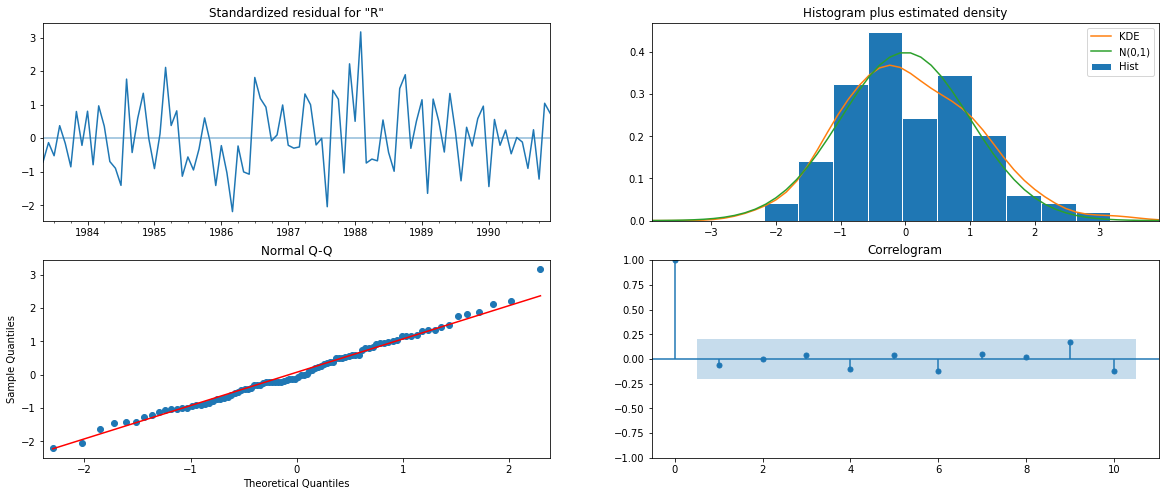

In [282]:
Final_autosarima_rose.plot_diagnostics();

In [283]:
auto_sarima_rose_result = pd.DataFrame({'TEST RMSE': rmse_autosarima_rose,'TEST MAPE':mape_autosarima_rose},
                                           index=['Auto Sarima Model (3,1,1) (3,0,2,12)'])
auto_sarima_rose_result

TEST RMSE  TEST MAPE
Auto Sarima Model (3,1,1) (3,0,2,12)  18.946998      32.15

In [284]:
rose_model_result = pd.concat([rose_model_result,auto_sarima_rose_result])
rose_model_result

TRAIN RMSE  TEST RMSE  \
Regression On Time                                   30.718135  15.291460   
Naive Forecast                                       45.063760  79.778066   
Simple Average                                       36.034234  53.521557   
2pointTrailingMovingAverage                                NaN  11.530180   
4pointTrailingMovingAverage                                NaN  14.462330   
6pointTrailingMovingAverage                                NaN  14.462330   
9pointTrailingMovingAverage                                NaN  14.740112   
Simple Exponential Alpha(0.098)                      31.500869  36.858569   
Single Exponential Smoothing Alpha(0.07)             32.649443  36.497370   
Double Exponential Alpha(0.0) Beta(0.0000)           30.718136  15.293494   
Double Exponential Smoothing Alpha(0.03) Beta(0...   41.690382  15.331019   
Triple Exponential Alpha(0.08)Beta(5.52) Gamma(...   19.481004  14.285684   
Triple Exponential Smoothing Alpha(0.3) Beta(0....   25.599445  10.347078   
Auto Arima (2,1,3)                                         NaN  36.876080   
Auto Sarima Model (3,1,1) (3,0,2,12)                       NaN  18.946998   

                                                    TRAIN MAPE  TEST MAPE  
Regression On Time                                       21.22      22.94  
Naive Forecast                                           36.38     145.35  
Simple Average                                           25.39      95.13  
2pointTrailingMovingAverage                                NaN      13.60  
4pointTrailingMovingAverage                                NaN      19.59  
6pointTrailingMovingAverage                                NaN      20.83  
9pointTrailingMovingAverage                                NaN      21.13  
Simple Exponential Alpha(0.098)                          22.73      64.05  
Single Exponential Smoothing Alpha(0.07)                 63.38      63.38  
Double Exponential Alpha(0.0) Beta(0.0000)               21.22      22.95  
Double Exponential Smoothing Alpha(0.03) Beta(0...       32.12      18.61  
Triple Exponential Alpha(0.08)Beta(5.52) Gamma(...       13.29      19.37  
Triple Exponential Smoothing Alpha(0.3) Beta(0....       17.89      13.30  
Auto Arima (2,1,3)                                         NaN      64.06  
Auto Sarima Model (3,1,1) (3,0,2,12)                       NaN      32.15

#### Q.7-Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

***SPARKLING WINE***

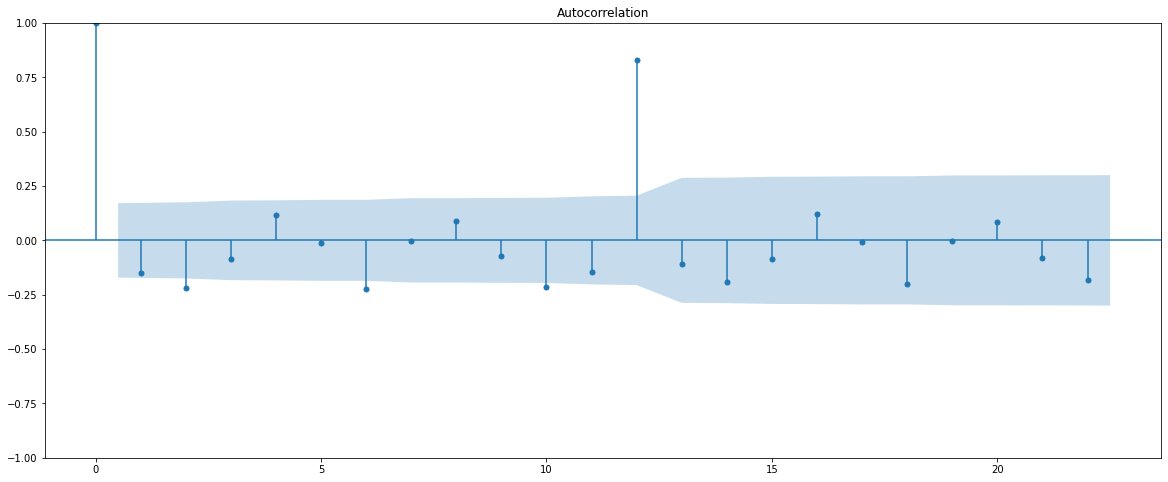

In [285]:
plot_acf(train_sparkling['Sparkling'].diff().dropna());

In [286]:
plot_pacf(train_sparkling['Sparkling'].diff().dropna());

C:\Users\home9\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


#### ARIMA MODEL

In [358]:
manual_arima_sparkling = ARIMA(train_sparkling["Sparkling"].values,order=(0,1,0)).fit()
print(manual_arima_sparkling.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  132
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1132.832
Date:                Tue, 22 Feb 2022   AIC                           2267.663
Time:                        21:14:46   BIC                           2270.538
Sample:                             0   HQIC                          2268.831
                                - 132                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.885e+06   1.29e+05     14.658      0.000    1.63e+06    2.14e+06
Ljung-Box (L1) (Q):                   3.07   Jarque-Bera (JB):               198.83
Prob(Q):                              0.08   Pr

In [359]:
manual_arima_predict_sparkling = manual_arima_sparkling.forecast(steps=len(test_sparkling))
manual_arima_predict_sparkling

array([6047., 6047., 6047., 6047., 6047., 6047., 6047., 6047., 6047.,
       6047., 6047., 6047., 6047., 6047., 6047., 6047., 6047., 6047.,
       6047., 6047., 6047., 6047., 6047., 6047., 6047., 6047., 6047.,
       6047., 6047., 6047., 6047., 6047., 6047., 6047., 6047., 6047.,
       6047., 6047., 6047., 6047., 6047., 6047., 6047., 6047., 6047.,
       6047., 6047., 6047., 6047., 6047., 6047., 6047., 6047., 6047.,
       6047.])

In [360]:
manual_arima_sparkling.aic

2267.6630357855465

In [361]:
rmse_manual_arima_sparkling = metrics.mean_squared_error(test_sparkling['Sparkling'],manual_arima_predict_sparkling,
                                                        squared=False)
rmse_manual_arima_sparkling

3864.2793518443914

In [362]:
mape_manual_arima_sparkling = MAPE(test_sparkling['Sparkling'],manual_arima_predict_sparkling[0])
mape_manual_arima_sparkling

152.87

In [363]:
manual_arima_sparkling_result = pd.DataFrame({'TEST RMSE':rmse_manual_arima_sparkling,
                                              'TEST MAPE':mape_manual_arima_sparkling},
                                             index =['Manual Arima Model (0,1,0)'])
sparkling_model_result = pd.concat([sparkling_model_result,manual_arima_sparkling_result])
sparkling_model_result


TRAIN RMSE    TEST RMSE  \
Regression On Time                                  1279.322346  1389.135175   
Naive Forecast                                      3867.700802  3864.279352   
Simple Average                                      1298.483628  1275.081804   
2pointTrailingMovingAverage                                 NaN   813.400684   
4pointTrailingMovingAverage                                 NaN  1156.589694   
6pointTrailingMovingAverage                                 NaN  1156.589694   
9pointTrailingMovingAverage                                 NaN  1346.278315   
Simple Exponential Alpha(0.070)                     1322.897875  1338.004623   
Single Exponential Smoothing Alpha(0.01)            1397.988872  1286.648058   
Double Exponential Alpha(0.66) Beta(0.0001)         1339.500882  5291.879833   
Double Exponential Smoothing Alpha(0.02) Beta(0...  1367.007307  1498.738766   
Triple Exponential Alpha(0.07)ta(0.000) Gamma(0...   355.772448   403.706228   
Triple Exponential Alpha(0.5) Beta(0.1) Gamma(0.2)   384.467709   317.434302   
Auto Arima (2,1,2)                                          NaN  1299.980084   
Auto Sarima Model (3,1,1) (3,0,0,12)                        NaN   601.266220   
Manual Arima Model (2,1,1)                                  NaN  1308.897940   
Manual Sarima Model (1,1,3) (0,0,4,12)                      NaN   911.986049   
Manual Arima Model (0,1,0)                                  NaN  3864.279352   

                                                    TRAIN MAPE  TEST MAPE  
Regression On Time                                       40.05      50.15  
Naive Forecast                                          153.17     152.87  
Simple Average                                           40.36      38.90  
2pointTrailingMovingAverage                                NaN      19.70  
4pointTrailingMovingAverage                                NaN      35.96  
6pointTrailingMovingAverage                                NaN      43.86  
9pointTrailingMovingAverage                                NaN      46.86  
Simple Exponential Alpha(0.070)                          40.95      47.11  
Single Exponential Smoothing Alpha(0.01)                 35.69      35.78  
Double Exponential Alpha(0.66) Beta(0.0001)              38.82     208.74  
Double Exponential Smoothing Alpha(0.02) Beta(0...       45.10      55.31  
Triple Exponential Alpha(0.07)ta(0.000) Gamma(0...       10.20      13.91  
Triple Exponential Alpha(0.5) Beta(0.1) Gamma(0.2)       11.01       9.64  
Auto Arima (2,1,2)                                         NaN      43.20  
Auto Sarima Model (3,1,1) (3,0,0,12)                       NaN      21.18  
Manual Arima Model (2,1,1)                                 NaN      82.73  
Manual Sarima Model (1,1,3) (0,0,4,12)                     NaN      27.87  
Manual Arima Model (0,1,0)                                 NaN     152.87

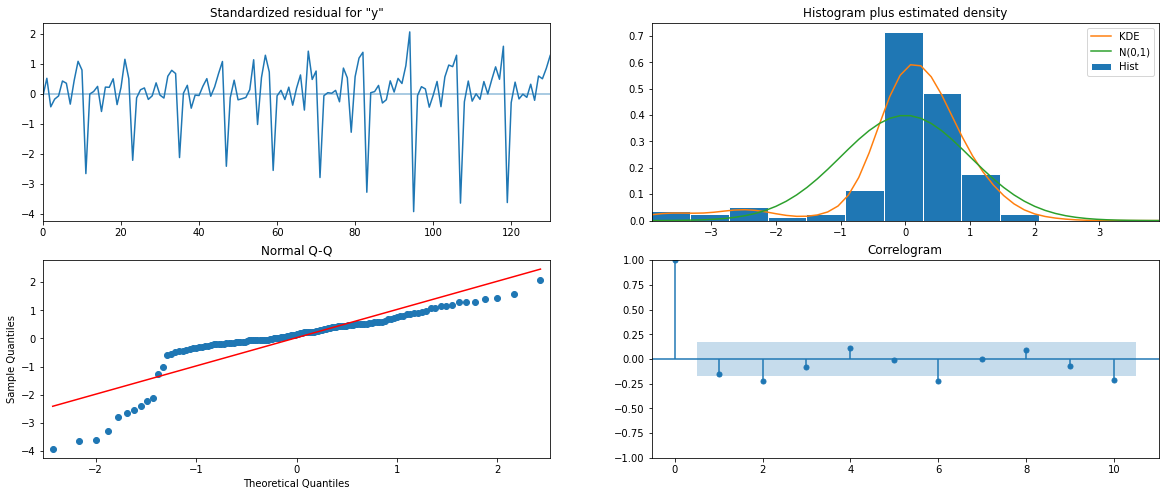

In [389]:
manual_arima_sparkling.plot_diagnostics();

#### SARIMA

In [364]:
manual_sarima_sparkling = sm.tsa.statespace.SARIMAX(train_sparkling['Sparkling'].values,order=(0,1,0),
                                                   seasonal_order=(0,0,4,12),
                                                   enforce_invertibility=False,
                                                   enforce_stationarity=False)
Final_manual_sarima_sparkling = manual_sarima_sparkling.fit(maxiter=1000)
print(Final_manual_sarima_sparkling.summary())

C:\Users\home9\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                           SARIMAX Results                                           
Dep. Variable:                                             y   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(0, 0, [1, 2, 3, 4], 12)   Log Likelihood                -648.636
Date:                                       Tue, 22 Feb 2022   AIC                           1307.272
Time:                                               21:16:34   BIC                           1319.305
Sample:                                                    0   HQIC                          1312.103
                                                       - 132                                         
Covariance Type:                                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12       1.3205     

In [365]:
manual_sarima_predict_sparkling = Final_manual_sarima_sparkling.forecast(steps=len(test_sparkling))
manual_sarima_predict_sparkling

array([2610.78824305, 2220.91182451, 2757.67771512, 2327.78747591,
       2521.72631983, 2293.960376  , 2241.11606574, 2078.09789247,
       3120.07188365, 4195.61982841, 4613.89035404, 5559.59588508,
       3393.9325943 , 3021.75430891, 3348.07058139, 2869.67293693,
       3344.75824993, 3109.31383291, 3316.03747776, 3305.24128747,
       3251.09379894, 4209.08231713, 4611.30652275, 4917.54582176,
       3885.12932226, 3663.31349194, 3728.40063568, 3501.81384323,
       3957.21707102, 3721.13548172, 3926.44269362, 3981.83881582,
       3999.85636664, 4281.30668229, 4561.56197355, 5113.90711603,
       4566.69691132, 4551.83904556, 4422.27389037, 4504.70448737,
       4601.51705076, 4531.25131764, 4651.98568168, 4295.40988256,
       4562.7883389 , 4652.1312862 , 4934.79662316, 5087.80918781,
       5087.80918781, 5087.80918781, 5087.80918781, 5087.80918781,
       5087.80918781, 5087.80918781, 5087.80918781])

In [366]:
rmse_manual_sarima_sparkling = metrics.mean_squared_error(test_sparkling['Sparkling'],manual_sarima_predict_sparkling,
                                                        squared=False)
rmse_manual_sarima_sparkling

1991.4228803614815

In [367]:
mape_manual_sarima_sparkling = MAPE(test_sparkling['Sparkling'],manual_sarima_predict_sparkling)
mape_manual_sarima_sparkling

71.68

In [368]:
manual_sarima_sparkling_result = pd.DataFrame({'TEST RMSE':rmse_manual_sarima_sparkling,
                                              'TEST MAPE':mape_manual_sarima_sparkling},
                                             index =['Manual Sarima Model (1,1,3) (0,0,4,12)'])
sparkling_model_result = pd.concat([sparkling_model_result,manual_sarima_sparkling_result])
sparkling_model_result

TRAIN RMSE    TEST RMSE  \
Regression On Time                                  1279.322346  1389.135175   
Naive Forecast                                      3867.700802  3864.279352   
Simple Average                                      1298.483628  1275.081804   
2pointTrailingMovingAverage                                 NaN   813.400684   
4pointTrailingMovingAverage                                 NaN  1156.589694   
6pointTrailingMovingAverage                                 NaN  1156.589694   
9pointTrailingMovingAverage                                 NaN  1346.278315   
Simple Exponential Alpha(0.070)                     1322.897875  1338.004623   
Single Exponential Smoothing Alpha(0.01)            1397.988872  1286.648058   
Double Exponential Alpha(0.66) Beta(0.0001)         1339.500882  5291.879833   
Double Exponential Smoothing Alpha(0.02) Beta(0...  1367.007307  1498.738766   
Triple Exponential Alpha(0.07)ta(0.000) Gamma(0...   355.772448   403.706228   
Triple Exponential Alpha(0.5) Beta(0.1) Gamma(0.2)   384.467709   317.434302   
Auto Arima (2,1,2)                                          NaN  1299.980084   
Auto Sarima Model (3,1,1) (3,0,0,12)                        NaN   601.266220   
Manual Arima Model (2,1,1)                                  NaN  1308.897940   
Manual Sarima Model (1,1,3) (0,0,4,12)                      NaN   911.986049   
Manual Arima Model (0,1,0)                                  NaN  3864.279352   
Manual Sarima Model (1,1,3) (0,0,4,12)                      NaN  1991.422880   

                                                    TRAIN MAPE  TEST MAPE  
Regression On Time                                       40.05      50.15  
Naive Forecast                                          153.17     152.87  
Simple Average                                           40.36      38.90  
2pointTrailingMovingAverage                                NaN      19.70  
4pointTrailingMovingAverage                                NaN      35.96  
6pointTrailingMovingAverage                                NaN      43.86  
9pointTrailingMovingAverage                                NaN      46.86  
Simple Exponential Alpha(0.070)                          40.95      47.11  
Single Exponential Smoothing Alpha(0.01)                 35.69      35.78  
Double Exponential Alpha(0.66) Beta(0.0001)              38.82     208.74  
Double Exponential Smoothing Alpha(0.02) Beta(0...       45.10      55.31  
Triple Exponential Alpha(0.07)ta(0.000) Gamma(0...       10.20      13.91  
Triple Exponential Alpha(0.5) Beta(0.1) Gamma(0.2)       11.01       9.64  
Auto Arima (2,1,2)                                         NaN      43.20  
Auto Sarima Model (3,1,1) (3,0,0,12)                       NaN      21.18  
Manual Arima Model (2,1,1)                                 NaN      82.73  
Manual Sarima Model (1,1,3) (0,0,4,12)                     NaN      27.87  
Manual Arima Model (0,1,0)                                 NaN     152.87  
Manual Sarima Model (1,1,3) (0,0,4,12)                     NaN      71.68

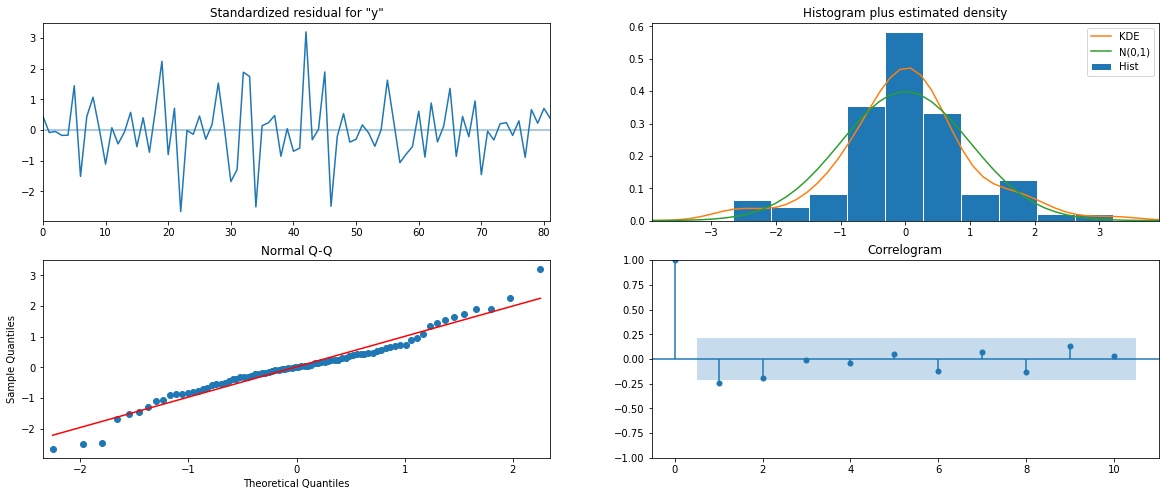

In [369]:
Final_manual_sarima_sparkling.plot_diagnostics();

***ROSE WINE***

In [370]:
plot_acf(train_rose['Rose'].diff().dropna());

C:\Users\home9\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


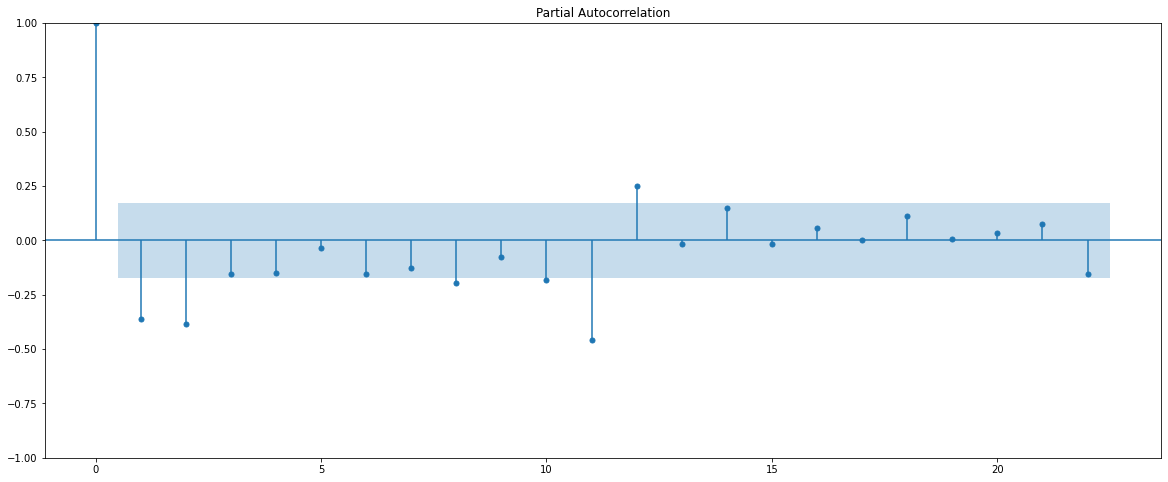

In [371]:
plot_pacf(train_rose['Rose'].diff().dropna());

In [372]:
manual_arima_rose = ARIMA(train_rose["Rose"].values,order=(2,1,3)).fit()
print(manual_arima_rose.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.347
Date:                Tue, 22 Feb 2022   AIC                           1274.695
Time:                        21:18:12   BIC                           1291.946
Sample:                             0   HQIC                          1281.705
                                - 132                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6775      0.084    -20.007      0.000      -1.842      -1.513
ar.L2         -0.7283      0.084     -8.685      0.000      -0.893      -0.564
ma.L1          1.0448      0.662      1.579      0.1

C:\Users\home9\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [373]:
manual_arima_predict_rose = manual_arima_rose.forecast(steps=len(test_rose))
manual_arima_predict_rose

array([85.6017322 , 90.54047725, 81.95987021, 92.75700351, 80.8940202 ,
       92.93066493, 81.37896817, 91.99068059, 82.60261054, 90.62260537,
       84.00638303, 89.26414189, 85.26284158, 88.14579881, 86.22378548,
       87.34830314, 86.86173004, 86.85896664, 87.21797724, 86.61774574,
       87.36317027, 86.54986595, 87.37129413, 86.58567547, 87.30530661,
       86.67028988, 87.21142425, 86.76615321, 87.11898776, 86.8513984 ,
       87.04331025, 86.91626349, 86.98961489, 86.95909628, 86.95686918,
       86.9828321 , 86.94090104, 86.99233185, 86.93659484, 86.99263681,
       86.9392195 , 86.9880118 , 86.94506644, 86.98157193, 86.95161102,
       86.97528353, 86.95739341, 86.97016341, 86.96177111, 86.96654879,
       86.96464636, 86.96435808, 86.96622722, 86.96330168, 86.966848  ])

In [374]:
manual_arima_rose.aic

1274.694994556771

In [375]:
rmse_manual_arima_rose = metrics.mean_squared_error(test_rose['Rose'],manual_arima_predict_rose,
                                                        squared=False)
rmse_manual_arima_rose

36.876080396483985

In [376]:
mape_manual_arima_rose = MAPE(test_rose['Rose'],manual_arima_predict_rose)
mape_manual_arima_rose

64.06

In [377]:
manual_arima_rose_result = pd.DataFrame({'TEST RMSE':rmse_manual_arima_rose,
                                              'TEST MAPE':mape_manual_arima_rose},
                                             index =['Manual Arima Model (2,1,3)'])
rose_model_result = pd.concat([rose_model_result,manual_arima_rose_result])
rose_model_result

TRAIN RMSE  TEST RMSE  \
Regression On Time                                   30.718135  15.291460   
Naive Forecast                                       45.063760  79.778066   
Simple Average                                       36.034234  53.521557   
2pointTrailingMovingAverage                                NaN  11.530180   
4pointTrailingMovingAverage                                NaN  14.462330   
6pointTrailingMovingAverage                                NaN  14.462330   
9pointTrailingMovingAverage                                NaN  14.740112   
Simple Exponential Alpha(0.098)                      31.500869  36.858569   
Single Exponential Smoothing Alpha(0.07)             32.649443  36.497370   
Double Exponential Alpha(0.0) Beta(0.0000)           30.718136  15.293494   
Double Exponential Smoothing Alpha(0.03) Beta(0...   41.690382  15.331019   
Triple Exponential Alpha(0.08)Beta(5.52) Gamma(...   19.481004  14.285684   
Triple Exponential Smoothing Alpha(0.3) Beta(0....   25.599445  10.347078   
Auto Arima (2,1,3)                                         NaN  36.876080   
Auto Sarima Model (3,1,1) (3,0,2,12)                       NaN  18.946998   
Manual Arima Model (2,1,5)                                 NaN  37.267520   
Manual Sarima Model (2,1,5) (0,0,6,12)                     NaN  28.876050   
Manual Sarima Model (2,1,5) (0,0,2,12)                     NaN  30.939303   
Manual Arima Model (2,1,3)                                 NaN  36.876080   

                                                    TRAIN MAPE  TEST MAPE  
Regression On Time                                       21.22      22.94  
Naive Forecast                                           36.38     145.35  
Simple Average                                           25.39      95.13  
2pointTrailingMovingAverage                                NaN      13.60  
4pointTrailingMovingAverage                                NaN      19.59  
6pointTrailingMovingAverage                                NaN      20.83  
9pointTrailingMovingAverage                                NaN      21.13  
Simple Exponential Alpha(0.098)                          22.73      64.05  
Single Exponential Smoothing Alpha(0.07)                 63.38      63.38  
Double Exponential Alpha(0.0) Beta(0.0000)               21.22      22.95  
Double Exponential Smoothing Alpha(0.03) Beta(0...       32.12      18.61  
Triple Exponential Alpha(0.08)Beta(5.52) Gamma(...       13.29      19.37  
Triple Exponential Smoothing Alpha(0.3) Beta(0....       17.89      13.30  
Auto Arima (2,1,3)                                         NaN      64.06  
Auto Sarima Model (3,1,1) (3,0,2,12)                       NaN      32.15  
Manual Arima Model (2,1,5)                                 NaN      64.84  
Manual Sarima Model (2,1,5) (0,0,6,12)                     NaN      48.31  
Manual Sarima Model (2,1,5) (0,0,2,12)                     NaN      51.75  
Manual Arima Model (2,1,3)                                 NaN      64.06

In [378]:
manual_arima_rose.plot_diagnostics();

#### SARIMA

In [379]:
manual_sarima_rose = sm.tsa.statespace.SARIMAX(train_rose['Rose'].values,order=(2,1,3),
                                                   seasonal_order=(0,0,0,12),
                                                   enforce_invertibility=False,
                                                   enforce_stationarity=False)
Final_manual_sarima_rose = manual_sarima_rose.fit(maxiter=1000)
print(Final_manual_sarima_rose.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  132
Model:               SARIMAX(2, 1, 3)   Log Likelihood                -612.935
Date:                Tue, 22 Feb 2022   AIC                           1237.870
Time:                        21:18:48   BIC                           1254.935
Sample:                             0   HQIC                          1244.804
                                - 132                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5766      0.109    -14.499      0.000      -1.790      -1.363
ar.L2         -0.5869      0.110     -5.338      0.000      -0.802      -0.371
ma.L1          0.9786      0.100      9.766      0.0

In [380]:
manual_sarima_predict_rose = Final_manual_sarima_rose.forecast(steps=len(test_rose))
manual_sarima_predict_rose

array([79.87223288, 91.2654428 , 82.91236348, 89.39509877, 84.07688926,
       88.65681633, 84.55740237, 88.33253941, 84.78664259, 88.16143876,
       84.92185761, 88.04867878, 85.02027633, 87.95969158, 85.10281072,
       87.8817953 , 85.17718176, 87.81026003, 85.24631513, 87.74324916,
       85.31138937, 87.67998248, 85.37294285, 87.62006916, 85.43127582,
       87.56326516, 85.48659675, 87.50938504, 85.53907571, 87.45826953,
       85.58886397, 87.40977359, 85.63610141, 87.36376183, 85.6809194 ,
       87.32010657, 85.72344212, 87.27868698, 85.76378721, 87.23938851,
       85.80206623, 87.2021025 , 85.83838498, 87.16672591, 85.87284386,
       87.13316094, 85.90553812, 87.10131481, 85.93655811, 87.07109952,
       85.96598958, 87.04243154, 85.99391387, 87.01523164, 86.02040817])

In [381]:
rmse_manual_sarima_rose = metrics.mean_squared_error(test_rose['Rose'],manual_sarima_predict_rose,
                                                        squared=False)
rmse_manual_sarima_rose

36.253116156112824

In [382]:
mape_manual_sarima_rose = MAPE(test_rose['Rose'],manual_sarima_predict_rose)
mape_manual_sarima_rose

62.88

In [383]:
manual_sarima_rose_result = pd.DataFrame({'TEST RMSE':rmse_manual_sarima_rose,
                                              'TEST MAPE':mape_manual_sarima_rose},
                                             index =['Manual Sarima Model (2,1,5) (0,0,2,12)'])
rose_model_result = pd.concat([rose_model_result,manual_sarima_rose_result])
rose_model_result

TRAIN RMSE  TEST RMSE  \
Regression On Time                                   30.718135  15.291460   
Naive Forecast                                       45.063760  79.778066   
Simple Average                                       36.034234  53.521557   
2pointTrailingMovingAverage                                NaN  11.530180   
4pointTrailingMovingAverage                                NaN  14.462330   
6pointTrailingMovingAverage                                NaN  14.462330   
9pointTrailingMovingAverage                                NaN  14.740112   
Simple Exponential Alpha(0.098)                      31.500869  36.858569   
Single Exponential Smoothing Alpha(0.07)             32.649443  36.497370   
Double Exponential Alpha(0.0) Beta(0.0000)           30.718136  15.293494   
Double Exponential Smoothing Alpha(0.03) Beta(0...   41.690382  15.331019   
Triple Exponential Alpha(0.08)Beta(5.52) Gamma(...   19.481004  14.285684   
Triple Exponential Smoothing Alpha(0.3) Beta(0....   25.599445  10.347078   
Auto Arima (2,1,3)                                         NaN  36.876080   
Auto Sarima Model (3,1,1) (3,0,2,12)                       NaN  18.946998   
Manual Arima Model (2,1,5)                                 NaN  37.267520   
Manual Sarima Model (2,1,5) (0,0,6,12)                     NaN  28.876050   
Manual Sarima Model (2,1,5) (0,0,2,12)                     NaN  30.939303   
Manual Arima Model (2,1,3)                                 NaN  36.876080   
Manual Sarima Model (2,1,5) (0,0,2,12)                     NaN  36.253116   

                                                    TRAIN MAPE  TEST MAPE  
Regression On Time                                       21.22      22.94  
Naive Forecast                                           36.38     145.35  
Simple Average                                           25.39      95.13  
2pointTrailingMovingAverage                                NaN      13.60  
4pointTrailingMovingAverage                                NaN      19.59  
6pointTrailingMovingAverage                                NaN      20.83  
9pointTrailingMovingAverage                                NaN      21.13  
Simple Exponential Alpha(0.098)                          22.73      64.05  
Single Exponential Smoothing Alpha(0.07)                 63.38      63.38  
Double Exponential Alpha(0.0) Beta(0.0000)               21.22      22.95  
Double Exponential Smoothing Alpha(0.03) Beta(0...       32.12      18.61  
Triple Exponential Alpha(0.08)Beta(5.52) Gamma(...       13.29      19.37  
Triple Exponential Smoothing Alpha(0.3) Beta(0....       17.89      13.30  
Auto Arima (2,1,3)                                         NaN      64.06  
Auto Sarima Model (3,1,1) (3,0,2,12)                       NaN      32.15  
Manual Arima Model (2,1,5)                                 NaN      64.84  
Manual Sarima Model (2,1,5) (0,0,6,12)                     NaN      48.31  
Manual Sarima Model (2,1,5) (0,0,2,12)                     NaN      51.75  
Manual Arima Model (2,1,3)                                 NaN      64.06  
Manual Sarima Model (2,1,5) (0,0,2,12)                     NaN      62.88

In [384]:
Final_manual_sarima_rose.plot_diagnostics();

 #### Q.8-Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

***SPARKLING WINE***

In [385]:
Final_sparkling_models = sparkling_model_result[['TEST RMSE',"TEST MAPE"]]

In [386]:
Final_sparkling_models.sort_values('TEST RMSE',ascending=True)

TEST RMSE  TEST MAPE
Triple Exponential Alpha(0.5) Beta(0.1) Gamma(0.2)   317.434302       9.64
Triple Exponential Alpha(0.07)ta(0.000) Gamma(0...   403.706228      13.91
Auto Sarima Model (3,1,1) (3,0,0,12)                 601.266220      21.18
2pointTrailingMovingAverage                          813.400684      19.70
Manual Sarima Model (1,1,3) (0,0,4,12)               911.986049      27.87
4pointTrailingMovingAverage                         1156.589694      35.96
6pointTrailingMovingAverage                         1156.589694      43.86
Simple Average                                      1275.081804      38.90
Single Exponential Smoothing Alpha(0.01)            1286.648058      35.78
Auto Arima (2,1,2)                                  1299.980084      43.20
Manual Arima Model (2,1,1)                          1308.897940      82.73
Simple Exponential Alpha(0.070)                     1338.004623      47.11
9pointTrailingMovingAverage                         1346.278315      46.86
Regression On Time                                  1389.135175      50.15
Double Exponential Smoothing Alpha(0.02) Beta(0...  1498.738766      55.31
Manual Sarima Model (1,1,3) (0,0,4,12)              1991.422880      71.68
Naive Forecast                                      3864.279352     152.87
Manual Arima Model (0,1,0)                          3864.279352     152.87
Double Exponential Alpha(0.66) Beta(0.0001)         5291.879833     208.74

***RED WINE***

In [387]:
Final_rose_models = rose_model_result[['TEST RMSE','TEST MAPE']]

In [388]:
Final_rose_models.sort_values('TEST MAPE',ascending=True)

TEST RMSE  TEST MAPE
Triple Exponential Smoothing Alpha(0.3) Beta(0....  10.347078      13.30
2pointTrailingMovingAverage                         11.530180      13.60
Double Exponential Smoothing Alpha(0.03) Beta(0...  15.331019      18.61
Triple Exponential Alpha(0.08)Beta(5.52) Gamma(...  14.285684      19.37
4pointTrailingMovingAverage                         14.462330      19.59
6pointTrailingMovingAverage                         14.462330      20.83
9pointTrailingMovingAverage                         14.740112      21.13
Regression On Time                                  15.291460      22.94
Double Exponential Alpha(0.0) Beta(0.0000)          15.293494      22.95
Auto Sarima Model (3,1,1) (3,0,2,12)                18.946998      32.15
Manual Sarima Model (2,1,5) (0,0,6,12)              28.876050      48.31
Manual Sarima Model (2,1,5) (0,0,2,12)              30.939303      51.75
Manual Sarima Model (2,1,5) (0,0,2,12)              36.253116      62.88
Single Exponential Smoothing Alpha(0.07)            36.497370      63.38
Simple Exponential Alpha(0.098)                     36.858569      64.05
Manual Arima Model (2,1,3)                          36.876080      64.06
Auto Arima (2,1,3)                                  36.876080      64.06
Manual Arima Model (2,1,5)                          37.267520      64.84
Simple Average                                      53.521557      95.13
Naive Forecast                                      79.778066     145.35

#### Q.9-Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

***SPARKLING WINE***

In [348]:
forecasting_sparkling = ExponentialSmoothing(sparkling,initialization_method='estimated',seasonal='multiplicative',
                                    freq='M',trend = 'add')

In [349]:
Final_model_sparkling = forecasting_sparkling.fit(smoothing_level=0.4,smoothing_trend=0.1,smoothing_seasonal=0.2)

In [350]:
Sparkling_prediction = Final_model_sparkling.forecast(steps=12)
Sparkling_prediction

1995-08-31    2063.449006
1995-09-30    2579.407584
1995-10-31    3416.654489
1995-11-30    4304.477396
1995-12-31    6604.876921
1996-01-31    1564.539905
1996-02-29    1849.760079
1996-03-31    2098.878914
1996-04-30    2022.428902
1996-05-31    1834.540669
1996-06-30    1712.408912
1996-07-31    2176.425517
Freq: M, dtype: float64

In [351]:
pred_sparkling = pd.DataFrame({'lower_CI':Sparkling_prediction - 1.96*np.std(Final_model_sparkling.resid,ddof=1),
                          'prediction':Sparkling_prediction,
                          'upper_ci': Sparkling_prediction + 1.96*np.std(Final_model_sparkling.resid,ddof=1)})
pred_sparkling.head()

lower_CI   prediction     upper_ci
1995-08-31  1322.989339  2063.449006  2803.908673
1995-09-30  1838.947917  2579.407584  3319.867251
1995-10-31  2676.194822  3416.654489  4157.114156
1995-11-30  3564.017729  4304.477396  5044.937063
1995-12-31  5864.417254  6604.876921  7345.336588

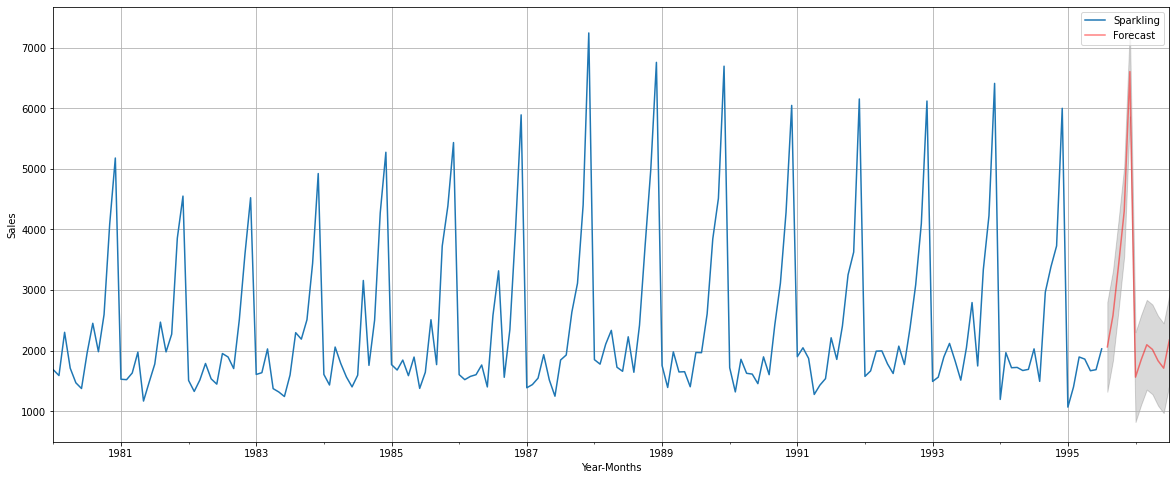

In [352]:
axis = sparkling.plot(label='Actual')
pred_sparkling['prediction'].plot(ax=axis, label='Forecast', alpha=0.5,color='Red')
axis.fill_between(pred_sparkling.index, pred_sparkling['lower_CI'], pred_sparkling['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.grid()
plt.show()

***ROSE WINE***

In [353]:
forecasting_rose = ExponentialSmoothing(rose,trend='additive',seasonal='multiplicative',
                                    freq='M')

In [354]:
Final_model_rose = forecasting_rose.fit(smoothing_level=0.3,smoothing_trend=0.4,smoothing_seasonal=0.4)

In [355]:
rose_prediction = Final_model_rose.forecast(steps=12)
rose_prediction

1995-08-31    39.201883
1995-09-30    36.138936
1995-10-31    36.415437
1995-11-30    40.082038
1995-12-31    55.368083
1996-01-31    20.368932
1996-02-29    25.785196
1996-03-31    30.609484
1996-04-30    33.559613
1996-05-31    24.980050
1996-06-30    30.832509
1996-07-31    30.590528
Freq: M, dtype: float64

In [356]:
pred_rose = pd.DataFrame({'lower_CI':rose_prediction - 1.96*np.std(Final_model_rose.resid,ddof=1),
                          'prediction':rose_prediction,
                          'upper_ci': rose_prediction + 1.96*np.std(Final_model_rose.resid,ddof=1)})
pred_rose.head()

lower_CI  prediction   upper_ci
1995-08-31  -3.957617   39.201883  82.361383
1995-09-30  -7.020564   36.138936  79.298436
1995-10-31  -6.744063   36.415437  79.574937
1995-11-30  -3.077462   40.082038  83.241538
1995-12-31  12.208583   55.368083  98.527582

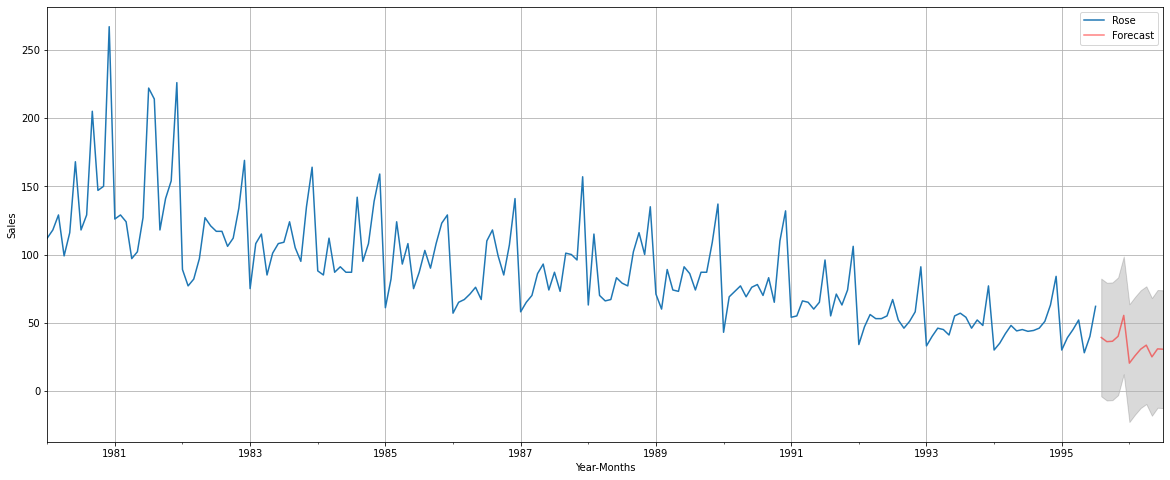

In [357]:
axis = rose.plot(label='Actual')
pred_rose['prediction'].plot(ax=axis, label='Forecast', alpha=0.5,color='Red')
axis.fill_between(pred_rose.index, pred_rose['lower_CI'], pred_rose['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.grid()
plt.show()

#### Q.10- Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.